# AlphaFactor Research 01

# Introduction

In [4]:
import pandas as pd
import ta
import numpy as np
import pickle
import itertools
from datetime import datetime

import alphalens
from alphalens import performance as perf
from alphalens import utils, plotting

import pyfolio

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [5]:
Prices = pickle.load(open('/home/ubuntu/projects/trading/data/Prices.pkl', 'rb'))

In [6]:
train_start = datetime(2015, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [7]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

high     low    open   close     volume    adj_close
Date                                                              
2015-01-01  7710.0  7710.0  7710.0  7710.0        0.0  6203.339844
2015-01-02  7795.0  7600.0  7651.0  7625.0   613354.0  6134.950684
2015-01-05  7650.0  7301.0  7583.0  7340.0  1472081.0  5905.644043
2015-01-06  7641.0  7354.0  7354.0  7621.0  1173591.0  6131.731934
2015-01-07  7750.0  7451.0  7515.0  7750.0  2275334.0  6235.523438

# Data cleaning and validation

In [8]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open     close   volume      adj_close
Date                                                                
2017-01-10  3489.0  3430.0  3475.0    3445.0  69398.0    3444.051270
2017-01-11  3465.0  3445.0  3455.0    3466.0   6426.0    3465.045410
2017-01-12  3440.0  3370.0  3440.0    3363.0  64075.0    3362.073730
2017-01-13  3400.0  3390.0  3390.0    3386.0  21058.0    3385.067383
2017-01-16  3419.0  3380.0  3395.0    3400.0   7148.0    3399.063477
2017-01-17  3385.0  3355.0  3380.0    3358.0  10926.0    3357.075195
2017-01-18  3415.0  3395.0  3395.0    3400.0   7366.0    3399.063477
2017-01-19  3405.0  3405.0  3405.0  340500.0  24398.0  340406.218750
2017-01-20  3370.0  3350.0  3370.0    3365.0   8243.0    3364.073242

In [9]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [10]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

high          low         open        close    volume  \
Date                                                                       
2016-01-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-02-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-03-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-04-29       1.0426       1.0426       1.0426       1.0426       0.0   
2016-05-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-06-30       1.0770       1.0770       1.0770       1.0770       0.0   
2016-07-29       1.0770       1.0770       1.0770       1.0770       0.0   
2016-08-31       1.0770       1.0770       1.0770       1.0770       0.0   
2016-09-30       1.1239       1.1239       1.1239       1.1239       0.0   
2016-10-31       1.1239       1.1239       1.1239       1.1239       0.0   
2016-11-30       1.1239       1.1239       1.1239       1.1239       0.0   
2017-01-31       1.1000       1.1000       1.1000       1.1000       0.0   
2017-02-28       1.1000       1.1000       1.1000       1.1000       0.0   
2017-03-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-04-28       1.1066       1.1066       1.1066       1.1066       0.0   
2017-05-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-06-09  183400.0000  182000.0000  183400.0000  182000.0000   55547.0   
2017-06-12  184500.0000  181600.0000  184500.0000  184500.0000    9676.0   
2017-06-13  184500.0000  182100.0000  182900.0000  183000.0000  122820.0   
2017-06-14  184500.0000  184000.0000  184000.0000  184000.0000   43226.0   
2017-06-15  184500.0000  184200.0000  184500.0000  184500.0000  183360.0   
2017-06-16  184500.0000  184500.0000  184500.0000  184500.0000       0.0   
2017-06-19  185900.0000  180100.0000  184500.0000  180100.0000  121717.0   
2017-06-20  184500.0000  183700.0000  184200.0000  183700.0000  110578.0   
2017-06-21  186000.0000  182500.0000  183700.0000  182500.0000    9868.0   
2017-06-22  187000.0000  183000.0000  183000.0000  187000.0000    3420.0   
2017-06-23  190000.0000  183600.0000  187000.0000  190000.0000   23681.0   
2017-06-26  193200.0000  190000.0000  191400.0000  190000.0000  360473.0   
2017-06-27  194000.0000  185200.0000  185300.0000  194000.0000  136528.0   
2017-06-28  197200.0000  192000.0000  192000.0000  194300.0000   11730.0   
2017-06-29  198000.0000  194300.0000  194300.0000  196000.0000   14799.0   
2017-06-30  200100.0000  196500.0000  196500.0000  200100.0000   26023.0   

                adj_close  
Date                       
2016-01-29       0.979231  
2016-02-29       0.979231  
2016-03-31       1.041782  
2016-04-29       1.041782  
2016-05-31       1.041782  
2016-06-30       1.076155  
2016-07-29       1.076155  
2016-08-31       1.076155  
2016-09-30       1.123018  
2016-10-31       1.123018  
2016-11-30       1.123018  
2017-01-31       1.099137  
2017-02-28       1.099137  
2017-03-31       1.105732  
2017-04-28       1.105732  
2017-05-31       1.105732  
2017-06-09  181857.218750  
2017-06-12  184355.250000  
2017-06-13  182856.437500  
2017-06-14  183855.640625  
2017-06-15  184355.250000  
2017-06-16  184355.250000  
2017-06-19  179958.718750  
2017-06-20  183555.890625  
2017-06-21  182357.875000  
2017-06-22  186854.375000  
2017-06-23  189852.015625  
2017-06-26  189852.015625  
2017-06-27  193848.890625  
2017-06-28  194148.703125  
2017-06-29  195847.359375  
2017-06-30  199944.171875

In [11]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]
trainPrices['SCD.JO'].head()

high       low      open     close    volume      adj_close
Date                                                                       
2017-06-09  183400.0  182000.0  183400.0  182000.0   55547.0  181857.218750
2017-06-12  184500.0  181600.0  184500.0  184500.0    9676.0  184355.250000
2017-06-13  184500.0  182100.0  182900.0  183000.0  122820.0  182856.437500
2017-06-14  184500.0  184000.0  184000.0  184000.0   43226.0  183855.640625
2017-06-15  184500.0  184200.0  184500.0  184500.0  183360.0  184355.250000

In [12]:
trainPrices['ETFPLD.JO'].loc['2015-07-10':].iloc[:10]

high     low      open   close     volume  adj_close
Date                                                              
2015-07-10  8067.0  7969.0    7982.0  8030.0     9004.0     8030.0
2015-07-13  8267.0  8030.0    8030.0  8296.0   364190.0     8296.0
2015-07-14  8195.0  8130.0    8130.0  8138.0   506822.0     8138.0
2015-07-15  8077.0  8077.0    8077.0  8077.0        0.0     8077.0
2015-07-16  7865.0  7726.0    7858.0  7819.0   510139.0     7819.0
2015-07-17  7733.0  6900.0    7732.0  7563.0   858707.0     7563.0
2015-07-20  7580.0  7559.0  755900.0  7609.0  3554911.0     7609.0
2015-07-21  7650.0  7600.0    7610.0  7701.0  1250489.0     7701.0
2015-07-22  7625.0  7600.0    7625.0  7602.0   988508.0     7602.0
2015-07-23  7801.0  7757.0    7800.0  7758.0   728388.0     7758.0

In [13]:
trainPrices['ETFPLD.JO'].loc[datetime(2015, 7, 20), 'open'] = 7559.00

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
# 	2015-07-16
trainPrices['STXSWX.JO'].loc['2015-07-10':].iloc[:10]

high     low      open   close   volume    adj_close
Date                                                              
2015-07-10  1068.0  1053.0    1068.0  1057.0  13415.0  1056.454102
2015-07-13  1073.0  1062.0    1073.0  1072.0  18481.0  1071.446411
2015-07-14  1065.0  1061.0    1065.0  1065.0   8716.0  1064.450073
2015-07-15  1079.0  1066.0    1068.0  1075.0  32456.0  1074.444824
2015-07-16  1085.0  1067.0    1068.0  1081.0  26330.0  1080.441650
2015-07-17  1086.0  1076.0    1078.0  1080.0  11040.0  1079.442261
2015-07-20  1084.0  1079.0  107900.0  1086.0  49031.0  1085.439209
2015-07-21  1090.0  1079.0    1085.0  1084.0   1914.0  1083.439941
2015-07-22  1084.0  1063.0    1084.0  1063.0  14870.0  1062.451050
2015-07-23  1080.0  1067.0    1080.0  1073.0   5324.0  1072.445801

In [15]:
trainPrices['STXSWX.JO'].loc[datetime(2015, 7, 20), 'open'] = 1079.00

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Classical techniques and cross-sectional strategies

## Basic trend following and/or Counter-trend strategy

In [16]:
macd = ta.trend.MACD(whl['close'], n_slow = 26, n_fast = 12, n_sign = 9)

ema26 = ta.trend.ema(whl['close'], periods = 26)
ema12 =ta.trend.ema(whl['close'], periods = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = macd.macd()
whl['macd_signal']  = macd.macd_signal()
whl['macd_diff'] = macd.macd_diff()


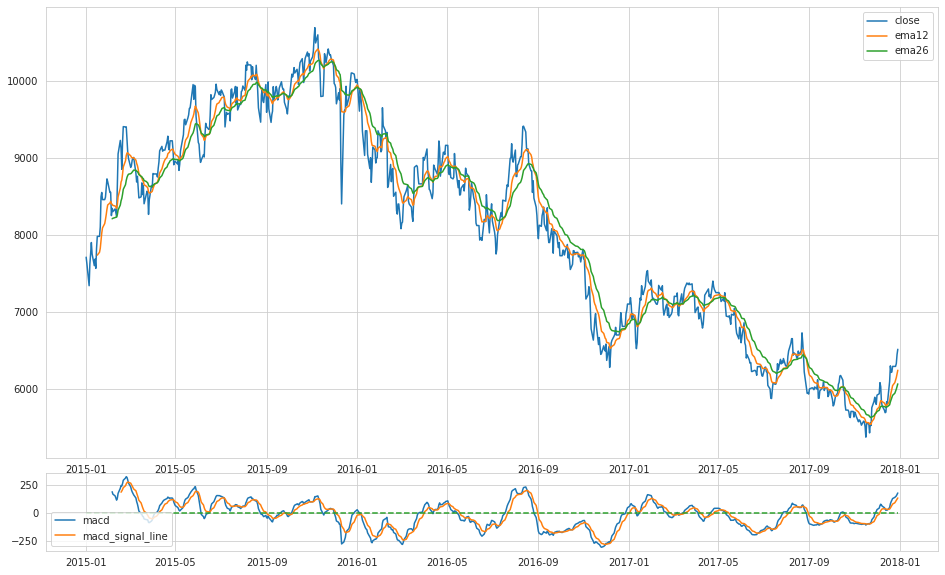

In [17]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [18]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 0:
        data = data.copy()
        close = data['close']
        
        Macd = ta.trend.MACD(close, n_slow = 26, n_fast = 12, n_sign = 9)
        macd = Macd.macd()
        macd_signal = Macd.macd_signal()
        macd_diff = Macd.macd_diff() * -1

        out = pd.DataFrame(macd_diff)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [19]:
macd_data

MACD_diff_12_26
Date       symbol                  
2017-10-19 4SI.JO               NaN
2017-10-20 4SI.JO               NaN
2017-10-23 4SI.JO               NaN
2017-10-24 4SI.JO               NaN
2017-10-25 4SI.JO               NaN
...                             ...
2017-12-25 ZPLP.JO       -53.718039
2017-12-26 ZPLP.JO       -47.688752
2017-12-27 ZPLP.JO       -40.354182
2017-12-28 ZPLP.JO       -32.111094
2017-12-29 ZPLP.JO       -23.848948

[270444 rows x 1 columns]

In [20]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [21]:
prices_data.index = pd.to_datetime(prices_data.index)
prices_data.head()

4SI.JO   ABG.JO  ABSP.JO  ACE.JO  ACG.JO  ACL.JO  ACS.JO  ACT.JO  \
2015-01-01     NaN  18200.0  79001.0    52.0   720.0  2641.0  1090.0   520.0   
2015-01-02     NaN  17989.0  79050.0    51.0   720.0  2582.0  1090.0   523.0   
2015-01-05     NaN  17375.0  79454.0    45.0   740.0  2450.0  1090.0   519.0   
2015-01-06     NaN  17828.0  79051.0    45.0   765.0  2455.0  1090.0   530.0   
2015-01-07     NaN  18200.0  78200.0    45.0   765.0  2381.0  1085.0   524.0   

            ACZ.JO      ADH.JO  ...  WEA.JO  WEZ.JO  WHL.JO  WKF.JO  WSL.JO  \
2015-01-01     NaN  849.054016  ...     NaN    82.0  7710.0    55.0   235.0   
2015-01-02     NaN  861.741028  ...    0.08    81.0  7625.0    55.0   235.0   
2015-01-05     NaN  857.836975  ...    0.08    81.0  7340.0    55.0   234.0   
2015-01-06     NaN  863.692993  ...    0.08    85.0  7621.0    55.0   231.0   
2015-01-07     NaN  849.054016  ...    0.08    82.0  7750.0    55.0   230.0   

            YRK.JO  YYLBEE.JO  ZCL.JO  ZED.JO  ZPLP.JO  
2015-01-01   300.0        NaN     NaN   755.0      NaN  
2015-01-02   300.0        NaN     NaN   790.0      NaN  
2015-01-05   300.0        NaN     NaN   780.0      NaN  
2015-01-06   300.0        NaN     NaN   755.0      NaN  
2015-01-07   300.0        NaN     NaN   740.0      NaN  

[5 rows x 467 columns]

In [22]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5]
)
factor_data

Dropped 5.5% entries from factor data: 5.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D     factor  factor_quantile
date       asset                                                              
2015-02-17 ABG.JO     0.020861  0.034446  0.022586  94.739168                3
           ABSP.JO   -0.008917 -0.031847 -0.025478  93.634103                3
           ACE.JO     0.000000 -0.153846  0.000000  -1.897642                1
           ACG.JO     0.002985 -0.004975  0.018905  21.486675                3
           ACL.JO     0.000000  0.005385  0.007692  -9.489539                1
...                        ...       ...       ...        ...              ...
2017-12-22 WSL.JO     0.000000  0.000000  0.012121   0.353278                3
           YRK.JO     0.000000  0.000000 -0.044444  -1.657683                2
           YYLBEE.JO  0.000000  0.000000  0.000728 -13.264181                1
           ZED.JO     0.000000  0.000000  0.028316  -5.564819                1
           ZPLP.JO    0.000000  0.000000 -0.002346 -57.537588                1

[255695 rows x 5 columns]

In [23]:
mean_quant_ret, std_quantile = \
    perf.mean_return_by_quantile(factor_data,
                                 by_group = False,
                                 demeaned = True,
                                 group_adjust = False)

mean_quant_rateret = \
        mean_quant_ret.apply(utils.rate_of_return, axis=0,base_period = mean_quant_ret.columns[0])

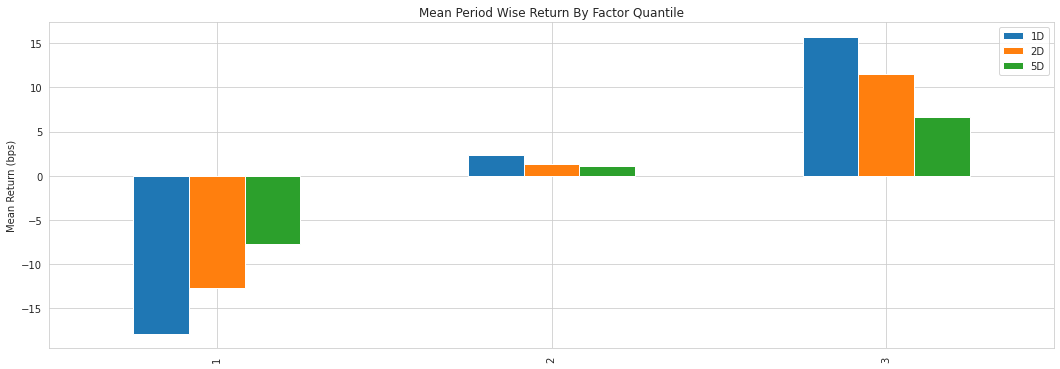

In [24]:
plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = False,
                                   ylim_percentiles = None)
plt.show()

In [25]:
factor_returns = perf.factor_returns(factor_data[factor_data['factor_quantile'].isin([1, 3])], demeaned = True)

mean_quant_ret_bydate, std_quant_daily = \
        perf.mean_return_by_quantile(factor_data,
                                     by_date = True,
                                     by_group = False,
                                     demeaned = True,
                                     group_adjust = False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

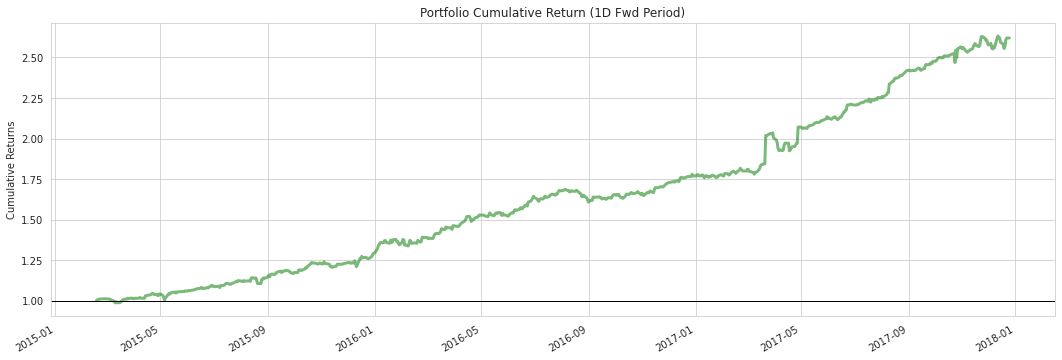

In [26]:
fig = plt.figure(figsize = (16, 8))
p = '1D'
title = 'Factor weighted LONG/SHORT portfolio cumulative returns'
plotting.plot_cumulative_returns(factor_returns[p],
                                         period = p)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

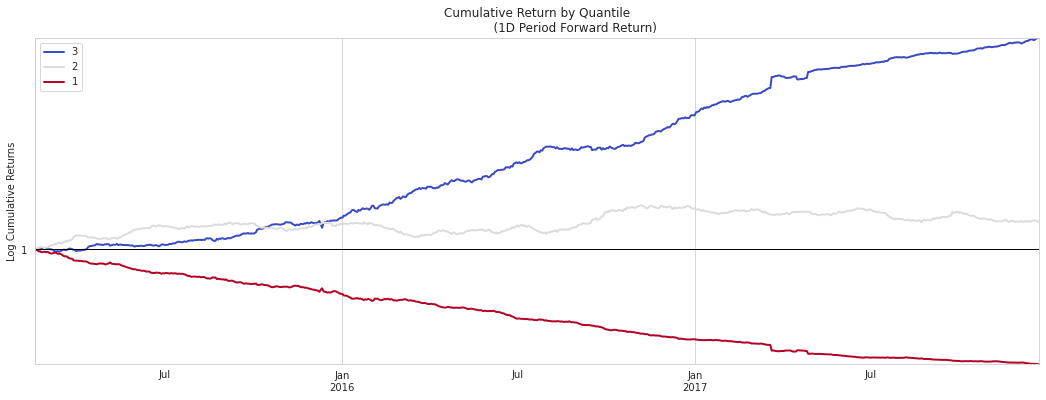

In [27]:
fig = plt.figure(figsize = (16, 8))
cumulative_quantile_returns = mean_quant_ret_bydate.groupby(level = ['factor_quantile', 'date']).sum()[p]
plotting.plot_cumulative_returns_by_quantile(cumulative_quantile_returns,
                                             period = p)
plt.show()

In [28]:
ic = perf.factor_information_coefficient(factor_data)

plotting.plot_information_table(ic)

Information Analysis


1D     2D      5D
IC Mean           0.035  0.048   0.054
IC Std.           0.145  0.143   0.138
Risk-Adjusted IC  0.245  0.336   0.388
t-stat(IC)          NaN    NaN  10.582
p-value(IC)         NaN    NaN   0.000
IC Skew             NaN    NaN   1.400
IC Kurtosis         NaN    NaN   8.361

In [29]:
pyfolio_input = alphalens.performance.create_pyfolio_input(factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [30]:
returns = pyfolio_input[0]
returns

date
2015-02-17    0.000000
2015-02-18    0.002779
2015-02-19    0.005935
2015-02-20    0.000440
2015-02-21    0.000000
                ...   
2017-12-21    0.015502
2017-12-22    0.004322
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000004
Freq: D, Length: 1043, dtype: float64

In [31]:
positions = pyfolio_input[1]
positions

asset           4SI.JO        ABG.JO       ABSP.JO       ACE.JO       ACG.JO  \
date                                                                           
2015-02-17    0.000000  13000.693274  12844.295655  -676.116399  2633.418117   
2015-02-18    0.000000   6922.382429  16195.891858 -1419.636157  1473.372984   
2015-02-19    0.000000   2076.510397  32355.395780     0.000000  1150.837190   
2015-02-20    0.000000    746.960350  37962.908305     0.000000   984.827843   
2015-02-21    0.000000      0.000000      0.000000     0.000000     0.000000   
...                ...           ...           ...          ...          ...   
2017-12-21  707.914687 -35977.546045 -24577.158337     0.000000     0.000000   
2017-12-22    0.000000 -28457.119931 -28873.679858     0.000000     0.000000   
2017-12-23    0.000000      0.000000      0.000000     0.000000     0.000000   
2017-12-24    0.000000      0.000000      0.000000     0.000000     0.000000   
2017-12-25    0.000000      0.000000      0.000000     0.000000     0.000000   

asset            ACL.JO       ACS.JO       ACT.JO       ADH.JO       ADI.JO  \
date                                                                          
2015-02-17 -1750.581923  -794.108130     0.000000  -813.657590 -1083.064985   
2015-02-18 -2193.096612 -1526.456679     0.000000 -1512.730580 -1664.050631   
2015-02-19 -2372.564367     0.000000     0.000000 -1726.596702 -1958.895420   
2015-02-20 -2257.795379     0.000000     0.000000     0.000000 -1984.891223   
2015-02-21     0.000000     0.000000     0.000000     0.000000     0.000000   
...                 ...          ...          ...          ...          ...   
2017-12-21  1470.477507 -1172.726183     0.000000 -3168.178702  -484.860021   
2017-12-22  2576.528164  -137.248571  1933.211083 -2571.626660     0.000000   
2017-12-23     0.000000     0.000000     0.000000     0.000000     0.000000   
2017-12-24     0.000000     0.000000     0.000000     0.000000     0.000000   
2017-12-25     0.000000     0.000000     0.000000     0.000000     0.000000   

asset       ...  WEA.JO  WEZ.JO       WHL.JO  WKF.JO       WSL.JO  \
date        ...                                                     
2015-02-17  ...     0.0     0.0 -8902.854119     0.0     0.000000   
2015-02-18  ...     0.0     0.0 -6632.210613     0.0 -1347.988990   
2015-02-19  ...     0.0     0.0 -7821.569211     0.0     0.000000   
2015-02-20  ...     0.0     0.0 -9534.396392     0.0 -1650.867252   
2015-02-21  ...     0.0     0.0     0.000000     0.0     0.000000   
...         ...     ...     ...          ...     ...          ...   
2017-12-21  ...     0.0     0.0 -7407.558335     0.0   722.071362   
2017-12-22  ...     0.0     0.0 -7757.248946     0.0  1919.818691   
2017-12-23  ...     0.0     0.0     0.000000     0.0     0.000000   
2017-12-24  ...     0.0     0.0     0.000000     0.0     0.000000   
2017-12-25  ...     0.0     0.0     0.000000     0.0     0.000000   

asset            YRK.JO    YYLBEE.JO      ZED.JO      ZPLP.JO          cash  
date                                                                         
2015-02-17     0.000000     0.000000  310.539774     0.000000  1.000000e+06  
2015-02-18     0.000000     0.000000 -613.051523     0.000000  1.002779e+06  
2015-02-19     0.000000     0.000000 -925.247449     0.000000  1.008731e+06  
2015-02-20 -1709.372789     0.000000 -940.516054     0.000000  1.009175e+06  
2015-02-21     0.000000     0.000000    0.000000     0.000000  1.009175e+06  
...                 ...          ...         ...          ...           ...  
2017-12-21     0.000000 -1979.621632 -326.827339 -9357.846163  2.608317e+06  
2017-12-22     0.000000  -735.878093  765.662649 -9370.142631  2.619590e+06  
2017-12-23     0.000000     0.000000    0.000000     0.000000  2.619590e+06  
2017-12-24     0.000000     0.000000    0.000000     0.000000  2.619590e+06  
2017-12-25     0.000000     0.000000    0.000000     0.000000  2.619581e+06  

[1043 rows x 386 c

In [32]:
benchmark = pyfolio_input[2]
benchmark

date
2015-02-17    0.000000
2015-02-18   -0.004211
2015-02-19   -0.000349
2015-02-20    0.011001
2015-02-21    0.000000
                ...   
2017-12-21    0.004339
2017-12-22    0.003450
2017-12-23    0.000000
2017-12-24    0.000000
2017-12-25   -0.000002
Freq: D, Name: benchmark, Length: 1043, dtype: float64

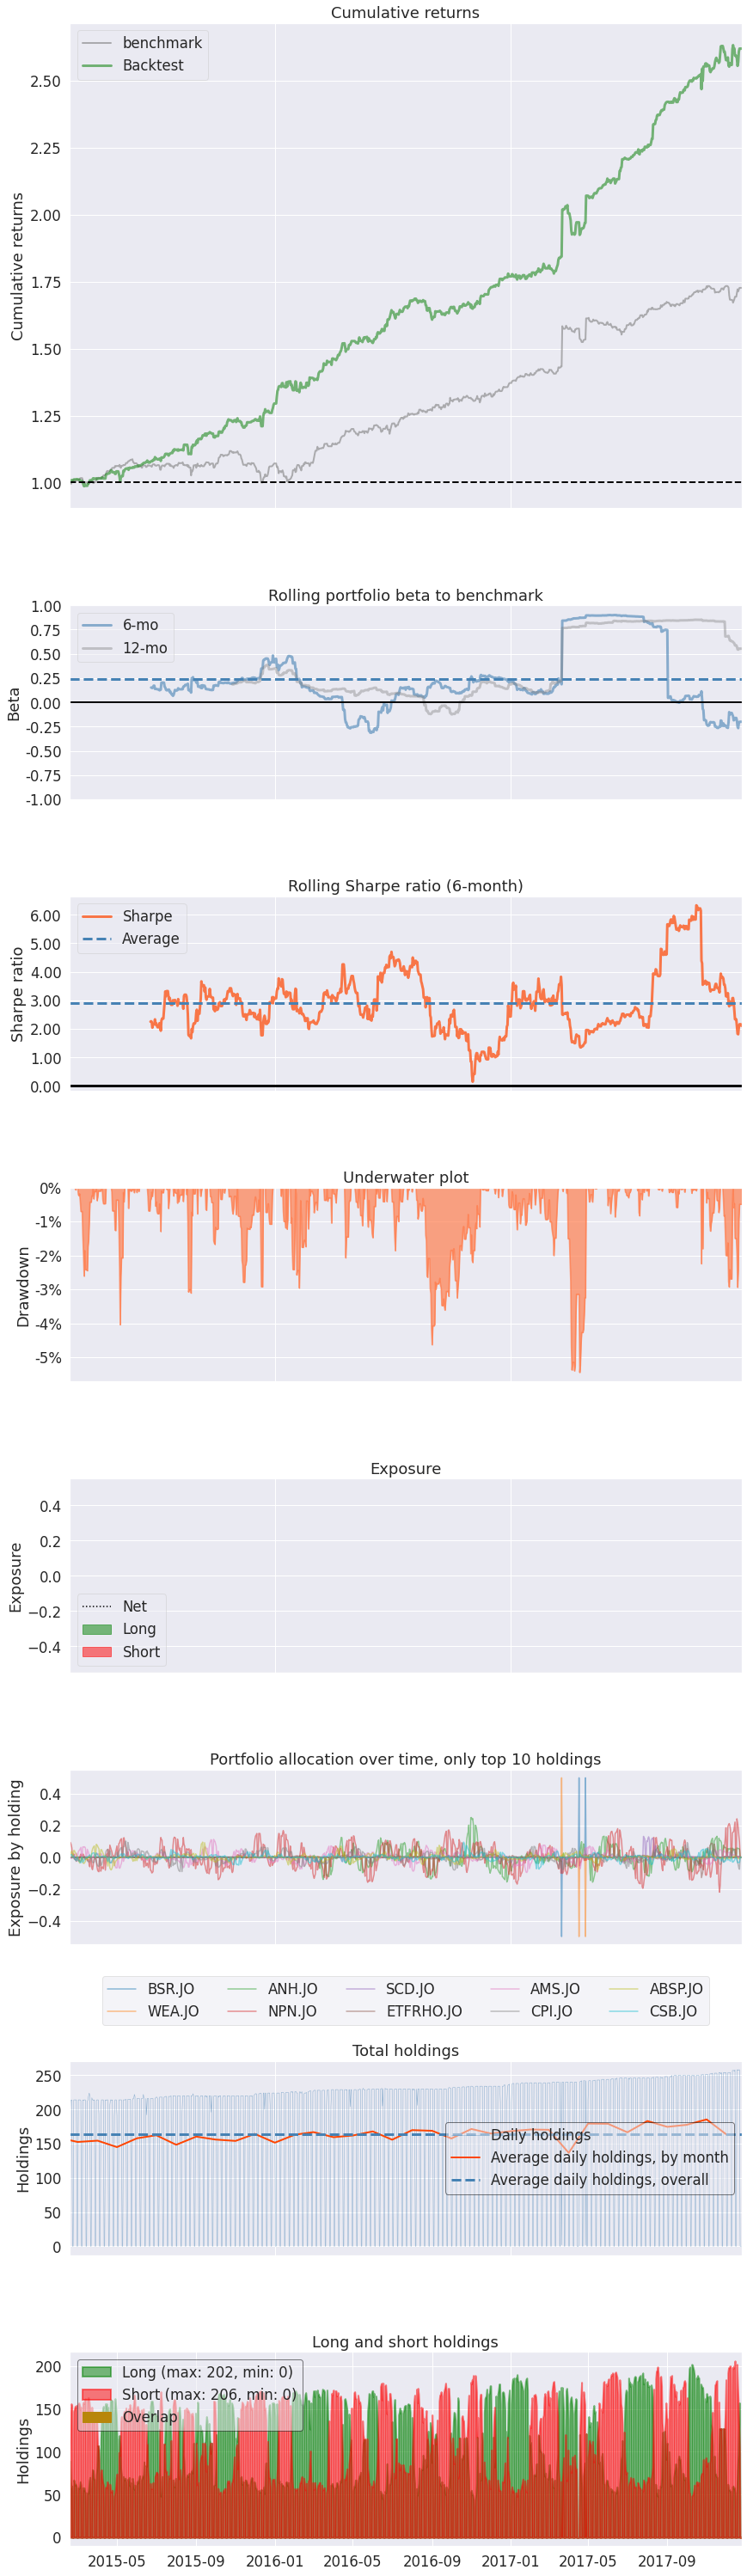

In [33]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

# A Quantamental Approach

In [34]:
import mlfinlab as ml
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

## Universe Selection

In [35]:
QTradeableStocks_median_dollar_volume = 2500000
exchange_rate = 16.56
minimum_dollar_volume = QTradeableStocks_median_dollar_volume * exchange_rate
minimum_dollar_volume

41400000.0

In [36]:
%time
dollar_volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 200:
        data = data.copy()
        close = data['close']
        volume = data['volume']
        
        dollar_volume = volume.mul(close)
        trailing_dollar_volume = dollar_volume.rolling(window = 200).median()

        trailing_dollar_volume.name = 'trailing_dollar_volume'
        out = pd.DataFrame(trailing_dollar_volume)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index()#.set_index(['Date', 'symbol'])

        dollar_volume_data = pd.concat([dollar_volume_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


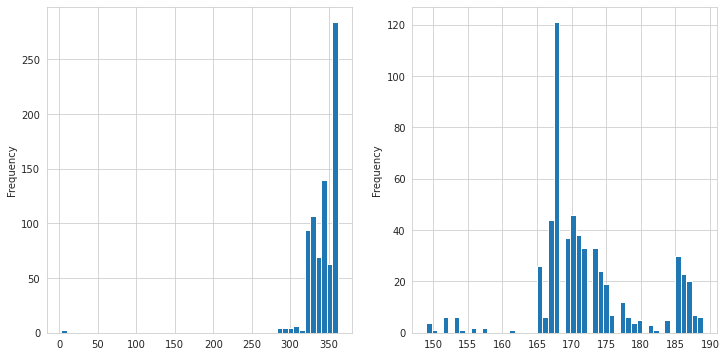

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

dollar_volume_data\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

dollar_volume_data[dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume]\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [38]:
dollar_volume_data = dollar_volume_data.set_index(['Date', 'symbol'])
dollar_volume_data['group'] = np.where(dollar_volume_data['trailing_dollar_volume'] > minimum_dollar_volume, 'Tradeable', 'Non-tradeable')
dollar_volume_data

trailing_dollar_volume          group
Date       symbol                                        
2015-01-01 ABG.JO                      NaN  Non-tradeable
2015-01-02 ABG.JO                      NaN  Non-tradeable
2015-01-05 ABG.JO                      NaN  Non-tradeable
2015-01-06 ABG.JO                      NaN  Non-tradeable
2015-01-07 ABG.JO                      NaN  Non-tradeable
...                                    ...            ...
2017-12-25 ZPLP.JO              16254855.0  Non-tradeable
2017-12-26 ZPLP.JO              16254855.0  Non-tradeable
2017-12-27 ZPLP.JO              16254855.0  Non-tradeable
2017-12-28 ZPLP.JO              16094445.0  Non-tradeable
2017-12-29 ZPLP.JO              16094445.0  Non-tradeable

[267747 rows x 2 columns]

In [39]:
(dollar_volume_data['group'].value_counts() / len(dollar_volume_data)).round(3) * 100

Non-tradeable    62.8
Tradeable        37.2
Name: group, dtype: float64

In [40]:
QTradeableStocks_minimun_price = 5
minimum_price = QTradeableStocks_minimun_price * exchange_rate
minimum_price

82.8

In [41]:
%time
price_filter_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 50:
        data = data.copy()
        close = data['close']
        
        prices = close

        prices.name = 'prices'
        out = pd.DataFrame(prices)
        out['symbol'] = symbol
        out.index.name = 'Date'
        out = out.reset_index().set_index(['Date', 'symbol'])

        price_filter_data = pd.concat([price_filter_data, out])
        # print(i, symbol)

price_filter_data

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


prices
Date       symbol         
2017-10-19 4SI.JO    235.0
2017-10-20 4SI.JO    250.0
2017-10-23 4SI.JO    269.0
2017-10-24 4SI.JO    285.0
2017-10-25 4SI.JO    285.0
...                    ...
2017-12-25 ZPLP.JO  6395.0
2017-12-26 ZPLP.JO  6395.0
2017-12-27 ZPLP.JO  6393.0
2017-12-28 ZPLP.JO  6385.0
2017-12-29 ZPLP.JO  6380.0

[270135 rows x 1 columns]

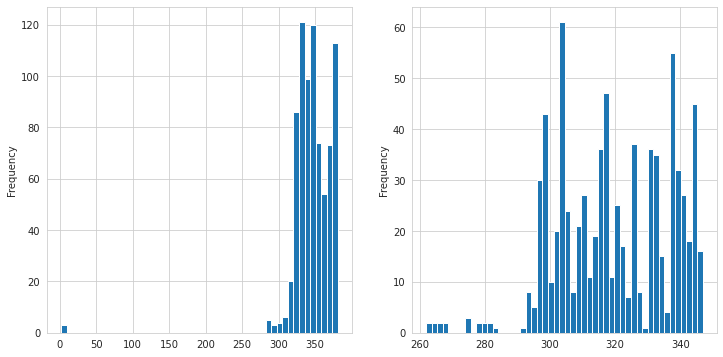

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

price_filter_data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = price_filter_data[price_filter_data['prices'] > minimum_price]
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [43]:
price_filter_data['group'] = np.where(price_filter_data['prices'] > minimum_price, 'Tradeable', 'Non-tradeable')
price_filter_data

prices      group
Date       symbol                    
2017-10-19 4SI.JO    235.0  Tradeable
2017-10-20 4SI.JO    250.0  Tradeable
2017-10-23 4SI.JO    269.0  Tradeable
2017-10-24 4SI.JO    285.0  Tradeable
2017-10-25 4SI.JO    285.0  Tradeable
...                    ...        ...
2017-12-25 ZPLP.JO  6395.0  Tradeable
2017-12-26 ZPLP.JO  6395.0  Tradeable
2017-12-27 ZPLP.JO  6393.0  Tradeable
2017-12-28 ZPLP.JO  6385.0  Tradeable
2017-12-29 ZPLP.JO  6380.0  Tradeable

[270135 rows x 2 columns]

In [44]:
(price_filter_data['group'].value_counts() / len(price_filter_data)).round(3) * 100

Tradeable        92.0
Non-tradeable     8.0
Name: group, dtype: float64

In [45]:
dollar_volume_data = dollar_volume_data.rename(columns = {'group':'filter1'})
price_filter_data = price_filter_data.rename(columns = {'group':'filter2'})
tradeable_universe = pd.concat([dollar_volume_data, price_filter_data], axis = 1)

tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2  
Date       symbol                    
2015-01-01 ABG.JO         Tradeable  
           ABSP.JO        Tradeable  
           ACE.JO     Non-tradeable  
           ACG.JO         Tradeable  
           ACL.JO         Tradeable  
...                             ...  
2017-12-29 WSL.JO         Tradeable  
           YRK.JO         Tradeable  
           YYLBEE.JO      Tradeable  
           ZED.JO         Tradeable  
           ZPLP.JO        Tradeable  

[270135 rows x 4 columns]

In [46]:
tradeable_universe['filter'] = np.where(tradeable_universe['filter1'] == tradeable_universe['filter2'], tradeable_universe['filter1'], 'Non-tradeable')
tradeable_universe

trailing_dollar_volume        filter1   prices  \
Date       symbol                                                      
2015-01-01 ABG.JO                        NaN  Non-tradeable  18200.0   
           ABSP.JO                       NaN  Non-tradeable  79001.0   
           ACE.JO                        NaN  Non-tradeable     52.0   
           ACG.JO                        NaN  Non-tradeable    720.0   
           ACL.JO                        NaN  Non-tradeable   2641.0   
...                                      ...            ...      ...   
2017-12-29 WSL.JO                 25466691.0  Non-tradeable    167.0   
           YRK.JO                  9128730.5  Non-tradeable    258.0   
           YYLBEE.JO               8985922.5  Non-tradeable   6875.0   
           ZED.JO                496332189.5      Tradeable    690.0   
           ZPLP.JO                16094445.0  Non-tradeable   6380.0   

                            filter2         filter  
Date       symbol                                   
2015-01-01 ABG.JO         Tradeable  Non-tradeable  
           ABSP.JO        Tradeable  Non-tradeable  
           ACE.JO     Non-tradeable  Non-tradeable  
           ACG.JO         Tradeable  Non-tradeable  
           ACL.JO         Tradeable  Non-tradeable  
...                             ...            ...  
2017-12-29 WSL.JO         Tradeable  Non-tradeable  
           YRK.JO         Tradeable  Non-tradeable  
           YYLBEE.JO      Tradeable  Non-tradeable  
           ZED.JO         Tradeable      Tradeable  
           ZPLP.JO        Tradeable  Non-tradeable  

[270135 rows x 5 columns]

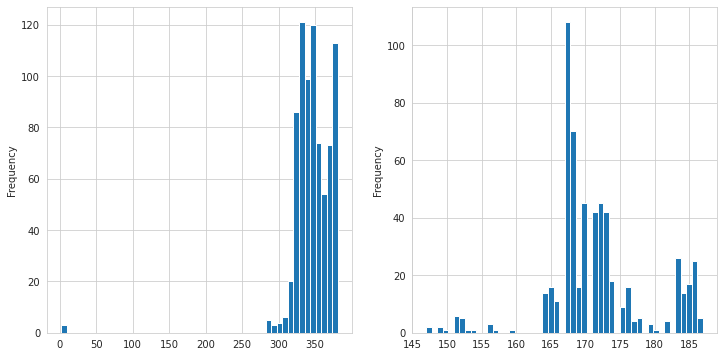

In [47]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

tradeable_universe.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[0])

data = tradeable_universe[tradeable_universe['filter'] == 'Tradeable']
data.reset_index()\
    .groupby(['Date'])['symbol'].count().plot(kind = 'hist', bins = 50, ax = axes[1])

In [48]:
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() * -1
    return macd_diff

In [49]:
def getIndicator(trainPrices,
                 indicator,
                 filter = 'QTradeable',
                 trailing_volume_n = 200, 
                 *args, **kwargs):


    factor_df = pd.DataFrame()
    for i, (symbol, data) in enumerate(trainPrices.items()):
        if len(data) > trailing_volume_n:
            data = data.copy()

            open = data['open']
            high = data['high']
            low = data['low']
            close = data['close']
            volume = data['volume']
#             adj_close = data['adj_close']


            factor = indicator(
                open = open,
                high = high,
                low = low,
                close = close,
                volume = volume,
                *args, **kwargs
            )

            out = pd.DataFrame(factor)
            factor_names = out.columns
            out['symbol'] = symbol
            out.index.name = 'date'
            out = out.reset_index()\
                  .set_index(['date', 'symbol'])

            if filter == 'QTradeable':

                def getTrailingVolume(
                    close, volume, symbol, n = trailing_volume_n):

                    volume = data['volume']
                    dollar_volume = volume.mul(close)

                    trailing_dollar_volume = \
                        dollar_volume.rolling(
                            window = n).median()
                    trailing_dollar_volume.name = \
                        'trailing_dollar_volume'

                    trailing_dollar_volume = \
                        pd.DataFrame(trailing_dollar_volume)

                    trailing_dollar_volume['symbol'] = symbol

                    trailing_dollar_volume = \
                        trailing_dollar_volume.\
                        reset_index()\
                        .set_index(['date', 'symbol'])

                    return trailing_dollar_volume

                def getPricing(close, symbol):
                    prices = pd.DataFrame(close)
                    prices['symbol'] = symbol
                    prices = prices.reset_index()\
                        .set_index(['date', 'symbol'])

                    return prices

                # volume filter
                trailing_dollar_volume = \
                    getTrailingVolume(close, volume, symbol)

                # price filter
                prices = getPricing(close, symbol)

                out = pd.concat(
                    [out, trailing_dollar_volume, prices], 
                    axis = 1)

                QTradeableStocks_median_dollar_volume = 2500000
                exchange_rate = 16.56
                minimum_dollar_volume = \
                    QTradeableStocks_median_dollar_volume * exchange_rate

                QTradeableStocks_minimun_price = 5
                minimum_price = \
                    QTradeableStocks_minimun_price * exchange_rate

                volume_mask = out['trailing_dollar_volume'] > \
                    minimum_dollar_volume
                price_mask = out['close'] > minimum_price

                out = out[volume_mask & price_mask].drop(['trailing_dollar_volume', 'close'], axis = 1)

            factor_df = pd.concat([factor_df, out])#.unstack().asfreq('C').stack()
    return factor_df

In [50]:
macd_data = getIndicator(trainPrices, macdDiff)
macd_data

MACD_diff_12_26
date       symbol                  
2015-10-07 ABG.JO       -115.056498
2015-10-08 ABG.JO        -93.851347
2015-10-09 ABG.JO        -88.838636
2015-10-12 ABG.JO        -68.508261
2015-10-13 ABG.JO        -44.400638
...                             ...
2017-04-25 ZPLP.JO        11.463784
2017-04-26 ZPLP.JO        13.343110
2017-04-28 ZPLP.JO        11.059557
2017-05-04 ZPLP.JO         8.832516
2017-05-05 ZPLP.JO         8.863320

[99229 rows x 1 columns]

In [51]:
def getPrices(trainPrices, symbols):
    prices_data = pd.DataFrame()
    for symbol, data in trainPrices.items():
        if symbol in symbols:
            out = data['close']
            out.name = symbol
            prices_data = pd.concat([prices_data, out], axis = 1)
    prices_data.index = pd.to_datetime(prices_data.index)
    return prices_data#.asfreq('C')

In [52]:
prices_data = getPrices(trainPrices, symbols = macd_data.index.levels[1])
prices_data

ABG.JO  ABSP.JO  ACG.JO  ACL.JO  ACT.JO       ADH.JO  ADI.JO  \
2015-01-01  18200.0  79001.0   720.0  2641.0   520.0   849.054016   810.0   
2015-01-02  17989.0  79050.0   720.0  2582.0   523.0   861.741028   813.0   
2015-01-05  17375.0  79454.0   740.0  2450.0   519.0   857.836975   820.0   
2015-01-06  17828.0  79051.0   765.0  2455.0   530.0   863.692993   820.0   
2015-01-07  18200.0  78200.0   765.0  2381.0   524.0   849.054016   815.0   
...             ...      ...     ...     ...     ...          ...     ...   
2017-12-25  17200.0  68800.0   399.0   389.0   621.0  1675.000000   615.0   
2017-12-26  17200.0  68800.0   399.0   389.0   621.0  1675.000000   615.0   
2017-12-27  17685.0  68800.0   380.0   400.0   650.0  1635.000000   610.0   
2017-12-28  17800.0  68800.0   384.0   400.0   640.0  1639.000000   641.0   
2017-12-29  18106.0  68456.0   398.0   392.0   640.0  1691.000000   645.0   

            ADR.JO      AEG.JO  AEL.JO  ...  TRU.JO       TSG.JO  TTO.JO  \
2015-01-01  3211.0  751.598022  1650.0  ...  7728.0  2514.479980   270.0   
2015-01-02  3205.0  749.439026  1619.0  ...  7785.0  2516.209961   270.0   
2015-01-05  3305.0  772.763977  1619.0  ...  7725.0  2440.780029   269.0   
2015-01-06  3340.0  734.320007  1699.0  ...  7690.0  2443.379883   255.0   
2015-01-07  3352.0  749.439026  1645.0  ...  7720.0  2452.909912   265.0   
...            ...         ...     ...  ...     ...          ...     ...   
2017-12-25  1830.0   85.958603  1168.0  ...  9101.0  2124.300049   830.0   
2017-12-26  1830.0   85.958603  1168.0  ...  9101.0  2124.300049   830.0   
2017-12-27  1771.0   86.390602  1200.0  ...  9178.0  2090.479980   840.0   
2017-12-28  1759.0   85.958603  1187.0  ...  9266.0  2123.429932   840.0   
2017-12-29  1800.0   86.390602  1191.0  ...  9449.0  2096.550049   880.0   

            TWR.JO  VKE.JO   VOD.JO   WBO.JO  WHL.JO  ZED.JO  ZPLP.JO  
2015-01-01   900.0  1800.0  12843.0  12076.0  7710.0   755.0      NaN  
2015-01-02   900.0  1788.0  12631.0  12400.0  7625.0   790.0      NaN  
2015-01-05   900.0  1810.0  12163.0  12329.0  7340.0   780.0      NaN  
2015-01-06   870.0  1800.0  12345.0  12000.0  7621.0   755.0      NaN  
2015-01-07   920.0  1796.0  12750.0  12014.0  7750.0   740.0      NaN  
...            ...     ...      ...      ...     ...     ...      ...  
2017-12-25   675.0  2070.0  14080.0  15747.0  6293.0   671.0   6395.0  
2017-12-26   675.0  2070.0  14080.0  15747.0  6293.0   671.0   6395.0  
2017-12-27   690.0  2076.0  14226.0  15348.0  6329.0   679.0   6393.0  
2017-12-28   700.0  2065.0  14250.0  15400.0  6447.0   667.0   6385.0  
2017-12-29   700.0  2084.0  14559.0  15491.0  6515.0   690.0   6380.0  

[778 rows x 204 columns]

In [53]:
filtered_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data, 
    prices = prices_data, 
    quantiles = 3
)
filtered_factor_data

Dropped 1.9% entries from factor data: 1.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D      factor  factor_quantile
date       asset                                                             
2015-10-07 ABG.JO  -0.022346 -0.031788 -0.024581 -115.056498                1
           ABSP.JO -0.004189 -0.001311  0.011487 -234.860978                1
           ACG.JO  -0.010453 -0.003484  0.017422  -14.319572                2
           ACL.JO   0.085427  0.105528 -0.045226  -24.833719                1
           ACT.JO   0.020408  0.000000 -0.030612    1.062614                3
...                      ...       ...       ...         ...              ...
2017-12-15 VKE.JO   0.030075  0.037594  0.044612    3.048777                2
           VOD.JO   0.044239 -0.006562  0.027235  -16.592089                1
           WBO.JO   0.034295  0.071516  0.054096   34.925975                3
           WHL.JO   0.048323  0.082201  0.120378    5.387332                2
           ZED.JO   0.046774  0.082258  0.112903    4.577393                2

[97365 rows x 5 columns]

In [54]:
def plotFactorQuantileBars(
    factor_data, demeaned = True, by_group = False, group_adjust = False):
    
    mean_quant_ret, std_quantile = \
        perf.mean_return_by_quantile(
        factor_data,
        demeaned = demeaned,
        by_group = by_group,
        group_adjust = group_adjust)

    mean_quant_rateret = \
            mean_quant_ret\
                .apply(
        utils.rate_of_return, 
        axis = 0,
        base_period = mean_quant_ret.columns[0])
    
    plotting.plot_quantile_returns_bar(mean_quant_rateret,
                                   by_group = by_group,
                                   ylim_percentiles = None)
    plt.show()

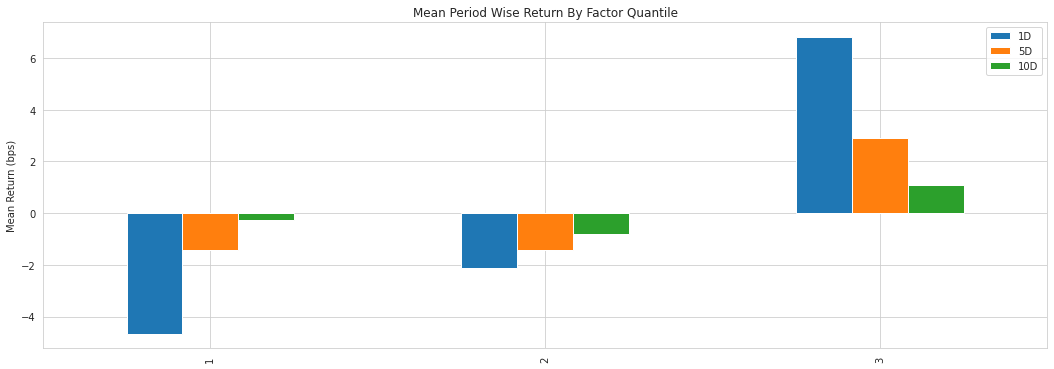

In [55]:
plotFactorQuantileBars(filtered_factor_data)

In [56]:
def plotCumulativeReturns(factor_data, p = '1D', demeaned = True, group_adjust = False):
    factor_returns = perf.factor_returns(
        factor_data, 
        demeaned = demeaned, 
        group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    title = \
        'Factor weighted LONG/SHORT portfolio cumulative returns'
    plotting.plot_cumulative_returns(
        factor_returns[p],
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 1152x576 with 0 Axes>

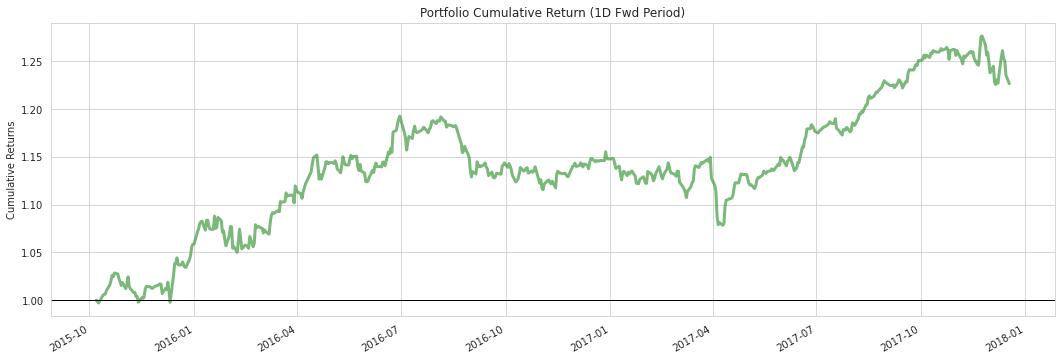

In [57]:
plotCumulativeReturns(filtered_factor_data)

In [58]:
def plotQuantileCumelativeReturns(factor_data, 
                                  p = '1D',
                                  demeaned = True,
                                  by_date = True,
                                  by_group = False,
                                  group_adjust = False):
    
    mean_quant_ret_bydate, std_quant_daily = \
            perf.mean_return_by_quantile(
                             factor_data,
                             demeaned = demeaned,
                             by_date = by_date,
                             by_group = by_group,
                             group_adjust = group_adjust)

    fig = plt.figure(figsize = (16, 8))
    cumulative_quantile_returns = \
        mean_quant_ret_bydate\
        .groupby(level = ['factor_quantile', 'date'])\
        .sum()[p]
    
    plotting.plot_cumulative_returns_by_quantile(
        cumulative_quantile_returns,
        period = p)
    plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

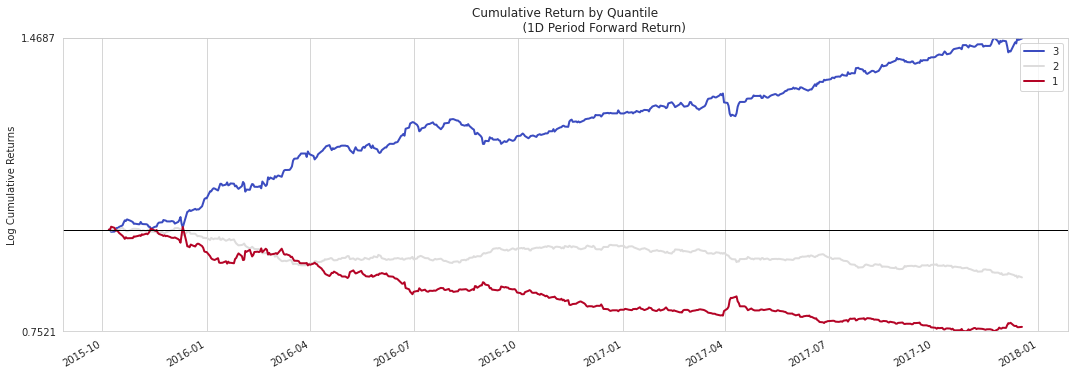

In [59]:
plotQuantileCumelativeReturns(filtered_factor_data)

In [60]:
def InformationTable(factor_data):
    ic = perf.factor_information_coefficient(factor_data)

    return plotting.plot_information_table(ic)

In [61]:
InformationTable(filtered_factor_data)

Information Analysis


1D     5D    10D
IC Mean           0.026  0.031  0.024
IC Std.           0.154  0.162  0.162
Risk-Adjusted IC  0.168  0.189  0.149
t-stat(IC)          NaN  4.503  3.544
p-value(IC)         NaN  0.000  0.000
IC Skew             NaN  0.200  0.196
IC Kurtosis         NaN  1.117  0.476

In [62]:
pyfolio_input = alphalens.performance.create_pyfolio_input(filtered_factor_data, period = '1D', capital = 1000000, quantiles = [1, 3])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [63]:
returns = pyfolio_input[0]
positions = pyfolio_input[1]
benchmark = pyfolio_input[2]

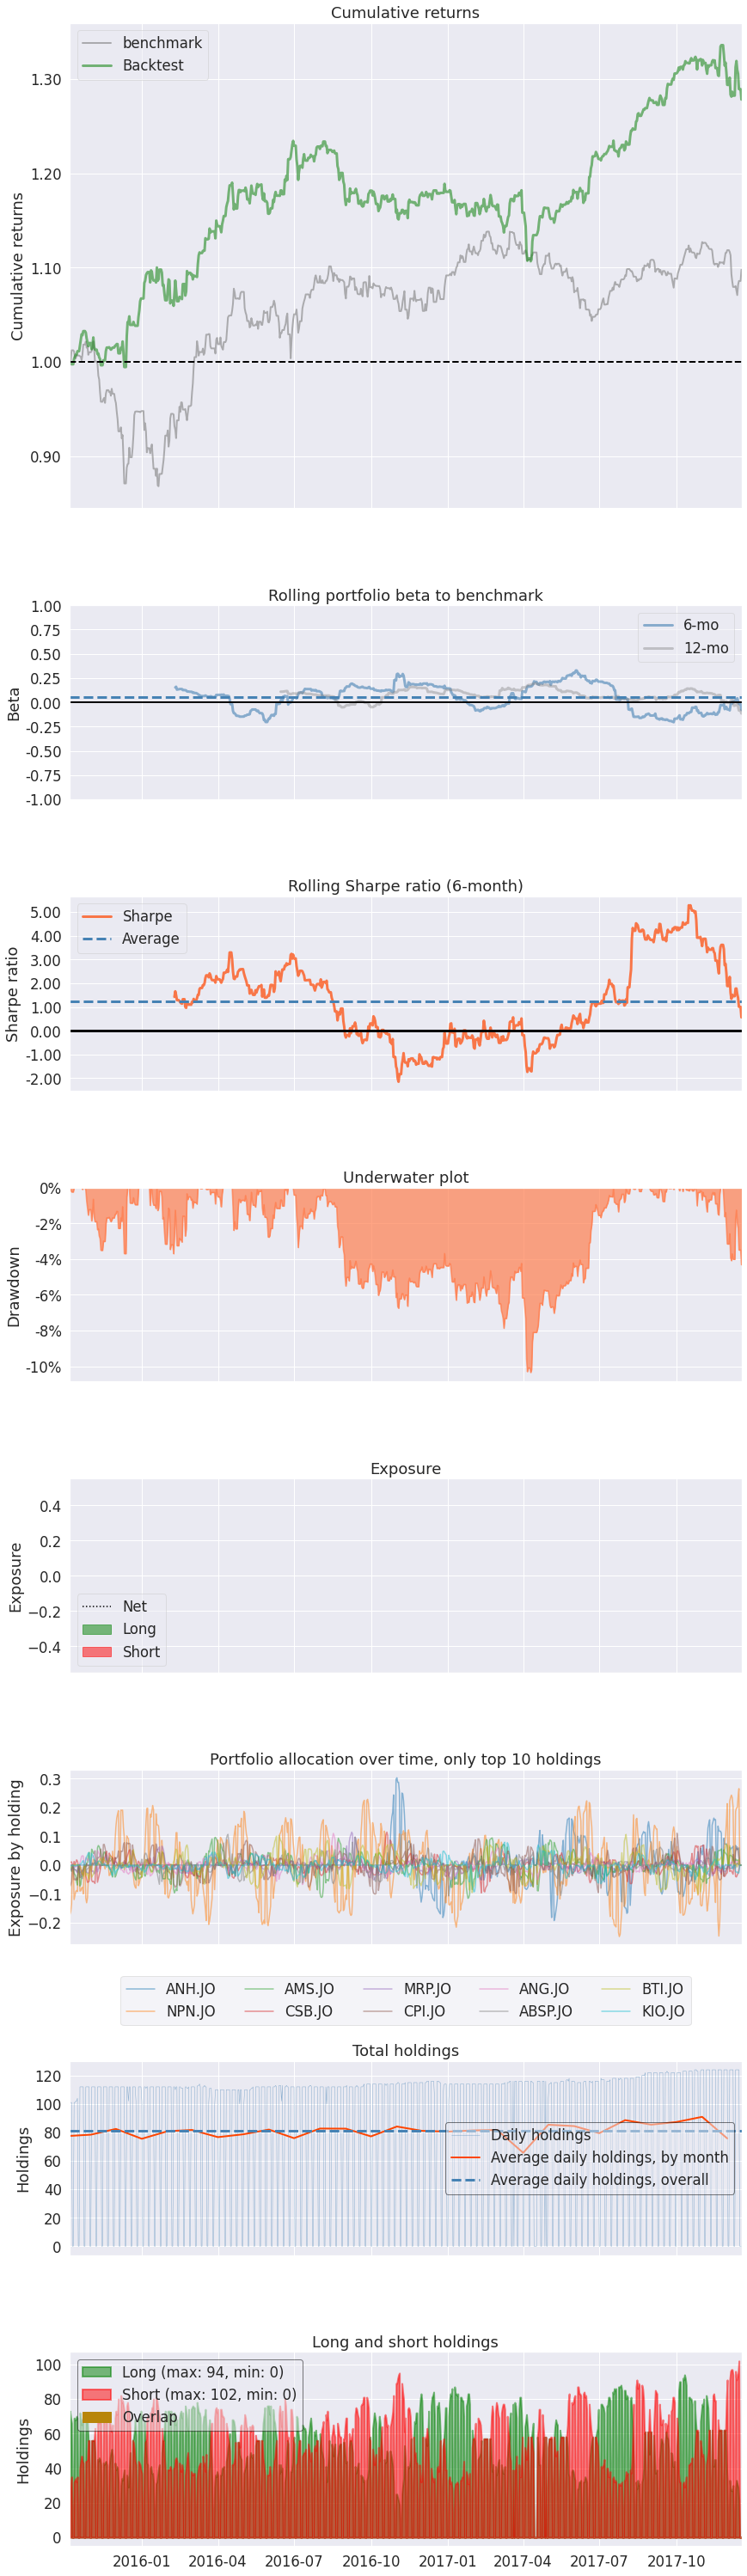

In [64]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark, )

## Feature Engineering

### Labeling (Tripple Barrier Method)

In [65]:
def barrier_touched(out_df, events):
    """
    Advances in Financial Machine Learning, Snippet 3.9, page 55, Question 3.3.

    Adjust the getBins function (Snippet 3.7) to return a 0 whenever the vertical barrier is the one touched first.

    Top horizontal barrier: 1
    Bottom horizontal barrier: -1
    Vertical barrier: 0

    :param out_df: (pd.DataFrame) Returns and target
    :param events: (pd.DataFrame) The original events data frame. Contains the pt sl multiples needed here.
    :return: (pd.DataFrame) Returns, target, and labels
    """
    store = []
    for date_time, values in out_df.iterrows():
        ret = values['ret']
        target = values['trgt']

        pt_level_reached = ret > np.log(1 + target) * events.loc[date_time, 'pt']
        sl_level_reached = ret < -np.log(1 + target) * events.loc[date_time, 'sl']

        if ret > 0.0 and pt_level_reached:
            # Top barrier reached
            store.append(1)
        elif ret < 0.0 and sl_level_reached:
            # Bottom barrier reached
            store.append(-1)
        else:
            # Vertical barrier reached
            store.append(0)

    # Save to 'bin' column and return
    out_df['bin'] = store
    return out_df

def get_bins(triple_barrier_events, close, open, at_open = True):
    """
    Advances in Financial Machine Learning, Snippet 3.7, page 51.
    
    NB: Edited to allow entrance into positions based on following period open prices rather
    already observed close prices.

    Labeling for Side & Size with Meta Labels

    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:

    Now the possible values for labels in out['bin'] are {0,1}, as opposed to whether to take the bet or pass,
    a purely binary prediction. When the predicted label the previous feasible values {−1,0,1}.
    The ML algorithm will be trained to decide is 1, we can use the probability of this secondary prediction
    to derive the size of the bet, where the side (sign) of the position has been set by the primary model.

    :param triple_barrier_events: (pd.DataFrame)
                -events.index is event's starttime
                -events['t1'] is event's endtime
                -events['trgt'] is event's target
                -events['side'] (optional) implies the algo's position side
                Case 1: ('side' not in events): bin in (-1,1) <-label by price action
                Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    :param close: (pd.Series) Close prices
    :return: (pd.DataFrame) Meta-labeled events
    """

    # 1) Align prices with their respective events
    events_ = triple_barrier_events.dropna(subset=['t1'])
    all_dates = events_.index.union(other=events_['t1'].array).drop_duplicates()
    prices = close.reindex(all_dates, method='bfill')

    # 2) Create out DataFrame
    out_df = pd.DataFrame(index=events_.index)
    # Need to take the log returns, else your results will be skewed for short positions
    if not at_open: # then at close
        out_df['ret'] = np.log(prices.loc[events_['t1'].array].array) - np.log(prices.loc[events_.index])
    else: # then at open
       
        close = close.reindex(all_dates, method='bfill')
        open = open.shift(-1).reindex(all_dates, method = 'bfill')
            
#         out_df['ret'] = (np.log(close.shift(-1)) - np.log(open.shift(-1))).loc[events_.index]
        out_df['ret'] = np.log(open.loc[events_['t1'].array].array) - np.log(open.loc[events_.index])
    out_df['trgt'] = events_['trgt']

    # Meta labeling: Events that were correct will have pos returns
    if 'side' in events_:
        out_df['ret'] = out_df['ret'] * events_['side']  # meta-labeling

    # Added code: label 0 when vertical barrier reached
    out_df = barrier_touched(out_df, triple_barrier_events)

    # Meta labeling: label incorrect events with a 0
    if 'side' in events_:
        out_df.loc[out_df['ret'] <= 0, 'bin'] = 0

    # Transform the log returns back to normal returns.
    out_df['ret'] = np.exp(out_df['ret']) - 1

    # Add the side to the output. This is useful for when a meta label model must be fit
    tb_cols = triple_barrier_events.columns
    if 'side' in tb_cols:
        out_df['side'] = triple_barrier_events['side']

    return out_df

In [66]:
def getLabels(datas,
              lookback = 5,
              num_days_ahead = 1,
              pt_sl = [1, 1],
              min_ret = 0.005,
              at_open = True):
    
    output = {}
    for symbol, data in datas.items():
        
        try:
            close = data['close']
            open = data['open']

            if len(close) > lookback: 

                daily_vol = ml.util.get_daily_vol(
                                close, 
                                lookback = lookback)
        
                if daily_vol.nunique() != 1:

                    cusum_events = ml.filters.cusum_filter(
                                        close,
                                        threshold = daily_vol.mean())

                    data = data.reset_index()
                    data['event'] = np.where(data['Date'].isin(cusum_events), 1, 0)
                    data.set_index('Date', inplace = True)

                    vertical_barriers = ml.labeling.add_vertical_barrier(
                                            t_events = cusum_events,
                                            close = close,
                                            num_days = num_days_ahead)

                    data['vertical_barriers'] = vertical_barriers

                    triple_barrier_events = ml.labeling.get_events(
                                    close = close,
                                    t_events = cusum_events,
                                    pt_sl = pt_sl,
                                    target = daily_vol,
                                    min_ret = min_ret,
                                    vertical_barrier_times = vertical_barriers,
                                    num_threads = 1,
                                    verbose = False)

                    data = pd.concat(
                        [data, triple_barrier_events], 
                        axis = 1).drop('trgt', axis = 1)

                    labels = get_bins(
                        triple_barrier_events, close, open = open, at_open = at_open)

                    data = pd.concat([data, labels], axis = 1)
                    data.index.name = 'date'

                    data['profit_taking'] = data['pt'].mul(data['trgt'])
                    data['stop_loss'] = data['sl'].mul(data['trgt']).mul(-1)

                    data.reset_index(inplace = True)

                    data['holding_period'] = pd.to_datetime(data['t1'])\
                        .sub(pd.to_datetime(data['date']))\
                        .map(lambda x: x.days)
                    data.drop(['trgt', 'pt', 'sl'], axis = 1, inplace = True)
                    data.set_index('date', inplace = True)

                    data.rename(columns = 
                                {'ret':'expected_return', 
                                 'bin':'label'
                                }, inplace = True) 
                    output[symbol] = data[data['label'] != 0]
                    
        except Exception as e:
            print(f"{symbol}: {e}")
    return output

In [67]:
data = {'MTN.JO':trainPrices['MTN.JO']}
out = getLabels(data, lookback = 14, num_days_ahead = 5, pt_sl = [0.0001, 0.0001], at_open = True)['MTN.JO']
out['label'].value_counts() / len(out.dropna())

 1.0    0.504717
-1.0    0.500000
Name: label, dtype: float64

In [68]:
cusumTrainPrices = getLabels(trainPrices, lookback = 14, num_days_ahead = 5, pt_sl = [0.0001, 0.0001], at_open = True)

In [69]:
# pickle.dump(cusumTrainPrices, open('cusumTrainPrices.pkl', 'wb'))
# cusumTrainPrices = pickle.load(open('cusumTrainPrices.pkl', 'rb'))

In [70]:
data = cusumTrainPrices['ABG.JO'].copy()
data.iloc[:10]

high      low     open    close     volume     adj_close  \
date                                                                      
2015-01-01  18200.0  18200.0  18200.0  18200.0        0.0  12236.978516   
2015-01-02  18401.0  17989.0  17996.0  17989.0   334152.0  12095.112305   
2015-01-05  18036.0  17191.0  17960.0  17375.0   727355.0  11682.281250   
2015-01-06  18020.0  17201.0  17345.0  17828.0   960335.0  11986.860352   
2015-01-07  18335.0  17631.0  17642.0  18200.0   808879.0  12236.978516   
2015-01-08  18674.0  18026.0  18296.0  18670.0   753715.0  12552.989258   
2015-01-09  18700.0  18169.0  18636.0  18169.0   716987.0  12216.137695   
2015-01-12  18351.0  17779.0  18169.0  17800.0   521450.0  11968.035156   
2015-01-13  18597.0  17852.0  18199.0  18475.0  1338497.0  12421.878906   
2015-01-14  18475.0  17890.0  18228.0  18117.0  2319563.0  12181.172852   

            event vertical_barriers         t1  expected_return  label  \
date                                                                     
2015-01-01      0               NaT        NaT              NaN    NaN   
2015-01-02      0               NaT        NaT              NaN    NaN   
2015-01-05      1        2015-01-12        NaT              NaN    NaN   
2015-01-06      1        2015-01-12 2015-01-07         0.037071    1.0   
2015-01-07      0               NaT        NaT              NaN    NaN   
2015-01-08      1        2015-01-13 2015-01-09        -0.025059   -1.0   
2015-01-09      1        2015-01-14 2015-01-12         0.001651    1.0   
2015-01-12      0               NaT        NaT              NaN    NaN   
2015-01-13      1        2015-01-19 2015-01-14         0.017720    1.0   
2015-01-14      0               NaT        NaT              NaN    NaN   

            profit_taking  stop_loss  holding_period  
date                                                  
2015-01-01            NaN        NaN             NaN  
2015-01-02            NaN        NaN             NaN  
2015-01-05            NaN        NaN             NaN  
2015-01-06       0.000002  -0.000002             1.0  
2015-01-07            NaN        NaN             NaN  
2015-01-08       0.000004  -0.000004             1.0  
2015-01-09       0.000003  -0.000003             3.0  
2015-01-12            NaN        NaN             NaN  
2015-01-13       0.000003  -0.000003             1.0  
2015-01-14            NaN        NaN             NaN

In [71]:
forward_returns = pd.DataFrame()
for symbol, data in cusumTrainPrices.items():
    data = data.copy()
    out = data[['open']].shift(-1)
    out['event'] = data['event']
    out['t1'] = data['t1']
    out['t1'].fillna(method = 'ffill', inplace = True)
    out = out.reset_index()
    out = out[out['date'] <= out['t1']]
    out['open'] = out['open'].pct_change(periods = 1).shift(-1)
    out['asset'] = symbol
    out = out[out['date'] != out['t1']].set_index(['date', 'asset'])
    out.rename(columns = {'open':'1D'}, inplace = True)
    forward_returns = pd.concat([forward_returns, out])
forward_returns.sort_index(level = 'date', inplace = True)
forward_returns

1D  event         t1
date       asset                             
2015-01-06 ABG.JO  0.037071      1 2015-01-07
           ACG.JO  0.000000      1 2015-01-08
           AEG.JO  0.032942      1 2015-01-07
           AEL.JO  0.010942      1 2015-01-07
           AFT.JO  0.035514      1 2015-01-07
...                     ...    ...        ...
2017-12-27 TMT.JO  0.111111      1 2017-12-28
           TON.JO  0.016645      1 2017-12-28
           TRU.JO -0.053512      1 2017-12-28
           TWR.JO  0.014493      1 2017-12-28
           WBO.JO  0.022838      1 2017-12-28

[70172 rows x 3 columns]

In [72]:
data = forward_returns.reset_index()
data[data['asset'] == 'ABG.JO'].iloc[:10]

date   asset        1D  event         t1
0    2015-01-06  ABG.JO  0.037071      1 2015-01-07
136  2015-01-08  ABG.JO -0.025059      1 2015-01-09
226  2015-01-09  ABG.JO  0.001651      1 2015-01-12
387  2015-01-13  ABG.JO  0.017720      1 2015-01-14
1001 2015-01-22  ABG.JO -0.009026      1 2015-01-23
1186 2015-01-26  ABG.JO  0.008760      1 2015-01-27
1286 2015-01-27  ABG.JO  0.020830      1 2015-01-28
1642 2015-02-02  ABG.JO  0.003177      1 2015-02-03
1821 2015-02-04  ABG.JO -0.011100      1 2015-02-05
1963 2015-02-06  ABG.JO  0.009041      1 2015-02-09

In [73]:
for symbol, data in cusumTrainPrices.items():
    
    data = data[data['event'] == 1]
    cusumTrainPrices[symbol] = data

In [74]:
def pivottTarget(cusumTrainPrices):
    target = pd.DataFrame()
    for symbol, data in cusumTrainPrices.items():
        data = data.copy()
        data['expected_return'] = np.where(data['expected_return'].isna(), 0, data['expected_return'])
        data['holding_period'] = np.where(data['holding_period'] > 5, 1, data['holding_period'])
        data['holding_period'] = np.where(data['holding_period'].isna(), 0, data['holding_period'])
        data['label'] = np.where(data['label'].isna(), 0, data['label'])
        label = data['label']
        events = data['event']
        vv = data[['expected_return', 'holding_period']].copy()
        vv = pd.pivot(vv.reset_index(), index = 'date', columns = 'holding_period', values = 'expected_return')
        vv = pd.DataFrame(np.where(vv.isna(), 0, vv), index = vv.index, columns = vv.columns)
        out = pd.concat([vv, events, label], axis = 1)
        out['asset'] = symbol
        out = out.reset_index().set_index(['date', 'asset'])
        target = pd.concat([target, out])
    return target

In [75]:
target = pivottTarget(cusumTrainPrices)
target

0.0       1.0  2.0       3.0  event  label  4.0       5.0
date       asset                                                             
2017-10-23 4SI.JO   0.0  0.000000  0.0  0.000000      1    0.0  NaN       NaN
2017-10-27 4SI.JO   0.0  0.000000  0.0  0.030769      1    1.0  NaN       NaN
2017-11-06 4SI.JO   0.0 -0.037500  0.0  0.000000      1   -1.0  NaN       NaN
2017-11-08 4SI.JO   0.0 -0.038462  0.0  0.000000      1   -1.0  NaN       NaN
2017-11-09 4SI.JO   0.0  0.050000  0.0  0.000000      1    1.0  NaN       NaN
...                 ...       ...  ...       ...    ...    ...  ...       ...
2017-12-04 ZPLP.JO  NaN  0.032297  0.0  0.000000      1    1.0  0.0  0.000000
2017-12-07 ZPLP.JO  NaN  0.000000  0.0  0.000000      1    1.0  0.0  0.012007
2017-12-14 ZPLP.JO  NaN  0.017094  0.0  0.000000      1    1.0  0.0  0.000000
2017-12-15 ZPLP.JO  NaN  0.000000  0.0  0.050420      1    1.0  0.0  0.000000
2017-12-20 ZPLP.JO  NaN -0.000625  0.0  0.000000      1   -1.0  0.0  0.000000

[58001 rows x 8 columns]

In [76]:
target['label'].value_counts() / len(target)

-1.0    0.495267
 1.0    0.493698
 0.0    0.011034
Name: label, dtype: float64

In [77]:
target = target[target['label'] != 0]
target

0.0       1.0  2.0       3.0  event  label  4.0       5.0
date       asset                                                             
2017-10-27 4SI.JO   0.0  0.000000  0.0  0.030769      1    1.0  NaN       NaN
2017-11-06 4SI.JO   0.0 -0.037500  0.0  0.000000      1   -1.0  NaN       NaN
2017-11-08 4SI.JO   0.0 -0.038462  0.0  0.000000      1   -1.0  NaN       NaN
2017-11-09 4SI.JO   0.0  0.050000  0.0  0.000000      1    1.0  NaN       NaN
2017-11-21 4SI.JO   0.0  0.102703  0.0  0.000000      1    1.0  NaN       NaN
...                 ...       ...  ...       ...    ...    ...  ...       ...
2017-12-04 ZPLP.JO  NaN  0.032297  0.0  0.000000      1    1.0  0.0  0.000000
2017-12-07 ZPLP.JO  NaN  0.000000  0.0  0.000000      1    1.0  0.0  0.012007
2017-12-14 ZPLP.JO  NaN  0.017094  0.0  0.000000      1    1.0  0.0  0.000000
2017-12-15 ZPLP.JO  NaN  0.000000  0.0  0.050420      1    1.0  0.0  0.000000
2017-12-20 ZPLP.JO  NaN -0.000625  0.0  0.000000      1   -1.0  0.0  0.000000

[57361 rows x 8 columns]

In [78]:
target['label'] = target['label'].map({-1:1, 1:3})
target[0].fillna(0, inplace = True)
target[1].fillna(0, inplace = True)
target[2].fillna(0, inplace = True)
target[3].fillna(0, inplace = True)
target[4].fillna(0, inplace = True)
target[5].fillna(0, inplace = True)
target.isna().sum()

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0.0      0
1.0      0
2.0      0
3.0      0
event    0
label    0
4.0      0
5.0      0
dtype: int64

In [79]:
target

0.0       1.0  2.0       3.0  event  label  4.0       5.0
date       asset                                                             
2017-10-27 4SI.JO   0.0  0.000000  0.0  0.030769      1      3  0.0  0.000000
2017-11-06 4SI.JO   0.0 -0.037500  0.0  0.000000      1      1  0.0  0.000000
2017-11-08 4SI.JO   0.0 -0.038462  0.0  0.000000      1      1  0.0  0.000000
2017-11-09 4SI.JO   0.0  0.050000  0.0  0.000000      1      3  0.0  0.000000
2017-11-21 4SI.JO   0.0  0.102703  0.0  0.000000      1      3  0.0  0.000000
...                 ...       ...  ...       ...    ...    ...  ...       ...
2017-12-04 ZPLP.JO  0.0  0.032297  0.0  0.000000      1      3  0.0  0.000000
2017-12-07 ZPLP.JO  0.0  0.000000  0.0  0.000000      1      3  0.0  0.012007
2017-12-14 ZPLP.JO  0.0  0.017094  0.0  0.000000      1      3  0.0  0.000000
2017-12-15 ZPLP.JO  0.0  0.000000  0.0  0.050420      1      3  0.0  0.000000
2017-12-20 ZPLP.JO  0.0 -0.000625  0.0  0.000000      1      1  0.0  0.000000

[57361 rows x 8 columns]

In [80]:
multi_target = target.copy()#.apply(np.mean, axis = 1)
for i in [1, 2, 3, 4, 5]:
    multi_target.loc[:, i] = np.where(multi_target[i] != 0, multi_target['label'], multi_target[i])
multi_target

0.0  1.0  2.0  3.0  event  label  4.0  5.0
date       asset                                              
2017-10-27 4SI.JO   0.0  0.0  0.0  3.0      1      3  0.0  0.0
2017-11-06 4SI.JO   0.0  1.0  0.0  0.0      1      1  0.0  0.0
2017-11-08 4SI.JO   0.0  1.0  0.0  0.0      1      1  0.0  0.0
2017-11-09 4SI.JO   0.0  3.0  0.0  0.0      1      3  0.0  0.0
2017-11-21 4SI.JO   0.0  3.0  0.0  0.0      1      3  0.0  0.0
...                 ...  ...  ...  ...    ...    ...  ...  ...
2017-12-04 ZPLP.JO  0.0  3.0  0.0  0.0      1      3  0.0  0.0
2017-12-07 ZPLP.JO  0.0  0.0  0.0  0.0      1      3  0.0  3.0
2017-12-14 ZPLP.JO  0.0  3.0  0.0  0.0      1      3  0.0  0.0
2017-12-15 ZPLP.JO  0.0  0.0  0.0  3.0      1      3  0.0  0.0
2017-12-20 ZPLP.JO  0.0  1.0  0.0  0.0      1      1  0.0  0.0

[57361 rows x 8 columns]

In [81]:
multi_target = multi_target.iloc[:, [1, 2, 3, 4, 5]]
multi_target

1.0  2.0  3.0  event  label
date       asset                               
2017-10-27 4SI.JO   0.0  0.0  3.0      1      3
2017-11-06 4SI.JO   1.0  0.0  0.0      1      1
2017-11-08 4SI.JO   1.0  0.0  0.0      1      1
2017-11-09 4SI.JO   3.0  0.0  0.0      1      3
2017-11-21 4SI.JO   3.0  0.0  0.0      1      3
...                 ...  ...  ...    ...    ...
2017-12-04 ZPLP.JO  3.0  0.0  0.0      1      3
2017-12-07 ZPLP.JO  0.0  0.0  0.0      1      3
2017-12-14 ZPLP.JO  3.0  0.0  0.0      1      3
2017-12-15 ZPLP.JO  0.0  0.0  3.0      1      3
2017-12-20 ZPLP.JO  1.0  0.0  0.0      1      1

[57361 rows x 5 columns]

In [82]:
label = pd.melt(multi_target.reset_index(), id_vars = ['date', 'asset'], var_name = 'day', value_name='label')
label = label.set_index(['date', 'asset']).sort_index(level = 'date')
label = label[label['label'].isin([1, 2, 3])]
label['label'] = label['label'].map({1:-1, 2:0, 3:1})#['label']
# label = label['label']
label

day  label
date       asset               
2015-01-06 ABG.JO      1      1
           ABG.JO  event     -1
           ABG.JO  label      1
           ACG.JO      2      1
           ACG.JO  event     -1
...                  ...    ...
2017-12-27 TWR.JO  event     -1
           TWR.JO  label      1
           WBO.JO      1      1
           WBO.JO  event     -1
           WBO.JO  label      1

[167318 rows x 2 columns]

In [83]:
target['label'] = target['label'].map({1:-1, 2:0, 3:1})

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
target

0.0       1.0  2.0       3.0  event  label  4.0       5.0
date       asset                                                             
2017-10-27 4SI.JO   0.0  0.000000  0.0  0.030769      1      1  0.0  0.000000
2017-11-06 4SI.JO   0.0 -0.037500  0.0  0.000000      1     -1  0.0  0.000000
2017-11-08 4SI.JO   0.0 -0.038462  0.0  0.000000      1     -1  0.0  0.000000
2017-11-09 4SI.JO   0.0  0.050000  0.0  0.000000      1      1  0.0  0.000000
2017-11-21 4SI.JO   0.0  0.102703  0.0  0.000000      1      1  0.0  0.000000
...                 ...       ...  ...       ...    ...    ...  ...       ...
2017-12-04 ZPLP.JO  0.0  0.032297  0.0  0.000000      1      1  0.0  0.000000
2017-12-07 ZPLP.JO  0.0  0.000000  0.0  0.000000      1      1  0.0  0.012007
2017-12-14 ZPLP.JO  0.0  0.017094  0.0  0.000000      1      1  0.0  0.000000
2017-12-15 ZPLP.JO  0.0  0.000000  0.0  0.050420      1      1  0.0  0.000000
2017-12-20 ZPLP.JO  0.0 -0.000625  0.0  0.000000      1     -1  0.0  0.000000

[57361 rows x 8 columns]

### Factor Library

In [85]:
# data = trainPrices['GML.JO']
# open = data['open']
# high = data['high']
# low = data['low']
# close = data['close']
# volume = data['volume']

In [86]:
## Momentum indicators

# awesome oscillator
def ao(open = None, high = None, low = None, close = None, volume = None,
       s = 3, len = 9):
    ao = ta.momentum.AwesomeOscillatorIndicator(
        high, low, s = s, len = len).ao() 
    return ao

# kama indicator, normalised
def kamaCrossOver(open = None, high = None, low = None, close = None, volume = None,
                  n = 10, pow1 = 2, pow2 = 30):
    
    """
    Try pow1 = 2 to 5 for smoothing the indicator even further, may improve result
    """
    
    kamashort = ta.momentum.KAMAIndicator(close, n = n, pow1 = pow1, pow2 = pow2).kama()
    cross_over = close.sub(kamashort).div(close) * -1
    cross_over.name = 'kama_cross_over'
    return cross_over
    
# roc indicator
def rocIndicator(open = None, high = None, low = None, close = None, volume = None,
                n = 4):
    roc = ta.momentum.ROCIndicator(close, n = n).roc() * -1
    return roc

# reletive strength index
def rsi(open = open, high = None, low = None, close = None, volume = None,
       n = 5):
    rsi = ta.momentum.RSIIndicator(close, n = n).rsi()
    rsi.name = 'rsi'
    return rsi * -1

def tsi(open = None, high = None, low = None, close = None, volume = None,
       r = 9, s = 5):
    tsi = ta.momentum.TSIIndicator(close, r = r, s = s).tsi() 
    tsi.name = 'tsi'
    return tsi * -1

# stochastic oscilator
def stochOscillator(open = open, high = None, low = None, close = None, volume = None,
                    n = 14, m = 3, slow = None):
    
    lowest_low = low.rolling(window = n).min()
    highest_high = high.rolling(window = n).max()
    
    percentK = (close - lowest_low)/(highest_high - lowest_low) * 100
    percentD = ta.trend.sma(percentK, periods = m)
    signal = percentD.sub(percentK)
    signal.name = 'fast_stoch_osc'
    
    if not slow:
        return signal
    elif slow:
        slow_percentK = ta.trend.sma(percentK, periods = m)
        slow_percentD = ta.trend.sma(slow_percentK, periods = m)
        slow_signal = slow_percentD.sub(slow_percentK)
        slow_signal.name = 'slow_stoch_osc'
        return slow_signal

def uo(open = None, high = None, low = None, close = None, volume = None,
       s = 7, m = 14, len = 28, ws = 4, wm = 2, wl = 1):
    uo = ta.momentum.UltimateOscillator(
        high, low, close, s = s, m = m, len = len, ws = ws, wm = wm, wl = wl).uo() * -1
    return uo

def williamsR(open = None, high = None, low = None, close = None, volume = None,
       lbp = 14):
    wr = ta.momentum.WilliamsRIndicator(
        high, low, close, lbp = lbp).wr() * -1
    return wr

In [87]:
## Volatility Indicators
# bbands
def bbands(open = None, high = None, low = None, close = None, volume = None,
             n = 20, ndev = 2):
    bbands = ta.volatility\
        .BollingerBands(close, n = n, ndev = ndev)
    perc_b = bbands.bollinger_pband()
    hband_ind = bbands.bollinger_hband_indicator()
    lband_ind = bbands.bollinger_lband_indicator()
    bollinger_wband = bbands.bollinger_wband()
    
    return pd.concat(
        [hband_ind, lband_ind, perc_b, bollinger_wband], #
        axis = 1)

# Average true range
def atr(open = None, high = None, low = None, close = None, volume = None,
             n = 14):
    atr = ta.volatility.AverageTrueRange(high, low, close, n = n)
    atr = atr.average_true_range().div(close).mul(100)
    atr.name = 'atr'
    return atr

# Dochian channel
def dc(open = None, high = None, low = None, close = None, volume = None,
             n = 20):
    dc = ta.volatility.DonchianChannel(high, low, close, n = n)
    perc_b = dc.donchian_channel_pband()
    band_width = dc.donchian_channel_wband()

    return pd.concat([band_width, perc_b], axis = 1)

# Keltner Channel
def kc(open = None, high = None, low = None, close = None, volume = None,
             n = 20, n_atr = 10):
    kc = ta.volatility.KeltnerChannel(high, low, close, n = n, n_atr = n_atr)
    perc_b = kc.keltner_channel_pband()
    hband_ind = kc.keltner_channel_hband_indicator()
    lband_ind = kc.keltner_channel_lband_indicator()
    kc_wband = kc.keltner_channel_wband()
    
    return pd.concat(
        [hband_ind, lband_ind, perc_b, kc_wband], #
        axis = 1)

In [88]:
## Trend Indicators
def macdDiff(open = None, high = None, low = None, close = None, volume = None,
            n_slow = 26, n_fast = 12, n_sign = 9):
    Macd = ta.trend.MACD(
        close, n_slow = n_slow, n_fast = n_fast, n_sign = n_sign)
    
    macd = Macd.macd()
    macd_signal = Macd.macd_signal()
    macd_diff = Macd.macd_diff() 
    return macd_diff


In [89]:
## Volume Indicator
def mfi(open = None, high = None, low = None, close = None, volume = None,
       n = 12):
    mfi = ta.volume.MFIIndicator(
            high, low, close, volume, n = n)\
            .money_flow_index()
    mfi.name = 'mfi'
    return mfi

def adi(open = None, high = None, low = None, close = None, volume = None):
    adii = ta.volume.AccDistIndexIndicator(high, low, close, volume)
    adi = adii.acc_dist_index()

    adi[np.isinf(adi)] = np.nan
    adi.fillna(method = 'ffill', inplace = True)
    
    return adi

def cmf(open = None, high = None, low = None, close = None, volume = None):
    cmf = ta.volume.ChaikinMoneyFlowIndicator(high, low, close, volume)
    cmf = cmf.chaikin_money_flow()
    
    return cmf

def eom(open = None, high = None, low = None, close = None, volume = None,
       n = 14):
    eom = ta.volume.EaseOfMovementIndicator(high, low, volume, n = n).ease_of_movement()
    sma_eom = ta.volume.EaseOfMovementIndicator(high, low, volume, n = n).sma_ease_of_movement()
    
    return pd.concat([eom, sma_eom], axis = 1)

def fii(open = None, high = None, low = None, close = None, volume = None,
        n = 13):
    fii = ta.volume.ForceIndexIndicator(close, volume, n = n).force_index()
    return fii

def nvi(open = None, high = None, low = None, close = None, volume = None):
    nvi = ta.volume.NegativeVolumeIndexIndicator(close, volume).negative_volume_index()
    return nvi

def obv(open = None, high = None, low = None, close = None, volume = None):
    obv = ta.volume.OnBalanceVolumeIndicator(close, volume).on_balance_volume()
    return obv

def vpti(open = None, high = None, low = None, close = None, volume = None):
    vpti = ta.volume.VolumePriceTrendIndicator(close, volume).volume_price_trend()
    return vpti

def vwap(open = None, high = None, low = None, close = None, volume = None,
         n = 14):
    vwap = ta.volume.VolumeWeightedAveragePrice(high, low, close, volume, n = n)\
            .volume_weighted_average_price()
    return vwap

def getVolumeOsc(open = None, high = None, low = None, close = None, volume = None,
                periods = 20):
    vol_sma = ta.trend.ema(volume, periods = periods)
    vol_sma.name = 'volume_oscillator20'
    return vol_sma

In [90]:
def momentum(open = None, high = None, low = None, close = None, volume = None,
             lags = [4, 7, 10, 20]):
    mom = pd.DataFrame()
    for i in lags:
        out = close.shift(2) / close.shift(i) - 1
        out.name = f"mom_2_{i}"
        mom = pd.concat([mom, out], axis = 1)
    return mom

In [91]:
def nDifference(open = None, high = None, low = None, close = None, volume = None,
             lags = range(0, 10)):
    diffs = pd.DataFrame()
    for i in lags:
        out = close.shift(i).diff()
        out.name = f"close_diff_{i}"
        diffs = pd.concat([diffs, out], axis = 1)
    return diffs * -1

In [92]:
def addGroupingFactor(factor_data, 
                      group_data):

    _groups = group_data['factor_quantile']
    _groups.name = 'group'
    factor_data_w_group = pd.concat([factor_data, _groups], axis = 1).dropna()
    return factor_data_w_group

def getGroupingIndicator(factor, forward_returns, num_groups):
    
    factor_name = factor.columns[0]
    factor = alphalens.utils.get_clean_factor(
        factor.rename(columns = {factor_name:'factor'}),
        forward_returns = forward_returns,
        quantiles = num_groups)
    
    _groups = factor['factor_quantile']
    _groups.name = f'{factor_name}_group'
    return _groups

In [93]:
# for symbol, data in trainPrices.items():
#     data.index.name = 'date'
#     trainPrices[symbol] = data

In [94]:
# ind_data = getIndicator(
#     cusumTrainPrices, 
#     nDifference,
#     trailing_volume_n = 20)
# ind_data = ind_data.unstack().asfreq('C').stack()
# ind_data

In [95]:
# factor = ind_data.rename(columns = {'close_diff_0':'factor'})
# _factor_data = alphalens.utils.get_clean_factor(factor[['factor']], forward_returns=forward_returns, max_loss = .9)
# plotFactorQuantileBars(_factor_data)
# plotCumulativeReturns(_factor_data)

### Moving Average Convergence Divergence and the impact of traded volume

In [96]:
# forward_returns2 = pd.concat(
#     [
#         target[[0, 1, 2, 3, 4, 5]][target['label'] == -1].apply(np.min, axis = 1),
#         target[[0, 1, 2, 3, 4, 5]][target['label'] == 1].apply(np.max, axis = 1),
#         target[[0, 1, 2, 3, 4, 5]][target['label'] == 0].apply(np.min, axis = 1)
#     ]
# )
# forward_returns2.name = '1D'
# forward_returns2 = forward_returns2.reset_index().sort_values(['date', 'asset']).set_index(['date', 'asset'])
# forward_returns2.dropna(inplace = True)
# # forward_returns2 = forward_returns2[forward_returns2['event'] == 1]
# forward_returns2

In [97]:
trailing_volume_window = 20

In [98]:
macd_data = getIndicator(
    cusumTrainPrices,
    macdDiff, n_slow = 15, n_fast = 6, n_sign = 5,
    trailing_volume_n = trailing_volume_window)
macd_data = macd_data.unstack().asfreq('C').stack() * -1
macd_data

MACD_diff_6_15
date       symbol                
2015-03-03 PIK.JO       90.767683
2015-03-06 PIK.JO       66.185722
           QFH.JO       -4.443906
           SOL.JO      748.954080
2015-03-09 PIK.JO       67.753634
...                           ...
2017-12-29 TDH.JO      -20.768943
           TKG.JO      -47.510879
           TRU.JO      -63.557891
           VOD.JO      -72.756981
           ZED.JO       -7.652999

[35569 rows x 1 columns]

In [99]:
def getCleanFactor(indicator, forward_returns, quantiles = None, max_loss = 0.35):
    
    out = pd.DataFrame()
    for symbol in pd.Series(forward_returns.index.get_level_values('asset')).unique():
        factor_name = indicator.columns[0]
        
        if quantiles:

            data = pd.concat(
                [
                    forward_returns[forward_returns.index.get_level_values('asset').isin([symbol])], 
                    indicator[indicator.index.get_level_values('symbol').isin([symbol])]
                ], 
                axis = 1).dropna(subset = ['event'])
            
            data[factor_name].fillna(method = 'ffill', inplace = True)
            data = data[['1D', factor_name]].dropna()
        
        else:
            data = pd.concat(
                [
                    forward_returns[forward_returns.index.get_level_values('asset').isin([symbol])], 
                    indicator[indicator.index.get_level_values('symbol').isin([symbol])]
                ], 
                axis = 1).dropna(subset = ['event'])
            
            data[factor_name].fillna(method = 'ffill', inplace = True)
            data['factor_quantile'].fillna(method = 'ffill', inplace = True)
            data = data[['1D', factor_name, 'factor_quantile']].dropna()

        data.index.set_names(['date', 'asset'], inplace = True)

        out = pd.concat([out, data])
    
    if quantiles:
        factor_ = out.rename(columns = {factor_name:'factor'})['factor']
        factor_data = alphalens.utils.get_clean_factor(factor_, forward_returns = out[['1D']], quantiles = quantiles,
                                                       max_loss=max_loss)
    else:
        factor_data = out
    
    return factor_data

In [100]:
macd_factor_data = getCleanFactor(macd_data, forward_returns, quantiles = 10)
macd_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D      factor  factor_quantile
date       asset                                           
2015-03-23 ABG.JO     0.037424   94.695457              9.0
2015-03-24 ABG.JO    -0.015684    2.265110              3.0
2015-04-01 ABG.JO    -0.001369  -74.321934              1.0
2015-04-08 ABG.JO    -0.011028 -144.775936              1.0
2015-04-13 ABG.JO     0.007735  -44.359610              3.0
...                        ...         ...              ...
2017-12-19 STXWDM.JO -0.001445   34.407036              9.0
2017-12-22 STXWDM.JO  0.000000   28.835921             10.0
2017-12-25 STXWDM.JO -0.014409   28.835921             10.0
2017-12-26 STXWDM.JO -0.014620   28.835921              9.0
2017-12-27 STXWDM.JO  0.002967   31.148791              8.0

[46092 rows x 3 columns]

In [101]:
InformationTable(macd_factor_data)

Information Analysis


1D
IC Mean           0.009
IC Std.           0.176
Risk-Adjusted IC  0.050
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

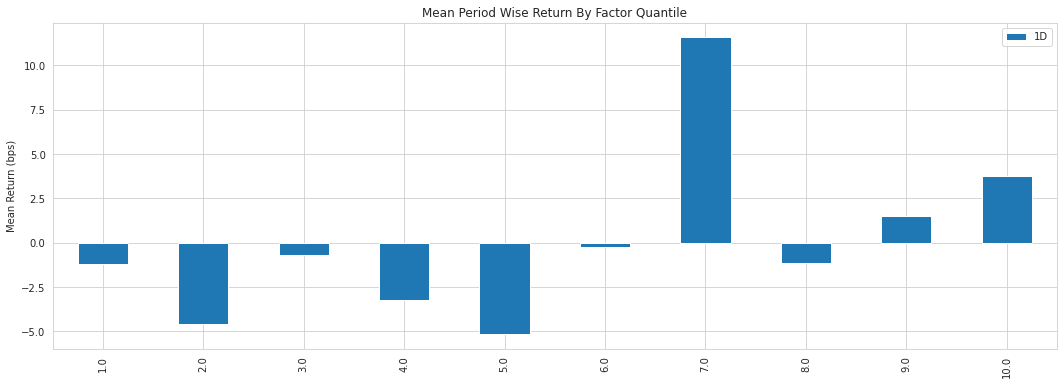

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

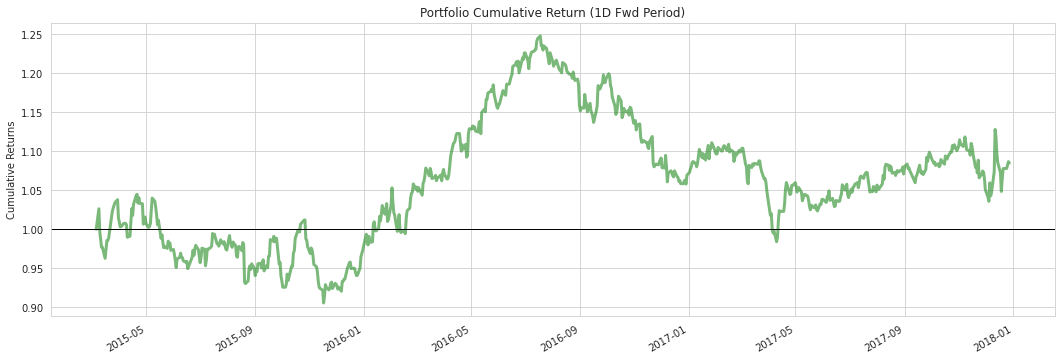

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

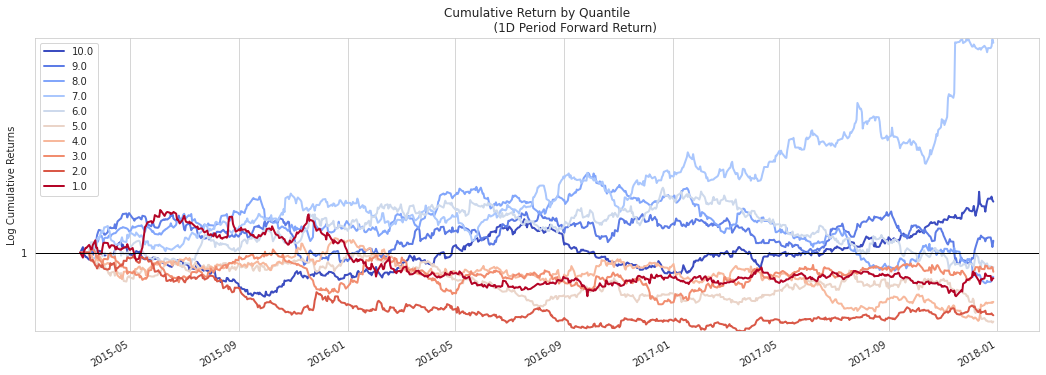

In [102]:
plotFactorQuantileBars(macd_factor_data)

plotCumulativeReturns(macd_factor_data[macd_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumelativeReturns(macd_factor_data)

In [103]:
train = pd.concat([macd_factor_data['factor_quantile'], target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

factor_quantile
date       asset                    
2015-03-06 PIK.JO                5.0
           QFH.JO                1.0
           SOL.JO               10.0
2015-03-09 PIK.JO               10.0
           QFH.JO                1.0
...                              ...
2017-12-27 SYGWD.JO              8.0
           TON.JO                2.0
           TRU.JO                2.0
           TWR.JO                6.0
           WBO.JO                2.0

[40745 rows x 1 columns]

In [104]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV

In [105]:
def checkCV(X, cv):
    ts = TimeSeriesSplit(n_splits = cv)
    for i, (train_index, test_index) in enumerate(ts.split(X.unstack())):

        print(f"Fold {i + 1} -------------------------------------------------------")
        print(f"Train: Length = {len(X.unstack().iloc[train_index, ].index)}")
        print(f"Start date: {X.unstack().iloc[train_index, ].index[0].date()}")
        print(f"End date: {X.unstack().iloc[train_index, ].index[-1].date()} \n")

        print(f"Test: Length =  {len(X.unstack().iloc[test_index, ].index)}")
        print(f"Start date: {X.unstack().iloc[test_index, ].index[0].date()}")
        print(f"End date: {X.unstack().iloc[test_index, ].index[-1].date()}")
        print(f"----------------------------------------------------------------")

In [106]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 46
Start date: 2015-03-06
End date: 2015-05-18 

Test: Length =  33
Start date: 2015-05-19
End date: 2015-07-03
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 79
Start date: 2015-03-06
End date: 2015-07-03 

Test: Length =  33
Start date: 2015-07-06
End date: 2015-08-20
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 112
Start date: 2015-03-06
End date: 2015-08-20 

Test: Length =  33
Start date: 2015-08-21
End date: 2015-10-07
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 145
Start date: 2015-03-06
End date: 2015-10-07 

Test: Length =  33
Start date: 2015-10-08
End date: 2015-11-23
---------------------------------------

In [107]:
def modelFit(clf, X, y, cv, max_train_size):

    predictions = pd.DataFrame()
    probabilities = pd.DataFrame()
    ts = TimeSeriesSplit(n_splits = cv, max_train_size=max_train_size) # 
    for train_index, test_index in ts.split(X.unstack()):

        
        train_X = X.unstack().iloc[train_index, ].stack()
        train_y = y.unstack().iloc[train_index].stack()

        test_X = X.unstack().iloc[test_index, ].stack()
        test_y = y.unstack().iloc[test_index].stack()
        
        if len(train_X.unstack()) >= max_train_size:
            model = clf
            model.fit(
                train_X, 
                train_y)

            cal_model = CalibratedClassifierCV(model, cv = 'prefit')
            cal_model.fit(train_X, train_y)

            probs = pd.DataFrame(
                cal_model.predict_proba(test_X), 
                columns = cal_model.classes_, 
                index = test_X.index)

            probabilities = pd.concat(
                [probabilities, probs])

            preds = pd.DataFrame(
                model.predict(test_X), 
                columns = ['predictions'], 
                index = test_X.index)
            preds['actual'] = test_y

            predictions = pd.concat(
                [predictions, preds])
    #         print('DONE!!!!!!!!!!!!!!!!!!!!!')
    return predictions, probabilities

In [108]:
# samples = y.value_counts()
# samples

In [109]:
# class_weight = {
#     0: ((samples[0] / samples[0]) * 1), 
#     1: ((samples[0] / samples[1]) * 1), # 2
#     -1: ((samples[0] / samples[-1]) * 1) # 1.7
# }
# class_weight

In [110]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(class_weight = class_weight, random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [111]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.50      0.69      0.58     13679
         1.0       0.49      0.29      0.36     13635

    accuracy                           0.49     27314
   macro avg       0.49      0.49      0.47     27314
weighted avg       0.49      0.49      0.47     27314



In [112]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-02-24 ACT.JO                  1
           ADH.JO                  1
           ADI.JO                  1
           AFE.JO                  1
           AFX.JO                  1
...                              ...
2017-12-27 SYGWD.JO                1
           TON.JO                  3
           TRU.JO                  3
           TWR.JO                  1
           WBO.JO                  3

[27314 rows x 1 columns]

In [113]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-24 ACT.JO    0.490816
           ADH.JO    0.491693
           ADI.JO    0.490816
           AFE.JO    0.489940
           AFX.JO    0.490232
...                       ...
2017-12-27 SYGWD.JO  0.494513
           TON.JO    0.502835
           TRU.JO    0.502835
           TWR.JO    0.497287
           WBO.JO    0.502835

[27314 rows x 1 columns]

In [114]:
# factor = pd.concat([factor, factor_quantile], axis = 1)

In [115]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles=5, max_loss = 0.54)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 54.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-29 ABG.JO     0.003872  0.492569                5
2016-03-02 ABG.JO    -0.013295  0.492569                5
2016-03-04 ABG.JO     0.019405  0.492569                5
2016-03-10 ABG.JO     0.003650  0.492569                5
2016-03-17 ABG.JO     0.038062  0.492569                5
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.493126                1
2017-12-22 STXWDM.JO  0.000000  0.491739                1
2017-12-25 STXWDM.JO -0.014409  0.491739                1
2017-12-26 STXWDM.JO -0.014620  0.491739                1
2017-12-27 STXWDM.JO  0.002967  0.494513                2

[31207 rows x 3 columns]

In [116]:
InformationTable(clf_factor_data)

Information Analysis


1D
IC Mean           0.001
IC Std.           0.146
Risk-Adjusted IC  0.006
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

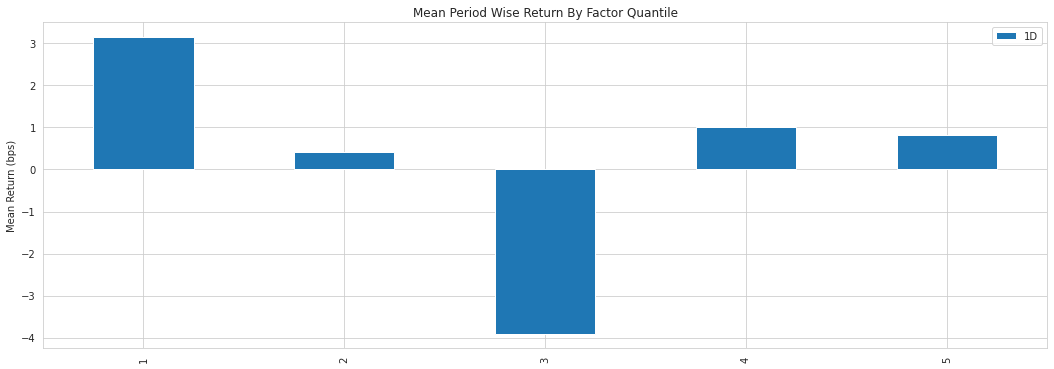

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

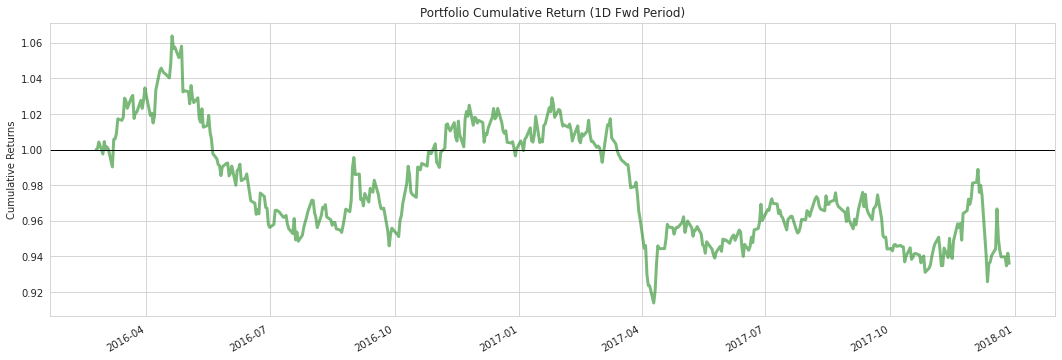

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

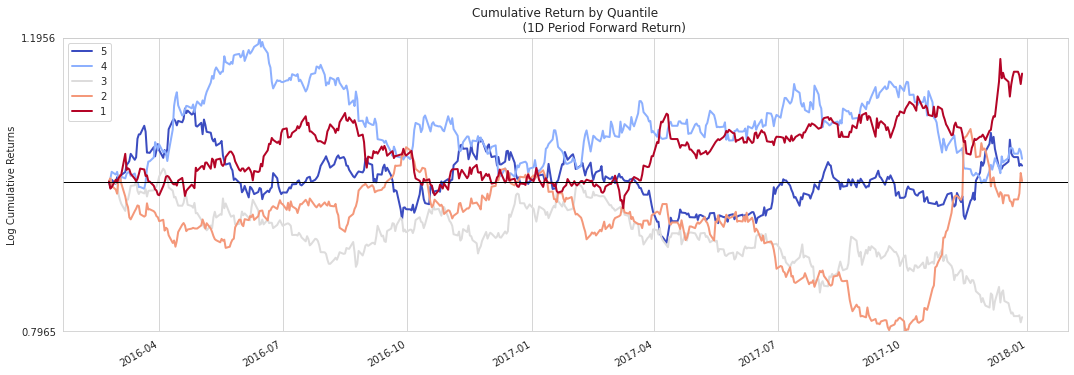

In [117]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(clf_factor_data)

In [118]:
volume_osc_data = getIndicator(
    cusumTrainPrices, 
    getVolumeOsc, periods = 10, 
    trailing_volume_n = trailing_volume_window)

In [119]:
volume_factor_data = getCleanFactor(volume_osc_data, forward_returns, quantiles = 4)
volume_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        factor  factor_quantile
date       asset                                             
2015-03-23 ABG.JO     0.037424  1.744706e+06              3.0
2015-03-24 ABG.JO    -0.015684  1.614200e+06              4.0
2015-04-01 ABG.JO    -0.001369  1.560313e+06              4.0
2015-04-08 ABG.JO    -0.011028  1.584343e+06              3.0
2015-04-13 ABG.JO     0.007735  1.581629e+06              3.0
...                        ...           ...              ...
2017-12-19 STXWDM.JO -0.001445  8.650369e+04              1.0
2017-12-22 STXWDM.JO  0.000000  7.198975e+04              1.0
2017-12-25 STXWDM.JO -0.014409  7.198975e+04              1.0
2017-12-26 STXWDM.JO -0.014620  7.198975e+04              1.0
2017-12-27 STXWDM.JO  0.002967  6.972834e+04              1.0

[46092 rows x 3 columns]

In [120]:
# macd_factor_data.drop('group', axis = 1, inplace = True)

In [121]:
macd_factor_data = addGroupingFactor(macd_factor_data, volume_factor_data)
macd_factor_data

1D      factor  factor_quantile  group
date       asset                                                  
2015-03-23 ABG.JO     0.037424   94.695457              9.0    3.0
2015-03-24 ABG.JO    -0.015684    2.265110              3.0    4.0
2015-04-01 ABG.JO    -0.001369  -74.321934              1.0    4.0
2015-04-08 ABG.JO    -0.011028 -144.775936              1.0    3.0
2015-04-13 ABG.JO     0.007735  -44.359610              3.0    3.0
...                        ...         ...              ...    ...
2017-12-19 STXWDM.JO -0.001445   34.407036              9.0    1.0
2017-12-22 STXWDM.JO  0.000000   28.835921             10.0    1.0
2017-12-25 STXWDM.JO -0.014409   28.835921             10.0    1.0
2017-12-26 STXWDM.JO -0.014620   28.835921              9.0    1.0
2017-12-27 STXWDM.JO  0.002967   31.148791              8.0    1.0

[46092 rows x 4 columns]

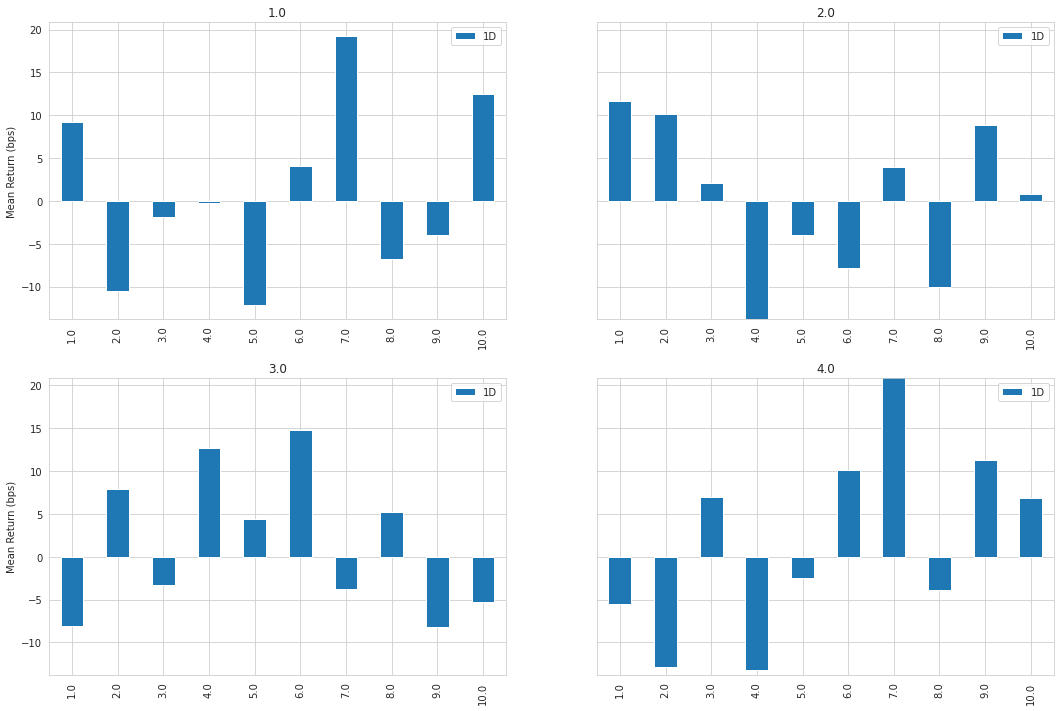

In [122]:
plotFactorQuantileBars(macd_factor_data, by_group = True, group_adjust = False)

In [123]:
# volume_groups = getGroupingIndicator(factor = volume_factor_data[['factor']], forward_returns = forward_returns, num_groups = 5)
# volume_groups

In [124]:
train = pd.concat([macd_factor_data['factor_quantile'], volume_factor_data['factor_quantile'],
                   target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

factor_quantile  group
date       asset                           
2015-03-06 PIK.JO                5.0    1.0
           QFH.JO                1.0    2.0
           SOL.JO               10.0    4.0
2015-03-09 PIK.JO               10.0    1.0
           QFH.JO                1.0    4.0
...                              ...    ...
2017-12-27 SYGWD.JO              8.0    2.0
           TON.JO                2.0    2.0
           TRU.JO                2.0    4.0
           TWR.JO                6.0    1.0
           WBO.JO                2.0    1.0

[40745 rows x 2 columns]

In [125]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 46
Start date: 2015-03-06
End date: 2015-05-18 

Test: Length =  33
Start date: 2015-05-19
End date: 2015-07-03
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 79
Start date: 2015-03-06
End date: 2015-07-03 

Test: Length =  33
Start date: 2015-07-06
End date: 2015-08-20
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 112
Start date: 2015-03-06
End date: 2015-08-20 

Test: Length =  33
Start date: 2015-08-21
End date: 2015-10-07
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 145
Start date: 2015-03-06
End date: 2015-10-07 

Test: Length =  33
Start date: 2015-10-08
End date: 2015-11-23
---------------------------------------

In [126]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [127]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.49      0.61      0.55     13679
         1.0       0.49      0.37      0.42     13635

    accuracy                           0.49     27314
   macro avg       0.49      0.49      0.48     27314
weighted avg       0.49      0.49      0.48     27314



In [128]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-02-24 ACT.JO                  1
           ADH.JO                  1
           ADI.JO                  1
           AFE.JO                  1
           AFX.JO                  1
...                              ...
2017-12-27 SYGWD.JO                1
           TON.JO                  3
           TRU.JO                  3
           TWR.JO                  1
           WBO.JO                  3

[27314 rows x 1 columns]

In [129]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-24 ACT.JO    0.489794
           ADH.JO    0.492576
           ADI.JO    0.487950
           AFE.JO    0.488858
           AFX.JO    0.487326
...                       ...
2017-12-27 SYGWD.JO  0.494391
           TON.JO    0.502701
           TRU.JO    0.503161
           TWR.JO    0.496931
           WBO.JO    0.502472

[27314 rows x 1 columns]

In [130]:
# factor = pd.concat([factor, factor_quantile], axis = 1)

In [131]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5, max_loss = 0.45)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 45.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-29 ABG.JO     0.003872  0.495358                5
2016-03-02 ABG.JO    -0.013295  0.495358                5
2016-03-04 ABG.JO     0.019405  0.495358                5
2016-03-10 ABG.JO     0.003650  0.495358                5
2016-03-17 ABG.JO     0.038062  0.495358                5
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.492777                1
2017-12-22 STXWDM.JO  0.000000  0.491392                1
2017-12-25 STXWDM.JO -0.014409  0.491392                1
2017-12-26 STXWDM.JO -0.014620  0.491392                1
2017-12-27 STXWDM.JO  0.002967  0.494162                2

[31207 rows x 3 columns]

In [132]:
InformationTable(clf_factor_data)

Information Analysis


1D
IC Mean          -0.004
IC Std.           0.168
Risk-Adjusted IC -0.023
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

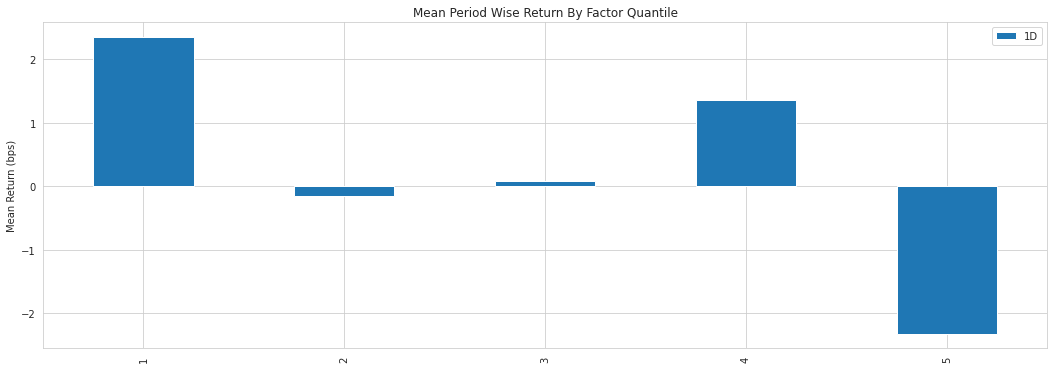

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

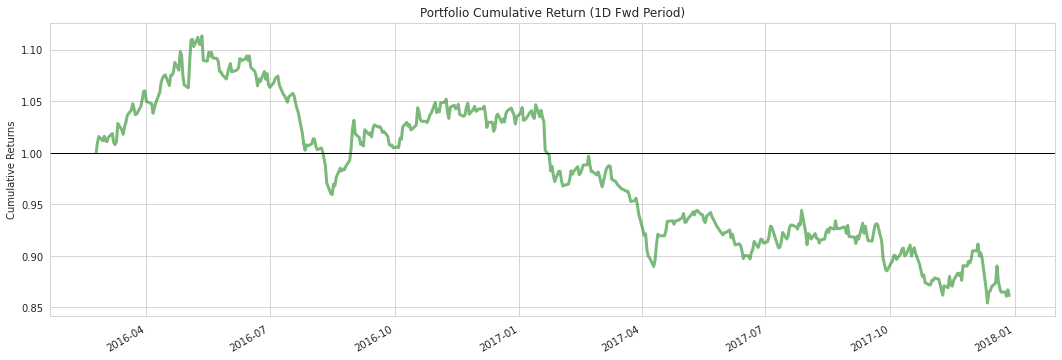

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

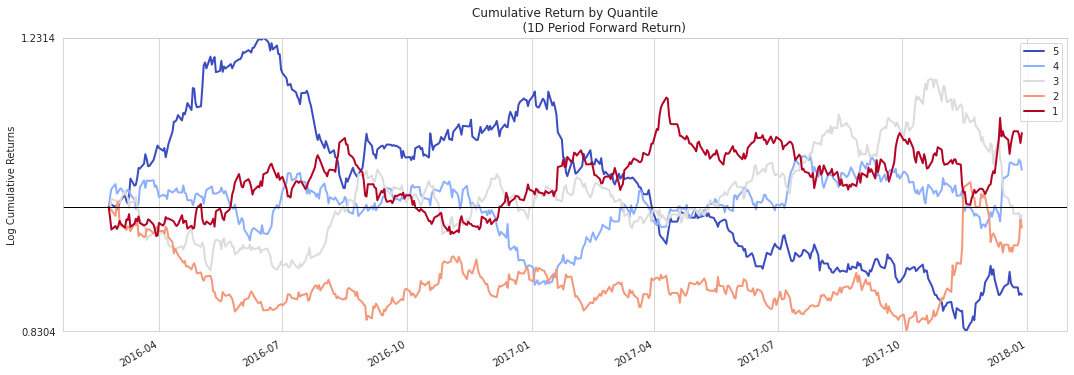

In [133]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(clf_factor_data)

### Bollinger Bands and Money Flow

In [134]:
bbands_data = getIndicator(
    cusumTrainPrices,
    bbands, n = 5, ndev = 2,
    trailing_volume_n = trailing_volume_window)
bbands_data = bbands_data.unstack().asfreq('C').stack()
bbands_data

bbihband  bbilband  bbipband   bbiwband
date       symbol                                         
2015-03-03 PIK.JO       0.0       0.0  0.129272  17.028094
2015-03-06 PIK.JO       0.0       0.0  0.400633  16.930033
           QFH.JO       0.0       0.0  0.749940  17.501436
           SOL.JO       0.0       0.0  0.168393  12.905626
2015-03-09 PIK.JO       0.0       0.0  0.257916  13.126290
...                     ...       ...       ...        ...
2017-12-29 TDH.JO       0.0       0.0  0.814607  14.939032
           TKG.JO       0.0       0.0  0.759783   6.579545
           TRU.JO       0.0       0.0  0.721479  13.696737
           VOD.JO       0.0       0.0  0.547989   6.575955
           ZED.JO       0.0       0.0  0.839356  19.487208

[35569 rows x 4 columns]

In [135]:
bbands_factor_data = getCleanFactor(bbands_data[['bbipband']], forward_returns, quantiles = 10)
bbands_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2015-03-23 ABG.JO     0.037424  0.350940              5.0
2015-03-24 ABG.JO    -0.015684  0.881866              7.0
2015-04-01 ABG.JO    -0.001369  0.861980             10.0
2015-04-08 ABG.JO    -0.011028  0.867104              8.0
2015-04-13 ABG.JO     0.007735  0.383674              4.0
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.099142              1.0
2017-12-22 STXWDM.JO  0.000000  0.291184              2.0
2017-12-25 STXWDM.JO -0.014409  0.291184              2.0
2017-12-26 STXWDM.JO -0.014620  0.291184              3.0
2017-12-27 STXWDM.JO  0.002967  0.139673              2.0

[46092 rows x 3 columns]

In [136]:
InformationTable(bbands_factor_data)

Information Analysis


1D
IC Mean          -0.000
IC Std.           0.187
Risk-Adjusted IC -0.001
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

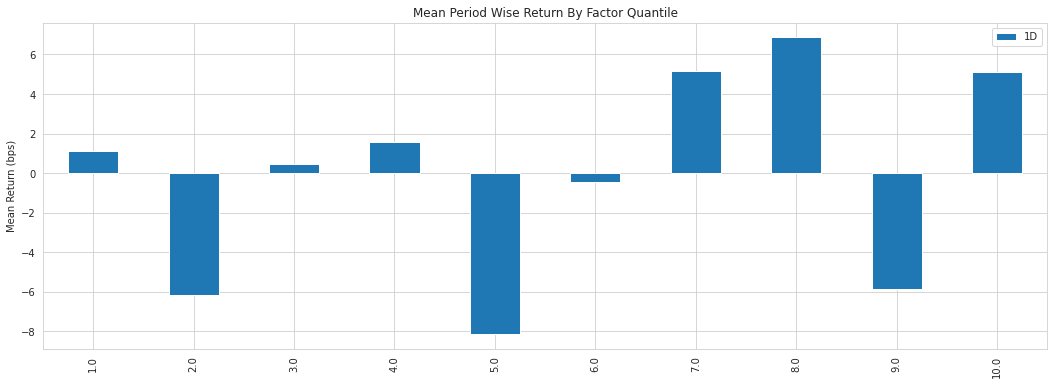

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

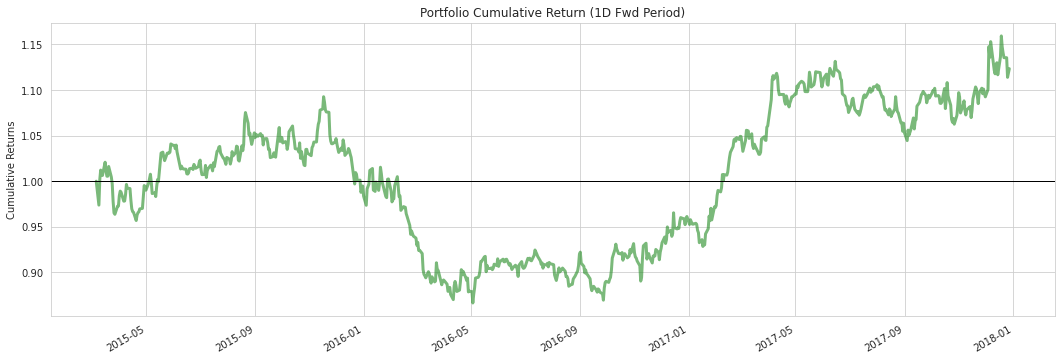

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

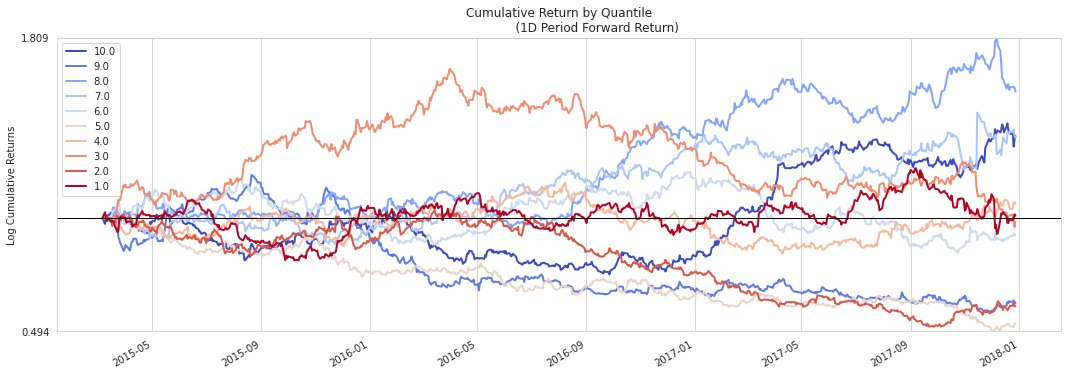

In [137]:
plotFactorQuantileBars(bbands_factor_data)

plotCumulativeReturns(bbands_factor_data[bbands_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumelativeReturns(bbands_factor_data)

In [138]:
mfi_data = getIndicator(
    cusumTrainPrices, 
    mfi, 
    trailing_volume_n = trailing_volume_window, 
    n = 5)
mfi_data

mfi
date       symbol            
2015-03-23 ABG.JO   34.229126
2015-03-24 ABG.JO   54.164385
2015-04-01 ABG.JO   71.966224
2015-04-08 ABG.JO   85.657461
2015-04-13 ABG.JO   59.503503
...                       ...
2017-12-04 ZPLP.JO  22.592269
2017-12-07 ZPLP.JO  28.651577
2017-12-14 ZPLP.JO  25.303371
2017-12-15 ZPLP.JO  29.332736
2017-12-20 ZPLP.JO  29.094576

[35569 rows x 1 columns]

In [139]:
mfi_factor_data = getCleanFactor(mfi_data, forward_returns, quantiles = 2)
mfi_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                          
2015-03-23 ABG.JO     0.037424  34.229126              2.0
2015-03-24 ABG.JO    -0.015684  54.164385              2.0
2015-04-01 ABG.JO    -0.001369  71.966224              2.0
2015-04-08 ABG.JO    -0.011028  85.657461              2.0
2015-04-13 ABG.JO     0.007735  59.503503              1.0
...                        ...        ...              ...
2017-12-19 STXWDM.JO -0.001445  27.893679              1.0
2017-12-22 STXWDM.JO  0.000000   1.637988              1.0
2017-12-25 STXWDM.JO -0.014409   1.637988              1.0
2017-12-26 STXWDM.JO -0.014620   1.637988              1.0
2017-12-27 STXWDM.JO  0.002967   1.921813              1.0

[46092 rows x 3 columns]

In [140]:
# bbands_factor_data.drop('group', axis = 1, inplace = True)

In [141]:
bbands_factor_data = addGroupingFactor(bbands_factor_data, mfi_factor_data)
bbands_factor_data

1D    factor  factor_quantile  group
date       asset                                                
2015-03-23 ABG.JO     0.037424  0.350940              5.0    2.0
2015-03-24 ABG.JO    -0.015684  0.881866              7.0    2.0
2015-04-01 ABG.JO    -0.001369  0.861980             10.0    2.0
2015-04-08 ABG.JO    -0.011028  0.867104              8.0    2.0
2015-04-13 ABG.JO     0.007735  0.383674              4.0    1.0
...                        ...       ...              ...    ...
2017-12-19 STXWDM.JO -0.001445  0.099142              1.0    1.0
2017-12-22 STXWDM.JO  0.000000  0.291184              2.0    1.0
2017-12-25 STXWDM.JO -0.014409  0.291184              2.0    1.0
2017-12-26 STXWDM.JO -0.014620  0.291184              3.0    1.0
2017-12-27 STXWDM.JO  0.002967  0.139673              2.0    1.0

[46092 rows x 4 columns]

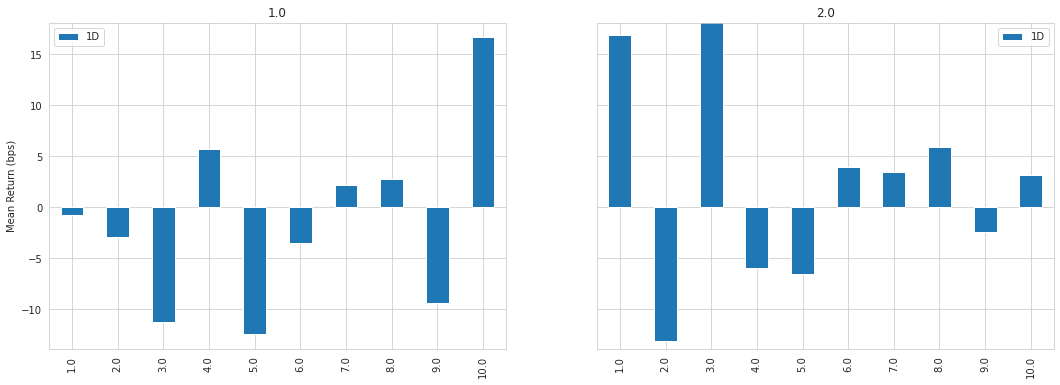

In [142]:
plotFactorQuantileBars(bbands_factor_data, by_group = True)

In [986]:
# mfi_groups = getGroupingIndicator(factor = mfi_factor_data[['factor']], forward_returns = forward_returns, num_groups = 4)
# mfi_groups

In [143]:
train = pd.concat([bbands_factor_data['factor_quantile'], mfi_factor_data['factor_quantile'],
                   target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']
X

factor_quantile  group
date       asset                           
2015-03-06 PIK.JO                5.0    1.0
           QFH.JO               10.0    2.0
           SOL.JO                1.0    1.0
2015-03-09 PIK.JO                1.0    1.0
           QFH.JO               10.0    2.0
...                              ...    ...
2017-12-27 SYGWD.JO              2.0    1.0
           TON.JO                8.0    2.0
           TRU.JO                6.0    2.0
           TWR.JO                7.0    1.0
           WBO.JO                4.0    2.0

[40745 rows x 2 columns]

In [144]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 46
Start date: 2015-03-06
End date: 2015-05-18 

Test: Length =  33
Start date: 2015-05-19
End date: 2015-07-03
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 79
Start date: 2015-03-06
End date: 2015-07-03 

Test: Length =  33
Start date: 2015-07-06
End date: 2015-08-20
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 112
Start date: 2015-03-06
End date: 2015-08-20 

Test: Length =  33
Start date: 2015-08-21
End date: 2015-10-07
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 145
Start date: 2015-03-06
End date: 2015-10-07 

Test: Length =  33
Start date: 2015-10-08
End date: 2015-11-23
---------------------------------------

In [145]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(class_weight = class_weight, random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size=240)

In [146]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.50      0.57      0.53     13679
         1.0       0.49      0.41      0.45     13635

    accuracy                           0.49     27314
   macro avg       0.49      0.49      0.49     27314
weighted avg       0.49      0.49      0.49     27314



In [147]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-02-24 ACT.JO                  3
           ADH.JO                  3
           ADI.JO                  1
           AFE.JO                  3
           AFX.JO                  1
...                              ...
2017-12-27 SYGWD.JO                3
           TON.JO                  1
           TRU.JO                  1
           TWR.JO                  1
           WBO.JO                  1

[27314 rows x 1 columns]

In [148]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-24 ACT.JO    0.500645
           ADH.JO    0.509586
           ADI.JO    0.496040
           AFE.JO    0.509855
           AFX.JO    0.496040
...                       ...
2017-12-27 SYGWD.JO  0.502048
           TON.JO    0.494523
           TRU.JO    0.495688
           TWR.JO    0.499134
           WBO.JO    0.496854

[27314 rows x 1 columns]

In [149]:
# factor = pd.concat([factor, factor_quantile], axis = 1)

In [151]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles=5)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-29 ABG.JO     0.003872  0.472771                1
2016-03-02 ABG.JO    -0.013295  0.477365                1
2016-03-04 ABG.JO     0.019405  0.477365                1
2016-03-10 ABG.JO     0.003650  0.472771                1
2016-03-17 ABG.JO     0.038062  0.504981                4
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.502631                5
2017-12-22 STXWDM.JO  0.000000  0.502048                5
2017-12-25 STXWDM.JO -0.014409  0.502048                5
2017-12-26 STXWDM.JO -0.014620  0.502048                5
2017-12-27 STXWDM.JO  0.002967  0.502048                5

[31207 rows x 3 columns]

In [152]:
InformationTable(clf_factor_data)

Information Analysis


1D
IC Mean          -0.010
IC Std.           0.159
Risk-Adjusted IC -0.061
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

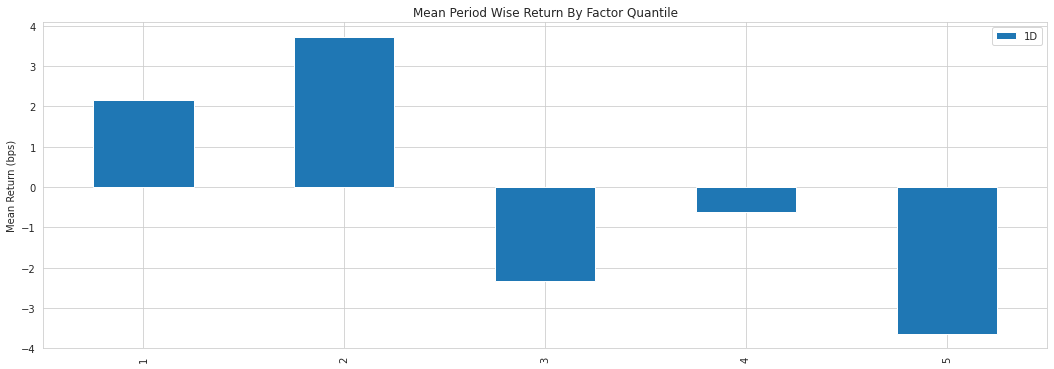

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

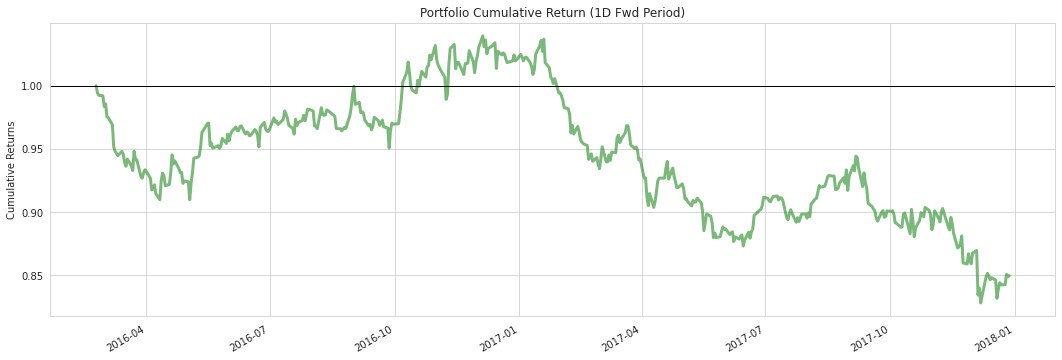

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

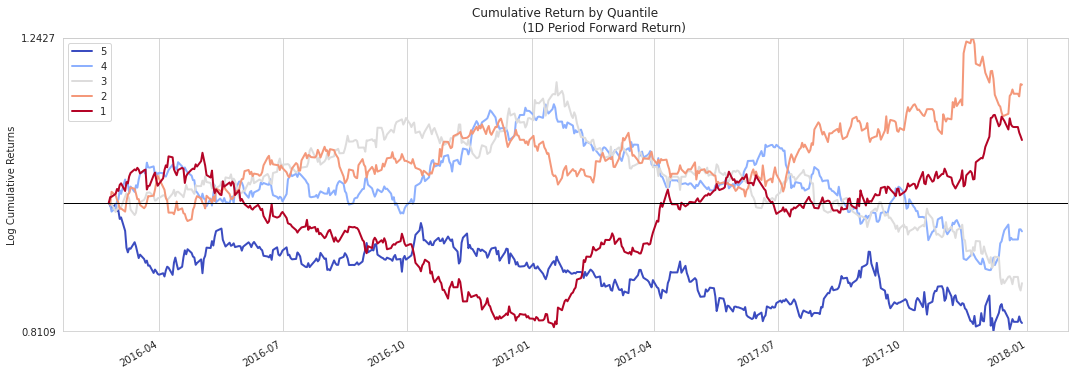

In [153]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(clf_factor_data)

In [154]:
bbands_iw_factor_data = getCleanFactor(bbands_data[['bbiwband']], forward_returns, quantiles = 10)
bbands_iw_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                          
2015-03-23 ABG.JO     0.037424   5.263304              1.0
2015-03-24 ABG.JO    -0.015684   7.520767              4.0
2015-04-01 ABG.JO    -0.001369   9.297511              4.0
2015-04-08 ABG.JO    -0.011028  11.143561              7.0
2015-04-13 ABG.JO     0.007735  11.084301              6.0
...                        ...        ...              ...
2017-12-19 STXWDM.JO -0.001445   8.541880              2.0
2017-12-22 STXWDM.JO  0.000000   7.659213              2.0
2017-12-25 STXWDM.JO -0.014409   7.659213              2.0
2017-12-26 STXWDM.JO -0.014620   7.659213              2.0
2017-12-27 STXWDM.JO  0.002967   7.564961              2.0

[46092 rows x 3 columns]

In [155]:
train = pd.concat([bbands_factor_data['factor_quantile'], bbands_iw_factor_data['factor_quantile'],
                   mfi_factor_data['factor_quantile'],
                   target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
X.columns = ['bbipband', 'bbiwband', 'mfi']
y = train['label']
X

bbipband  bbiwband  mfi
date       asset                            
2015-03-06 PIK.JO         5.0       5.0  1.0
           QFH.JO        10.0      10.0  2.0
           SOL.JO         1.0       1.0  1.0
2015-03-09 PIK.JO         1.0      10.0  1.0
           QFH.JO        10.0       1.0  2.0
...                       ...       ...  ...
2017-12-27 SYGWD.JO       2.0       2.0  1.0
           TON.JO         8.0       4.0  2.0
           TRU.JO         6.0       8.0  2.0
           TWR.JO         7.0       1.0  1.0
           WBO.JO         4.0       2.0  2.0

[40745 rows x 3 columns]

In [156]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 46
Start date: 2015-03-06
End date: 2015-05-18 

Test: Length =  33
Start date: 2015-05-19
End date: 2015-07-03
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 79
Start date: 2015-03-06
End date: 2015-07-03 

Test: Length =  33
Start date: 2015-07-06
End date: 2015-08-20
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 112
Start date: 2015-03-06
End date: 2015-08-20 

Test: Length =  33
Start date: 2015-08-21
End date: 2015-10-07
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 145
Start date: 2015-03-06
End date: 2015-10-07 

Test: Length =  33
Start date: 2015-10-08
End date: 2015-11-23
---------------------------------------

In [157]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [158]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.50      0.58      0.53     13679
         1.0       0.49      0.41      0.45     13635

    accuracy                           0.49     27314
   macro avg       0.49      0.49      0.49     27314
weighted avg       0.49      0.49      0.49     27314



In [159]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-02-24 ACT.JO                  3
           ADH.JO                  3
           ADI.JO                  1
           AFE.JO                  3
           AFX.JO                  1
...                              ...
2017-12-27 SYGWD.JO                1
           TON.JO                  1
           TRU.JO                  1
           TWR.JO                  1
           WBO.JO                  1

[27314 rows x 1 columns]

In [160]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-24 ACT.JO    0.505605
           ADH.JO    0.516370
           ADI.JO    0.498059
           AFE.JO    0.506133
           AFX.JO    0.490778
...                       ...
2017-12-27 SYGWD.JO  0.499178
           TON.JO    0.493383
           TRU.JO    0.497923
           TWR.JO    0.495404
           WBO.JO    0.494045

[27314 rows x 1 columns]

In [161]:
# factor = pd.concat([factor, factor_quantile], axis = 1)

In [162]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-29 ABG.JO     0.003872  0.469155                1
2016-03-02 ABG.JO    -0.013295  0.473773                1
2016-03-04 ABG.JO     0.019405  0.476678                1
2016-03-10 ABG.JO     0.003650  0.473509                1
2016-03-17 ABG.JO     0.038062  0.505917                5
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.499765                4
2017-12-22 STXWDM.JO  0.000000  0.499178                3
2017-12-25 STXWDM.JO -0.014409  0.499178                3
2017-12-26 STXWDM.JO -0.014620  0.499178                3
2017-12-27 STXWDM.JO  0.002967  0.499178                3

[31207 rows x 3 columns]

In [163]:
InformationTable(clf_factor_data)

Information Analysis


1D
IC Mean          -0.007
IC Std.           0.152
Risk-Adjusted IC -0.045
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

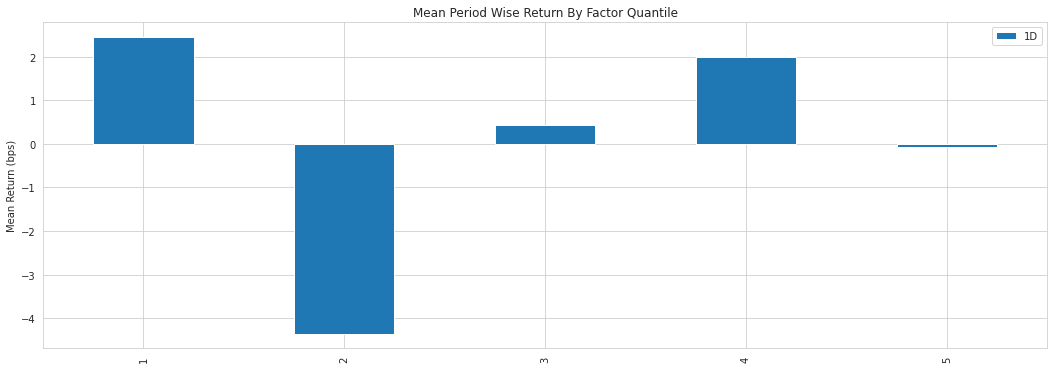

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

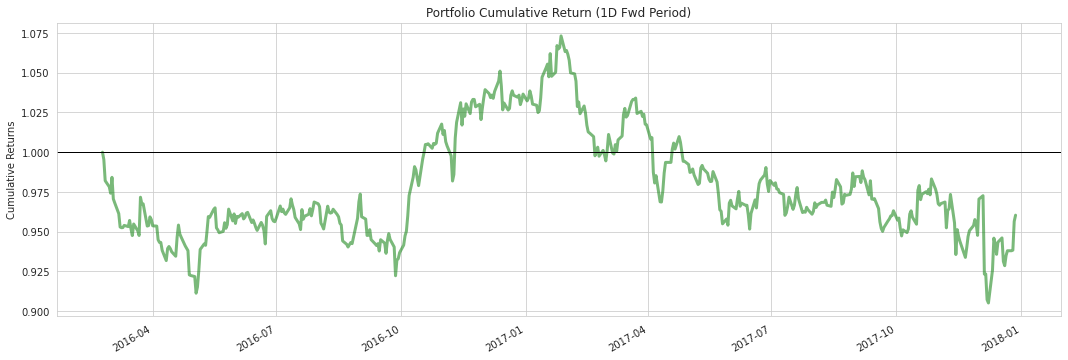

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

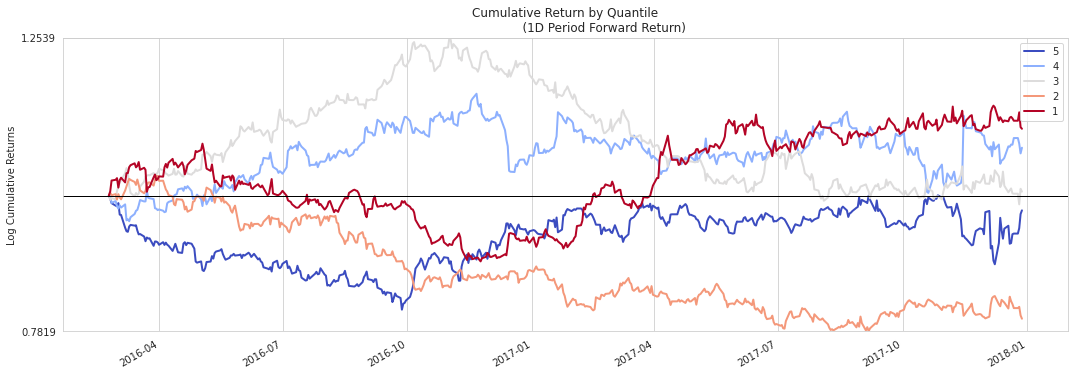

In [164]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(clf_factor_data)

### MACD & BBANDS

In [165]:
# volume_groups.name = 'volume_group'
# mfi_groups.name = 'mfi_group'

train = pd.concat([macd_factor_data['factor_quantile'], volume_factor_data['factor_quantile'], 
                   bbands_factor_data['factor_quantile'], bbands_iw_factor_data['factor_quantile'],
                   mfi_factor_data['factor_quantile'],
                   target[['label']]], axis = 1).dropna()
X = train.iloc[:, :-1]
X.columns = ['macd', 'volume', 'bbipband', 'bbiwband', 'mfi']
y = train['label']
X

macd  volume  bbipband  bbiwband  mfi
date       asset                                          
2015-03-06 PIK.JO     5.0     1.0       5.0       5.0  1.0
           QFH.JO     1.0     2.0      10.0      10.0  2.0
           SOL.JO    10.0     4.0       1.0       1.0  1.0
2015-03-09 PIK.JO    10.0     1.0       1.0      10.0  1.0
           QFH.JO     1.0     4.0      10.0       1.0  2.0
...                   ...     ...       ...       ...  ...
2017-12-27 SYGWD.JO   8.0     2.0       2.0       2.0  1.0
           TON.JO     2.0     2.0       8.0       4.0  2.0
           TRU.JO     2.0     4.0       6.0       8.0  2.0
           TWR.JO     6.0     1.0       7.0       1.0  1.0
           WBO.JO     2.0     1.0       4.0       2.0  2.0

[40745 rows x 5 columns]

In [166]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 46
Start date: 2015-03-06
End date: 2015-05-18 

Test: Length =  33
Start date: 2015-05-19
End date: 2015-07-03
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 79
Start date: 2015-03-06
End date: 2015-07-03 

Test: Length =  33
Start date: 2015-07-06
End date: 2015-08-20
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 112
Start date: 2015-03-06
End date: 2015-08-20 

Test: Length =  33
Start date: 2015-08-21
End date: 2015-10-07
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 145
Start date: 2015-03-06
End date: 2015-10-07 

Test: Length =  33
Start date: 2015-10-08
End date: 2015-11-23
---------------------------------------

In [167]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [168]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.50      0.57      0.53     13679
         1.0       0.49      0.43      0.46     13635

    accuracy                           0.50     27314
   macro avg       0.50      0.50      0.49     27314
weighted avg       0.50      0.50      0.49     27314



In [169]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-02-24 ACT.JO                  3
           ADH.JO                  3
           ADI.JO                  1
           AFE.JO                  1
           AFX.JO                  1
...                              ...
2017-12-27 SYGWD.JO                1
           TON.JO                  1
           TRU.JO                  3
           TWR.JO                  1
           WBO.JO                  3

[27314 rows x 1 columns]

In [170]:
probs = probabilities.loc[:, 1]
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-24 ACT.JO    0.506054
           ADH.JO    0.527295
           ADI.JO    0.493915
           AFE.JO    0.497962
           AFX.JO    0.478477
...                       ...
2017-12-27 SYGWD.JO  0.499399
           TON.JO    0.498405
           TRU.JO    0.506621
           TWR.JO    0.493463
           WBO.JO    0.506382

[27314 rows x 1 columns]

In [171]:
# factor = pd.concat([factor, factor_quantile], axis = 1)

In [172]:
clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-29 ABG.JO     0.003872  0.479458                2
2016-03-02 ABG.JO    -0.013295  0.485816                3
2016-03-04 ABG.JO     0.019405  0.488954                3
2016-03-10 ABG.JO     0.003650  0.484162                2
2016-03-17 ABG.JO     0.038062  0.528682                5
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.498264                3
2017-12-22 STXWDM.JO  0.000000  0.492339                2
2017-12-25 STXWDM.JO -0.014409  0.492339                2
2017-12-26 STXWDM.JO -0.014620  0.492339                2
2017-12-27 STXWDM.JO  0.002967  0.499355                4

[31207 rows x 3 columns]

In [173]:
InformationTable(clf_factor_data)

Information Analysis


1D
IC Mean          -0.006
IC Std.           0.151
Risk-Adjusted IC -0.040
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

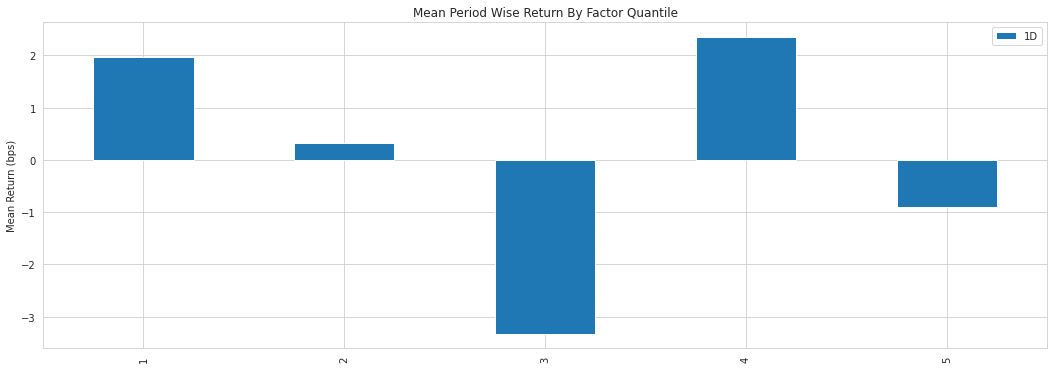

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

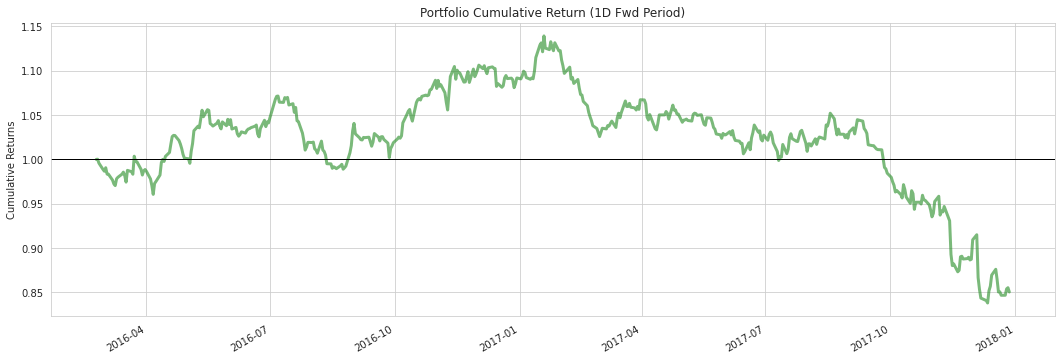

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

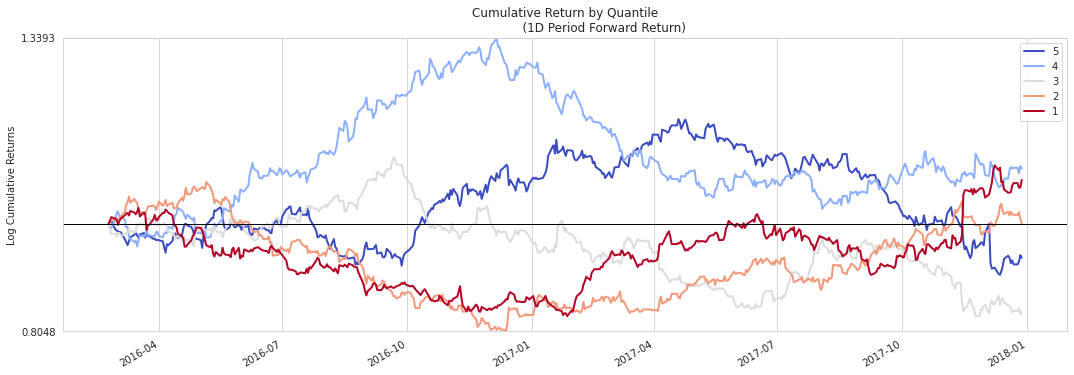

In [174]:
plotFactorQuantileBars(clf_factor_data)

plotCumulativeReturns(clf_factor_data[clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(clf_factor_data)

### MACD & Stochastic Oscillator

In [1021]:
so_data = getIndicator(
    cusumTrainPrices,
    stochOscillator,
    trailing_volume_n = trailing_volume_window)
so_data = so_data.unstack().asfreq('C').stack()
so_data

fast_stoch_osc
date       symbol                
2015-03-03 PIK.JO       17.267475
2015-03-06 PIK.JO      -15.061948
           QFH.JO       -7.111111
           SOL.JO       17.291474
2015-03-09 PIK.JO        7.172354
...                           ...
2017-12-29 TDH.JO       -7.606592
           TKG.JO      -10.115265
           TRU.JO       -8.786701
           VOD.JO       -8.503191
           ZED.JO       -4.802190

[32767 rows x 1 columns]

In [1022]:
so_factor_data = getCleanFactor(so_data, forward_returns, quantiles = 10)
so_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                          
2015-03-23 ABG.JO     0.037424   6.342016              8.0
2015-03-24 ABG.JO    -0.015684 -12.331697              6.0
2015-04-01 ABG.JO    -0.001369 -17.918711              1.0
2015-04-08 ABG.JO    -0.011028 -24.011294              1.0
2015-04-13 ABG.JO     0.007735  19.131676             10.0
...                        ...        ...              ...
2017-12-19 STXWDM.JO -0.001445   3.785238              8.0
2017-12-22 STXWDM.JO  0.000000  -4.607862              5.0
2017-12-25 STXWDM.JO -0.014409  -4.607862              5.0
2017-12-26 STXWDM.JO -0.014620  -4.607862              5.0
2017-12-27 STXWDM.JO  0.002967   5.327538              9.0

[42762 rows x 3 columns]

In [1023]:
InformationTable(so_factor_data)

Information Analysis


1D
IC Mean          -0.002
IC Std.           0.179
Risk-Adjusted IC -0.011
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

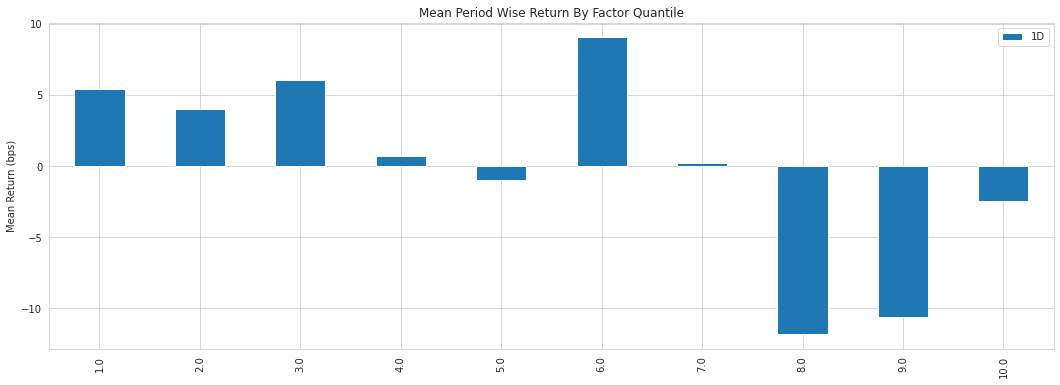

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

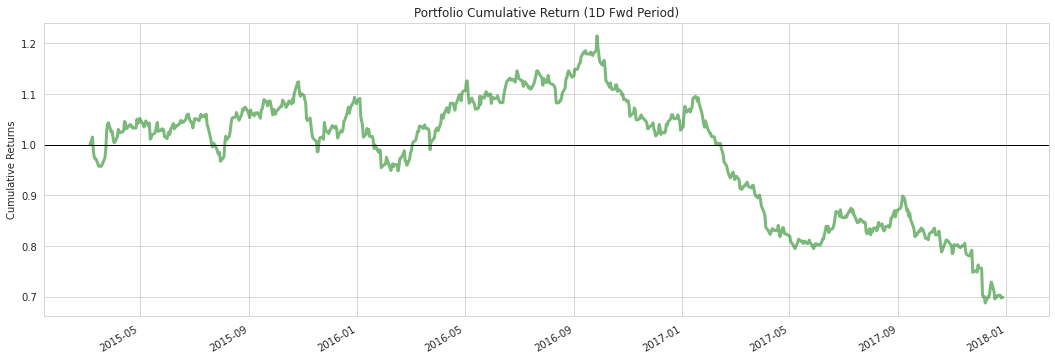

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

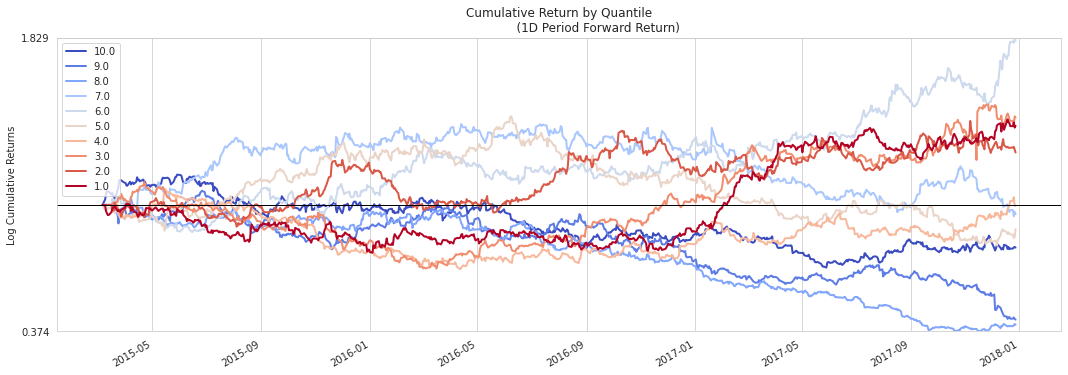

In [1024]:
plotFactorQuantileBars(so_factor_data)

plotCumulativeReturns(rsi_factor_data[so_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumelativeReturns(so_factor_data)

In [1025]:
train = pd.concat([so_factor_data['factor_quantile'], 
                   macd_factor_data['factor_quantile'],
                   target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
X.columns =  ['so', 'macd']
y = train['label']
X

so  macd
date       asset               
2015-03-06 PIK.JO     1.0   5.0
           QFH.JO     5.0   1.0
           SOL.JO    10.0  10.0
2015-03-09 PIK.JO     1.0  10.0
           QFH.JO    10.0   1.0
...                   ...   ...
2017-12-27 SYGJP.JO  10.0   7.0
           SYGUS.JO   8.0   9.0
           TON.JO     4.0   2.0
           TRU.JO     7.0   2.0
           TWR.JO     4.0   6.0

[37778 rows x 2 columns]

In [1026]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 45
Start date: 2015-03-06
End date: 2015-05-15 

Test: Length =  33
Start date: 2015-05-18
End date: 2015-07-02
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 78
Start date: 2015-03-06
End date: 2015-07-02 

Test: Length =  33
Start date: 2015-07-03
End date: 2015-08-19
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 111
Start date: 2015-03-06
End date: 2015-08-19 

Test: Length =  33
Start date: 2015-08-20
End date: 2015-10-06
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 144
Start date: 2015-03-06
End date: 2015-10-06 

Test: Length =  33
Start date: 2015-10-07
End date: 2015-11-20
---------------------------------------

In [1027]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [1028]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-23 ABG.JO    0.493632
           ADR.JO    0.497420
           AFE.JO    0.489651
           AFT.JO    0.491366
           AMS.JO    0.498683
...                       ...
2017-12-27 SYGJP.JO  0.494772
           SYGUS.JO  0.499061
           TON.JO    0.492544
           TRU.JO    0.490228
           TWR.JO    0.498034

[25361 rows x 1 columns]

In [1029]:
so_clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
so_clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-23 ABG.JO     0.000994  0.493632                4
2016-02-29 ABG.JO     0.003872  0.493276                4
2016-03-02 ABG.JO    -0.013295  0.495801                5
2016-03-04 ABG.JO     0.019405  0.494539                4
2016-03-10 ABG.JO     0.003650  0.493276                4
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.499061                4
2017-12-22 STXWDM.JO  0.000000  0.501378                5
2017-12-25 STXWDM.JO -0.014409  0.501378                5
2017-12-26 STXWDM.JO -0.014620  0.501378                5
2017-12-27 STXWDM.JO  0.002967  0.496917                3

[28998 rows x 3 columns]

In [1030]:
InformationTable(so_clf_factor_data)

Information Analysis


1D
IC Mean           0.020
IC Std.           0.141
Risk-Adjusted IC  0.140
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

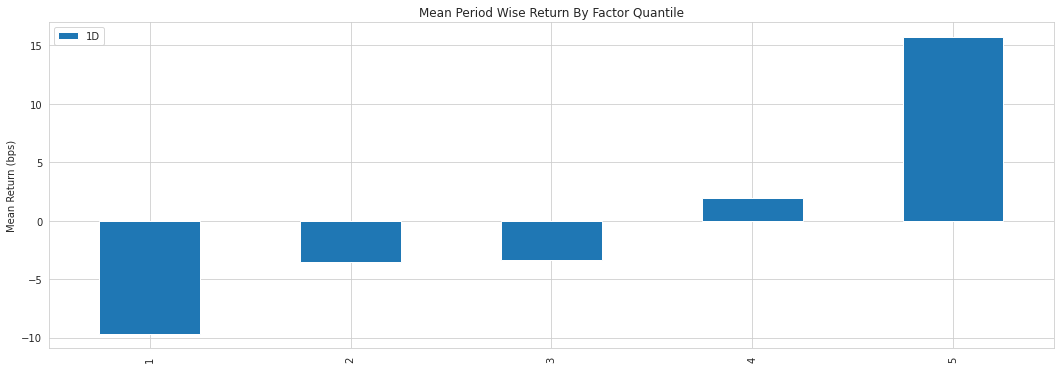

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

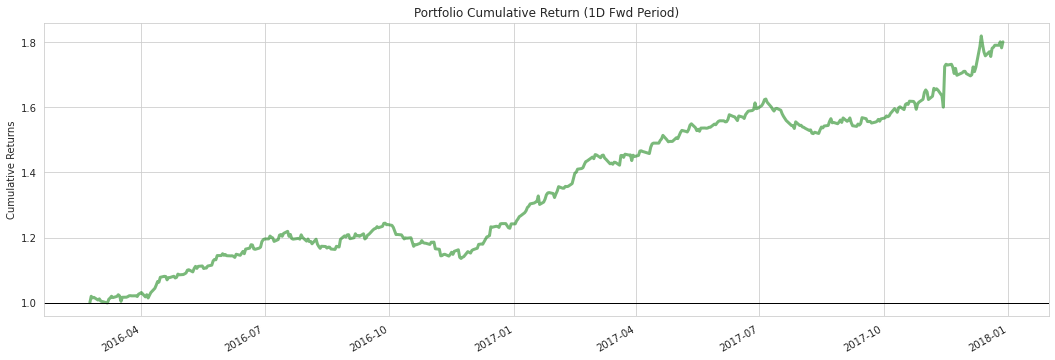

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

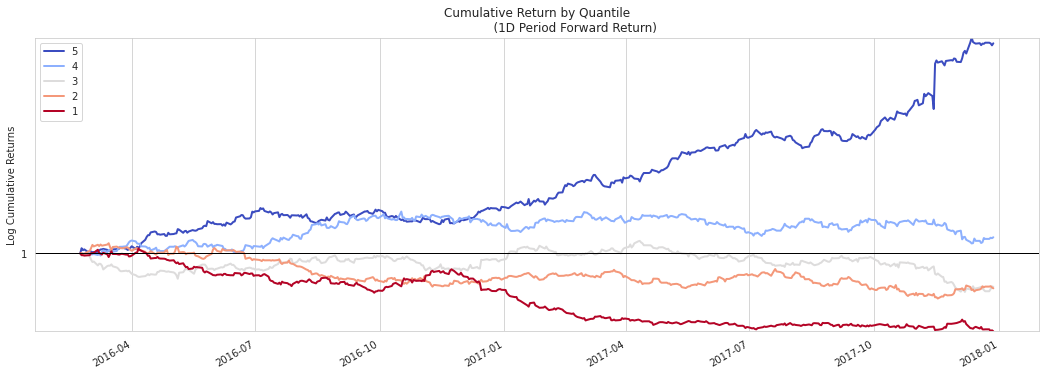

In [1031]:
plotFactorQuantileBars(so_clf_factor_data)

plotCumulativeReturns(so_clf_factor_data[so_clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(so_clf_factor_data)

### ROC Indicator

In [1032]:
roc_data = getIndicator(
    cusumTrainPrices,
    rocIndicator, n = 20,
    trailing_volume_n = trailing_volume_window)
roc_data = roc_data.unstack().asfreq('C').stack() * -1
roc_data

roc
date       symbol           
2015-03-06 PIK.JO   3.495146
2015-03-09 PIK.JO  -4.348638
           QFH.JO   5.882353
2015-03-11 PIK.JO  -3.938521
           SOL.JO  -1.938176
...                      ...
2017-12-29 TDH.JO  -2.173675
           TKG.JO -20.620769
           TRU.JO  24.755743
           VOD.JO  -7.155156
           ZED.JO  13.300493

[32578 rows x 1 columns]

In [1033]:
roc_factor_data = getCleanFactor(roc_data, forward_returns, quantiles = 10)
roc_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2015-03-24 ABG.JO    -0.015684  7.366906              6.0
2015-04-01 ABG.JO    -0.001369  6.534665              8.0
2015-04-08 ABG.JO    -0.011028  4.177825              6.0
2015-04-13 ABG.JO     0.007735  1.546590              5.0
2015-04-21 ABG.JO     0.006406  3.112314              7.0
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445 -3.097719              4.0
2017-12-22 STXWDM.JO  0.000000 -3.342618              5.0
2017-12-25 STXWDM.JO -0.014409 -3.342618              5.0
2017-12-26 STXWDM.JO -0.014620 -3.342618              6.0
2017-12-27 STXWDM.JO  0.002967 -4.731062              3.0

[42447 rows x 3 columns]

In [1034]:
InformationTable(roc_factor_data)

Information Analysis


1D
IC Mean           0.005
IC Std.           0.177
Risk-Adjusted IC  0.027
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

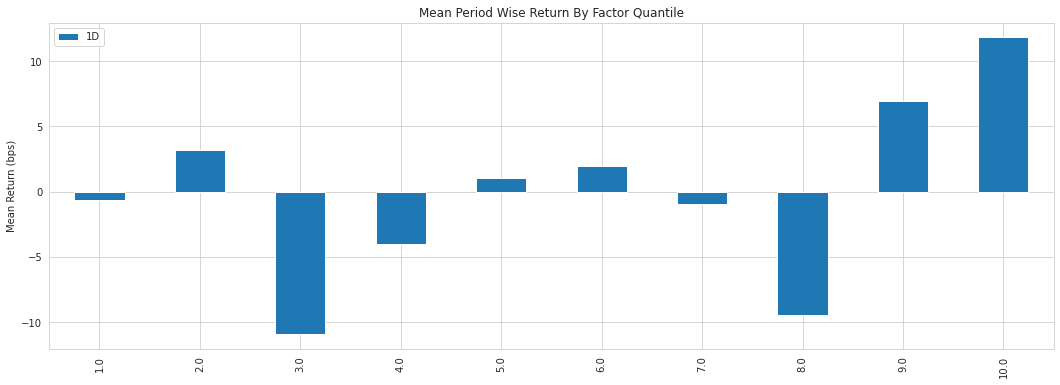

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

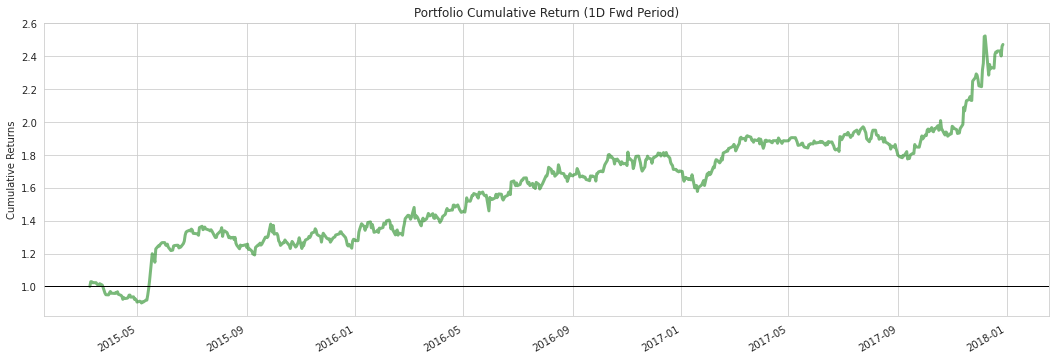

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

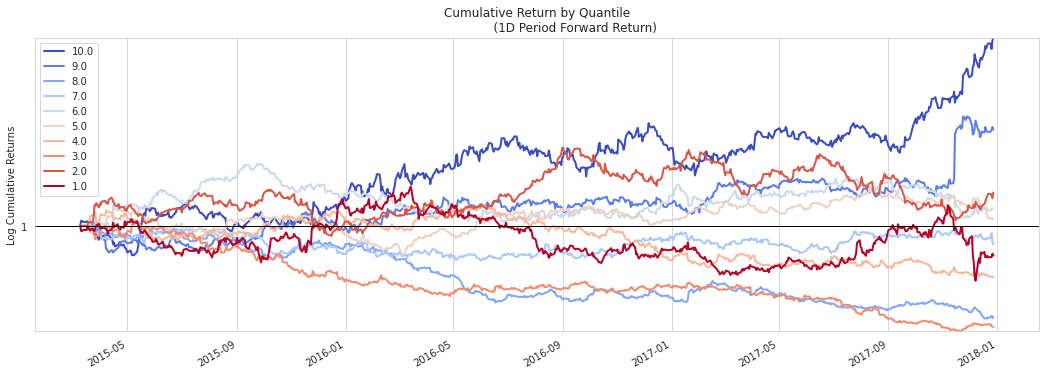

In [1035]:
plotFactorQuantileBars(roc_factor_data)

plotCumulativeReturns(roc_factor_data[roc_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumelativeReturns(roc_factor_data)

In [1036]:
vwap_data = getIndicator(
    cusumTrainPrices,
    vwap,
    trailing_volume_n = trailing_volume_window)
vwap_data = vwap_data.unstack().asfreq('C').stack()
vwap_factor_data = getCleanFactor(vwap_data, forward_returns, quantiles = 10)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [1037]:
train = pd.concat([roc_factor_data['factor_quantile'],
                   vwap_factor_data['factor_quantile'],
                   target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
X.columns =  ['roc', 'vwap']
y = train['label']
X

roc  vwap
date       asset               
2015-03-09 PIK.JO     1.0  10.0
           QFH.JO    10.0   1.0
2015-03-11 PIK.JO     1.0   1.0
           SOL.JO    10.0  10.0
2015-03-16 CPI.JO    10.0   8.0
...                   ...   ...
2017-12-27 SYGJP.JO   5.0   2.0
           SYGUS.JO   6.0   5.0
           TON.JO     6.0   8.0
           TRU.JO     8.0   8.0
           TWR.JO     5.0   1.0

[37542 rows x 2 columns]

In [1038]:
checkCV(X, 20)

Fold 1 -------------------------------------------------------
Train: Length = 42
Start date: 2015-03-09
End date: 2015-05-15 

Test: Length =  33
Start date: 2015-05-18
End date: 2015-07-02
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 75
Start date: 2015-03-09
End date: 2015-07-02 

Test: Length =  33
Start date: 2015-07-03
End date: 2015-08-19
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 108
Start date: 2015-03-09
End date: 2015-08-19 

Test: Length =  33
Start date: 2015-08-20
End date: 2015-10-06
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 141
Start date: 2015-03-09
End date: 2015-10-06 

Test: Length =  33
Start date: 2015-10-07
End date: 2015-11-20
---------------------------------------

In [1039]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [1040]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-02-23 ABG.JO    0.485520
           ADR.JO    0.488922
           AFE.JO    0.489060
           AFT.JO    0.489830
           AMS.JO    0.486474
...                       ...
2017-12-27 SYGJP.JO  0.495568
           SYGUS.JO  0.495853
           TON.JO    0.496144
           TRU.JO    0.496130
           TWR.JO    0.495471

[25322 rows x 1 columns]

In [1041]:
roc_clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
roc_clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-02-23 ABG.JO     0.000994  0.485520                2
2016-02-29 ABG.JO     0.003872  0.483751                1
2016-03-02 ABG.JO    -0.013295  0.486428                2
2016-03-04 ABG.JO     0.019405  0.483705                1
2016-03-10 ABG.JO     0.003650  0.484613                2
...                        ...       ...              ...
2017-12-19 STXWDM.JO -0.001445  0.495867                3
2017-12-22 STXWDM.JO  0.000000  0.496054                4
2017-12-25 STXWDM.JO -0.014409  0.496054                4
2017-12-26 STXWDM.JO -0.014620  0.496054                4
2017-12-27 STXWDM.JO  0.002967  0.495874                3

[28928 rows x 3 columns]

In [1042]:
InformationTable(roc_clf_factor_data)

Information Analysis


1D
IC Mean           0.022
IC Std.           0.153
Risk-Adjusted IC  0.140
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

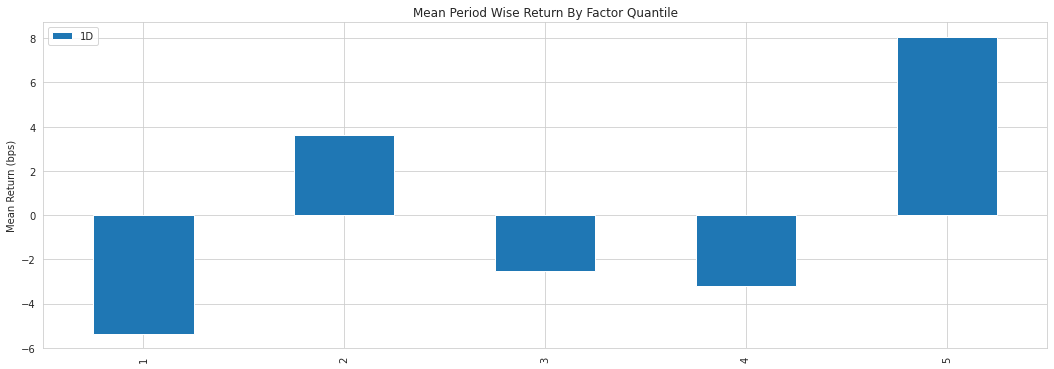

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

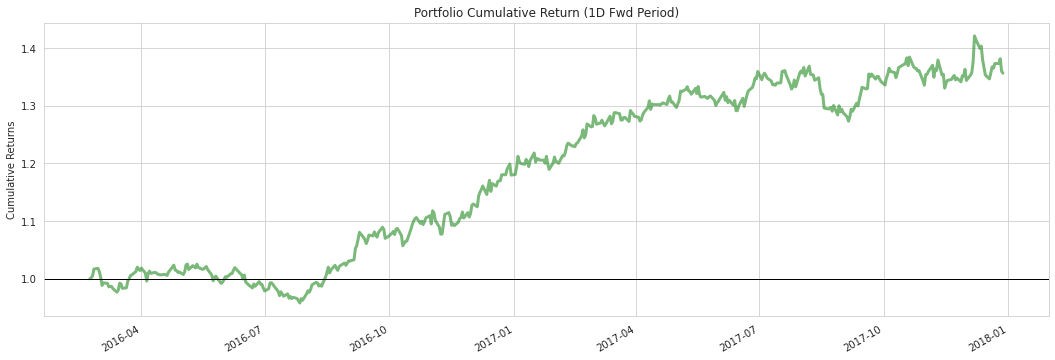

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

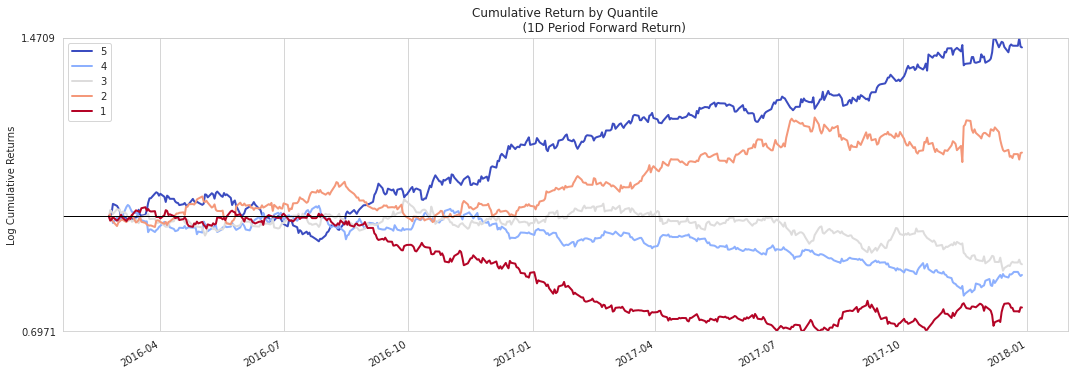

In [1043]:
plotFactorQuantileBars(roc_clf_factor_data)

plotCumulativeReturns(roc_clf_factor_data[roc_clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(roc_clf_factor_data)

### The effect of Residual strength Index

In [1044]:
rsi_data = getIndicator(
    cusumTrainPrices,
    rsi, n = 10,
    trailing_volume_n = trailing_volume_window)
rsi_data = rsi_data.unstack().asfreq('C').stack()
rsi_data

rsi
date       symbol           
2015-03-03 PIK.JO -36.913917
2015-03-06 PIK.JO -44.861227
           QFH.JO -57.122601
           SOL.JO -41.915533
2015-03-09 PIK.JO -39.256963
...                      ...
2017-12-29 TDH.JO -53.433338
           TKG.JO -39.922023
           TRU.JO -66.182804
           VOD.JO -47.184549
           ZED.JO -63.976235

[32767 rows x 1 columns]

In [1045]:
rsi_factor_data = getCleanFactor(rsi_data, forward_returns, quantiles = 10)
rsi_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                          
2015-03-23 ABG.JO     0.037424 -43.805151              7.0
2015-03-24 ABG.JO    -0.015684 -53.690566              5.0
2015-04-01 ABG.JO    -0.001369 -57.448792              2.0
2015-04-08 ABG.JO    -0.011028 -62.072824              4.0
2015-04-13 ABG.JO     0.007735 -49.100065              7.0
...                        ...        ...              ...
2017-12-19 STXWDM.JO -0.001445 -33.671169             10.0
2017-12-22 STXWDM.JO  0.000000 -37.809083              9.0
2017-12-25 STXWDM.JO -0.014409 -37.809083              9.0
2017-12-26 STXWDM.JO -0.014620 -37.809083              9.0
2017-12-27 STXWDM.JO  0.002967 -31.300219             10.0

[42762 rows x 3 columns]

In [1046]:
InformationTable(rsi_factor_data)

Information Analysis


1D
IC Mean          -0.003
IC Std.           0.189
Risk-Adjusted IC -0.015
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

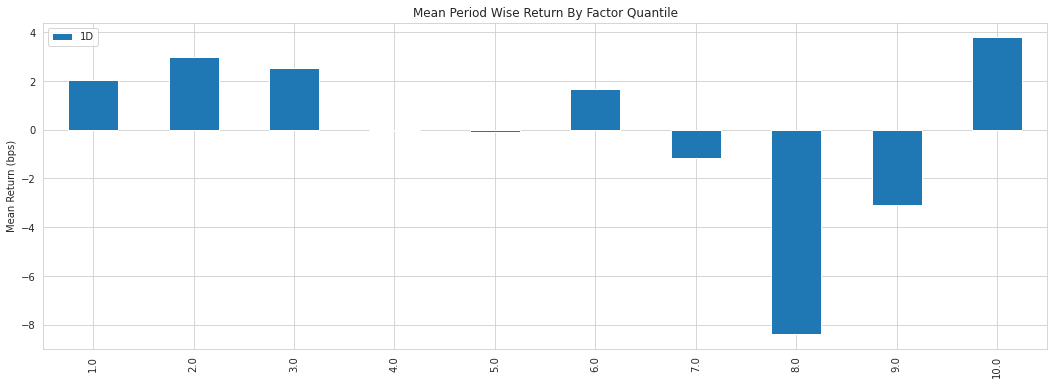

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

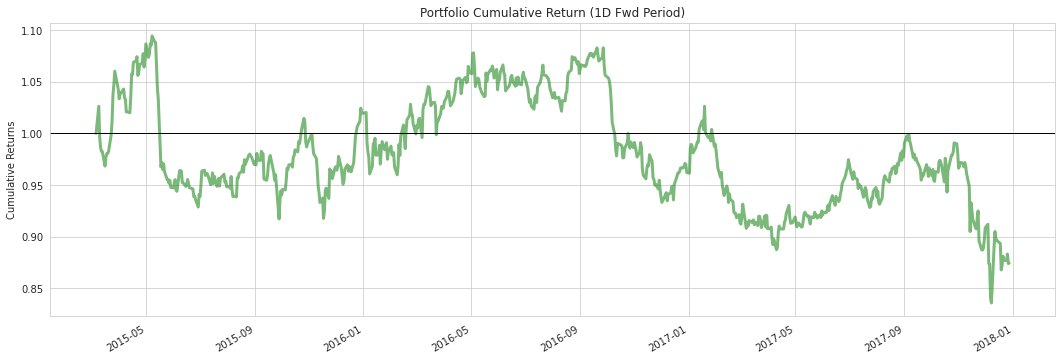

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

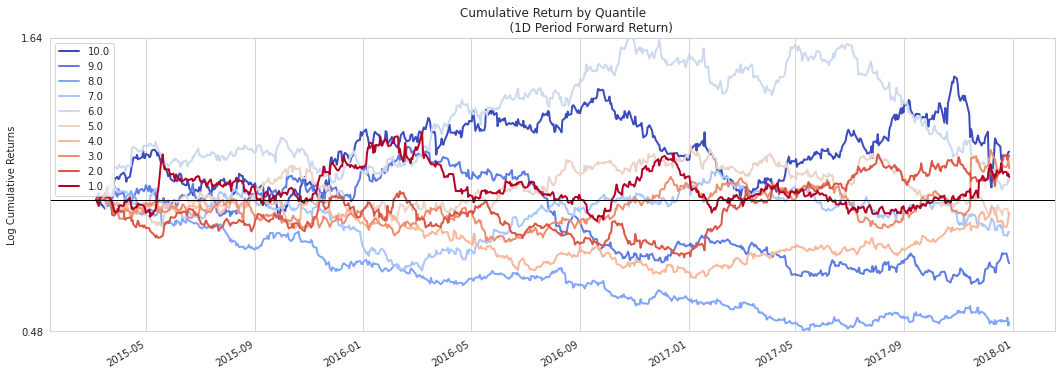

In [1047]:
plotFactorQuantileBars(rsi_factor_data)

plotCumulativeReturns(rsi_factor_data[rsi_factor_data['factor_quantile'].isin([1, 2, 9, 10])])

plotQuantileCumelativeReturns(rsi_factor_data)

In [1048]:
tsi_data = getIndicator(
    cusumTrainPrices,
    tsi, r = 50, s = 30,
    trailing_volume_n = trailing_volume_window)
tsi_data = tsi_data.unstack().asfreq('C').stack()
tsi_data

tsi
date       symbol              
2015-10-26 AVI.JO    -11.011896
2015-10-28 AVI.JO    -11.412323
2015-10-30 AVI.JO    -11.443840
2015-11-03 STXIND.JO -14.299213
2015-11-06 CLS.JO    -13.170137
...                         ...
2017-12-29 TDH.JO      8.633599
           TKG.JO     15.903684
           TRU.JO     -4.809715
           VOD.JO      8.501602
           ZED.JO      4.446912

[22045 rows x 1 columns]

In [1049]:
tsi_factor_data = getCleanFactor(tsi_data, forward_returns, quantiles = 10)
tsi_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D     factor  factor_quantile
date       asset                                          
2016-01-20 ABG.JO    -0.010528   8.712801              6.0
2016-01-21 ABG.JO     0.049600   9.649256              6.0
2016-01-22 ABG.JO    -0.044665  10.213714              7.0
2016-01-27 ABG.JO     0.048632  10.538298              8.0
2016-01-28 ABG.JO     0.019203  10.537074              8.0
...                        ...        ...              ...
2017-12-20 GLPROP.JO -0.002433 -16.780037              2.0
2017-12-27 GLPROP.JO  0.025197 -14.716910              2.0
2017-12-22 DCP.JO     0.000000 -28.306490              1.0
2017-12-25 DCP.JO    -0.000546 -28.306490              1.0
2017-12-26 DCP.JO     0.010662 -28.306490              1.0

[26143 rows x 3 columns]

In [1050]:
train = pd.concat([rsi_factor_data['factor_quantile'], tsi_factor_data['factor_quantile'],
                   target[['label']] ], axis = 1).dropna()
X = train.iloc[:, :-1]
X.columns = ['rsi', 'tsi']
y = train['label']
X

rsi   tsi
date       asset               
2015-11-06 CLS.JO     2.0  10.0
           STXIND.JO  1.0   1.0
2015-11-10 CLS.JO     2.0  10.0
           STXIND.JO  1.0   1.0
2015-11-11 AVI.JO     2.0   1.0
...                   ...   ...
2017-12-27 SYGJP.JO   8.0   3.0
           SYGUS.JO   8.0   2.0
           TON.JO     5.0   8.0
           TRU.JO     3.0   5.0
           TWR.JO     7.0   9.0

[23765 rows x 2 columns]

In [1070]:
checkCV(X, 25)

Fold 1 -------------------------------------------------------
Train: Length = 33
Start date: 2015-11-06
End date: 2015-12-29 

Test: Length =  20
Start date: 2015-12-30
End date: 2016-01-27
----------------------------------------------------------------
Fold 2 -------------------------------------------------------
Train: Length = 53
Start date: 2015-11-06
End date: 2016-01-27 

Test: Length =  20
Start date: 2016-01-28
End date: 2016-02-24
----------------------------------------------------------------
Fold 3 -------------------------------------------------------
Train: Length = 73
Start date: 2015-11-06
End date: 2016-02-24 

Test: Length =  20
Start date: 2016-02-25
End date: 2016-03-23
----------------------------------------------------------------
Fold 4 -------------------------------------------------------
Train: Length = 93
Start date: 2015-11-06
End date: 2016-03-23 

Test: Length =  20
Start date: 2016-03-24
End date: 2016-04-22
-----------------------------------------

In [1078]:
clf = LogisticRegression(random_state=42)
predictions, probabilities = modelFit(clf, X, y, cv = 20, max_train_size = 240)

In [1079]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.51      0.59      0.54      6355
         1.0       0.50      0.42      0.45      6234

    accuracy                           0.50     12589
   macro avg       0.50      0.50      0.50     12589
weighted avg       0.50      0.50      0.50     12589



In [1080]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-11-21 AEG.JO                  3
           AIP.JO                  3
           ARI.JO                  3
           ASC.JO                  1
           BAT.JO                  3
...                              ...
2017-12-27 SYGJP.JO                3
           SYGUS.JO                3
           TON.JO                  1
           TRU.JO                  1
           TWR.JO                  1

[12589 rows x 1 columns]

In [1081]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-11-21 AEG.JO    0.509909
           AIP.JO    0.504845
           ARI.JO    0.508667
           ASC.JO    0.494430
           BAT.JO    0.504318
...                       ...
2017-12-27 SYGJP.JO  0.504260
           SYGUS.JO  0.506043
           TON.JO    0.489540
           TRU.JO    0.491014
           TWR.JO    0.491630

[12589 rows x 1 columns]

In [1082]:
rsi_clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
rsi_clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                         
2016-11-22 ABG.JO    -0.012032  0.512583                4
2016-11-24 ABG.JO     0.007862  0.510004                4
2016-11-28 ABG.JO     0.005078  0.515161                5
2016-12-05 ABG.JO    -0.019715  0.512583                4
2016-12-08 ABG.JO     0.003469  0.515161                5
...                        ...       ...              ...
2017-12-20 GLPROP.JO -0.002433  0.509915                5
2017-12-27 GLPROP.JO  0.025197  0.509915                5
2017-12-22 DCP.JO     0.000000  0.496207                4
2017-12-25 DCP.JO    -0.000546  0.496207                4
2017-12-26 DCP.JO     0.010662  0.496207                4

[14000 rows x 3 columns]

In [1083]:
InformationTable(rsi_clf_factor_data)

Information Analysis


1D
IC Mean           0.003
IC Std.           0.173
Risk-Adjusted IC  0.019
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

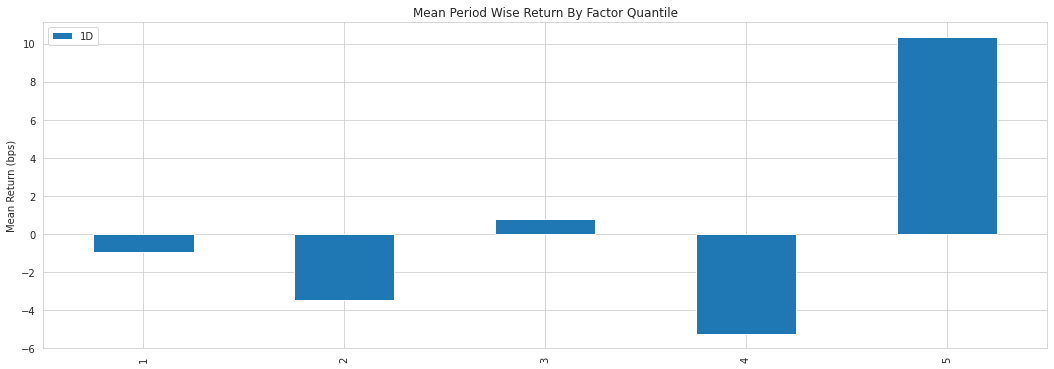

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

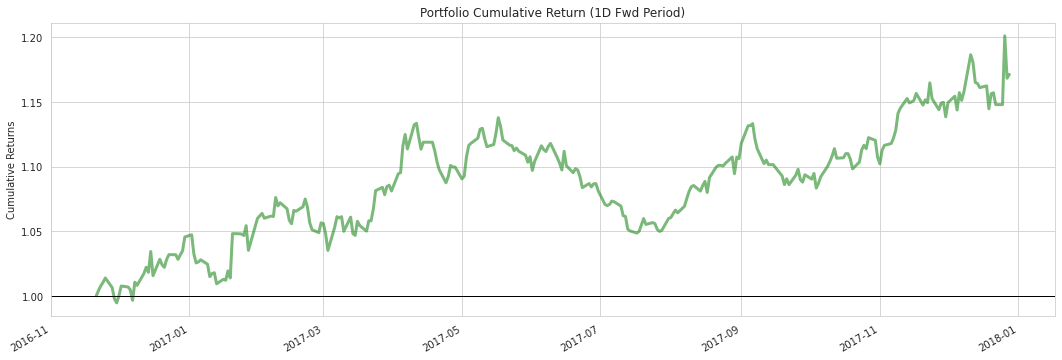

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

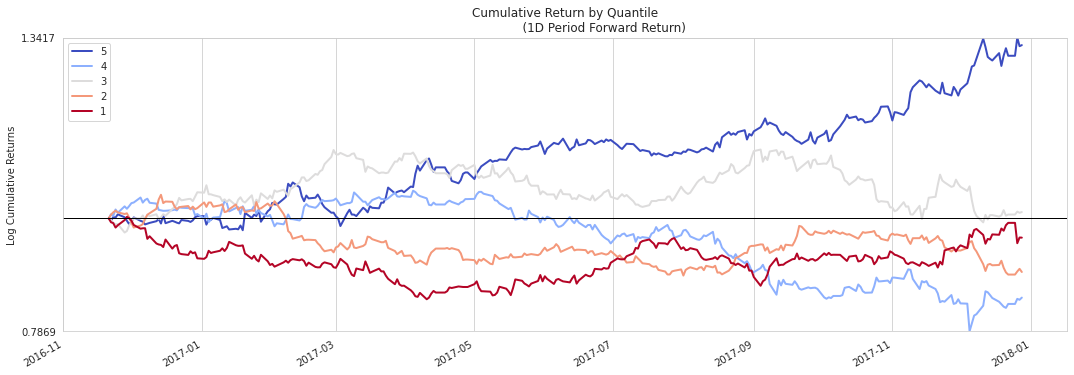

In [1084]:
plotFactorQuantileBars(rsi_clf_factor_data)

plotCumulativeReturns(rsi_clf_factor_data[rsi_clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(rsi_clf_factor_data)

### Unsupervised Techniques

In [1365]:
from sklearn.decomposition import PCA

In [1366]:
# def pctChange(open = None, high = None, low = None, close = None, volume = None,
#               periods = [1]):
#     out = pd.DataFrame()
#     for i in periods:
#         rets = close.pct_change(periods = i)
#         rets.name = f'pct_change_{i}'
#         out = pd.concat([out, rets], axis = 1)
#     return out

In [1367]:
# for symbol, data in trainPrices.items():
#     data.index.name = 'date'

In [1368]:
# returns_data = getIndicator(
#     trainPrices,
#     pctChange,
#     trailing_volume_n = 20)
# returns_data = returns_data.unstack().asfreq('C').stack()
# returns_data

In [1369]:
# train = returns_data.unstack().iloc[train_index[:80], ]
# test = returns_data.unstack().iloc[train_index[81:101], ]

# train.dropna(axis = 1, inplace = True)
# test.dropna(axis = 1, inplace = True)

# pca = PCA(n_components = 5)
# pca.fit(train)
# pca.transform()

In [1377]:
momentum_data = getIndicator(
    cusumTrainPrices,
    momentum, lags = [3, 5, 8, 12, 17, 23, 30, 38, 47],
    trailing_volume_n = trailing_volume_window)
momentum_data = momentum_data.unstack().asfreq('C').stack()
momentum_data

mom_2_3   mom_2_5   mom_2_8  mom_2_12  mom_2_17  mom_2_23  \
date       symbol                                                               
2015-03-03 PIK.JO -0.028621 -0.033983 -0.029631 -0.036145  0.075889       NaN   
2015-03-06 PIK.JO -0.056786 -0.056280 -0.048460 -0.110774  0.032649       NaN   
           QFH.JO  0.047486  0.086957  0.068376 -0.025974 -0.038462       NaN   
           SOL.JO -0.045516 -0.043306 -0.055134  0.025042  0.165982       NaN   
2015-03-09 PIK.JO -0.028966 -0.110321 -0.107690 -0.108465 -0.028414       NaN   
...                     ...       ...       ...       ...       ...       ...   
2017-12-29 TDH.JO -0.040004 -0.213116  0.172362  0.012047 -0.054590 -0.066148   
           TKG.JO  0.015628 -0.042776  0.004659 -0.113768 -0.180656 -0.247820   
           TRU.JO -0.069967  0.040664  0.059229  0.172305  0.181167  0.194634   
           VOD.JO  0.008482  0.031892  0.036425 -0.019772 -0.040228 -0.072606   
           ZED.JO  0.046774  0.023659  0.067434  0.035088  0.092593  0.090756   

                   mom_2_30  mom_2_38  mom_2_47  
date       symbol                                
2015-03-03 PIK.JO       NaN       NaN       NaN  
2015-03-06 PIK.JO       NaN       NaN       NaN  
           QFH.JO       NaN       NaN       NaN  
           SOL.JO       NaN       NaN       NaN  
2015-03-09 PIK.JO       NaN       NaN       NaN  
...                     ...       ...       ...  
2017-12-29 TDH.JO -0.127725 -0.137578 -0.200002  
           TKG.JO -0.289820 -0.370822 -0.322383  
           TRU.JO  0.166623  0.286622  0.183207  
           VOD.JO -0.201256 -0.134615 -0.099390  
           ZED.JO -0.029895 -0.070201 -0.103591  

[32789 rows x 9 columns]

In [1378]:
# train = pd.concat(
#     [
#         macd_factor_data['factor_quantile'], volume_factor_data['factor_quantile'], 
#         bbands_factor_data['factor_quantile'], bbands_iw_factor_data['factor_quantile'],
#         rsi_factor_data['factor_quantile'], tsi_factor_data['factor_quantile'],
#         momentum_data,
#          target[['label']]
        
#     ], axis = 1).dropna()
# X = train.iloc[:, :-1]
# X.columns = ['macd', 'volume_group', 'bbipband', 'bbiwband', 'rsi', 'tsi']
# y = train['label']

# # for col in X.columns:
# #     X[col] = X[col].astype('object')
# # X = pd.get_dummies(X, drop_first=True)
# X

In [1379]:
momentum_data.dropna(inplace = True)

In [1380]:
def PCA_fit(pca, n_components, X, cv, max_train_size = None):

    pca_components = pd.DataFrame()
    vector_loadings = pd.DataFrame()
    
    ts = TimeSeriesSplit(n_splits = cv, max_train_size=max_train_size) # 
    for train_index, test_index in ts.split(X.unstack()):

        train = X.unstack().iloc[train_index, ].stack()

        test = X.unstack().iloc[test_index, ].stack()

        scaler = StandardScaler()
        train = pd.DataFrame(scaler.fit_transform(train), 
                             index = train.index,
                             columns = train.columns)
        test = pd.DataFrame(scaler.transform(test),
                            index = test.index,
                            columns = test.columns)
        
        pca = pca
        pca.fit(train)
        
        col_names = [f"PCA_{comp}" for comp in range(1, n_components + 1)]
        comps = pd.DataFrame(pca.transform(test), index = test.index, columns = col_names)

        pca_components = pd.concat(
            [pca_components, comps])
        
#         print('DONE!!!!!!!!!!!!!!!!!!!!!')
    return pca_components

In [1384]:
pca = PCA(n_components=5)
pca_components = PCA_fit(pca, 5, X = momentum_data, cv = 20, max_train_size=None)

In [1385]:
pca_components.index.set_names(['date', 'symbol'], inplace = True)
pca_components

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
date       symbol                                                  
2015-09-07 ABG.JO -1.035427 -0.567481  0.045429 -0.217183  0.295883
           AEG.JO -2.463051  5.094795  0.993027 -1.605623  1.298108
           AFX.JO -0.392700  1.228142 -0.474853 -0.070051  0.697577
           APN.JO -0.524999  1.280635 -0.443478 -0.083532  0.655458
           ARL.JO  0.292551 -1.139413  1.269081  0.778400  0.168894
...                     ...       ...       ...       ...       ...
2017-12-29 TDH.JO -1.290349  0.590345 -1.882836  0.040434  2.378343
           TKG.JO -2.526832 -0.783691  0.506100  0.056809  0.571434
           TRU.JO  1.824836  0.537163 -1.822857  0.930263 -0.408093
           VOD.JO -0.679432 -0.908986  0.202990  0.383733  0.023890
           ZED.JO  0.639371 -1.198595  0.198723 -0.627103  0.120106

[26970 rows x 5 columns]

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D
IC Mean           0.006
IC Std.           0.176
Risk-Adjusted IC  0.035
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

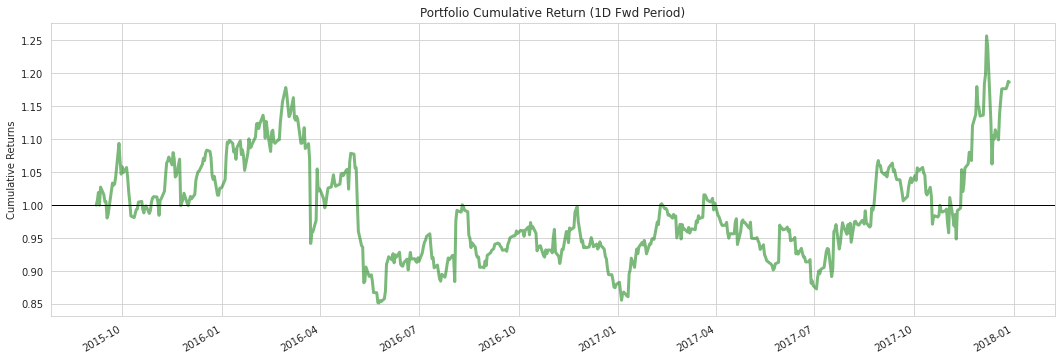

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D
IC Mean           0.012
IC Std.           0.168
Risk-Adjusted IC  0.069
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

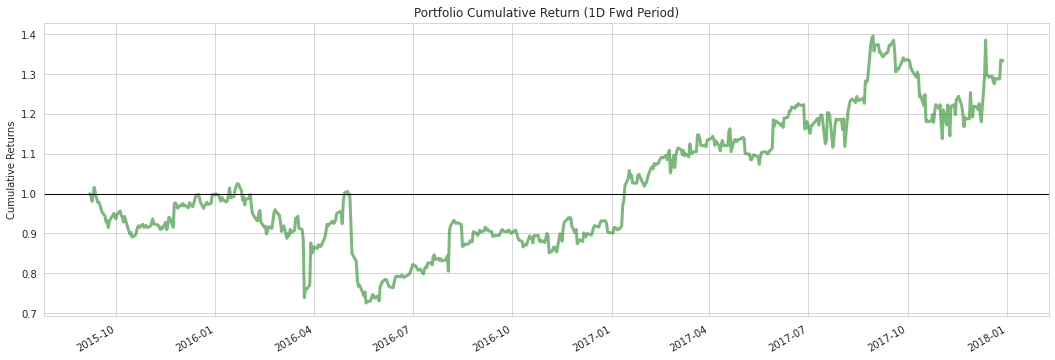

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D
IC Mean          -0.007
IC Std.           0.161
Risk-Adjusted IC -0.045
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

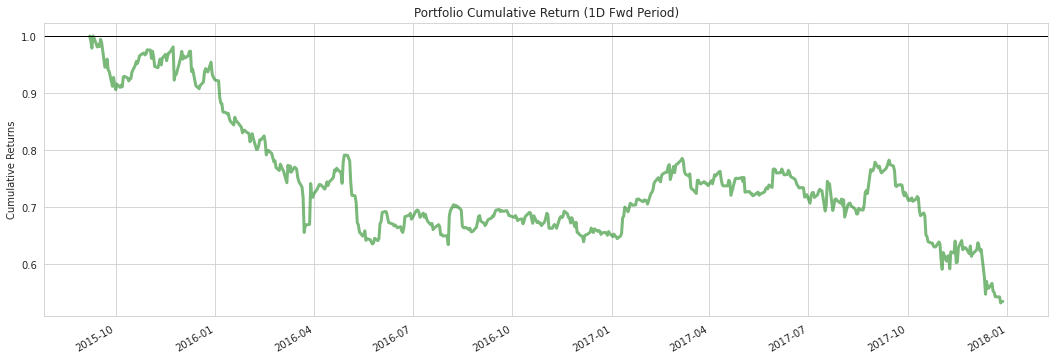

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D
IC Mean           0.003
IC Std.           0.158
Risk-Adjusted IC  0.018
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

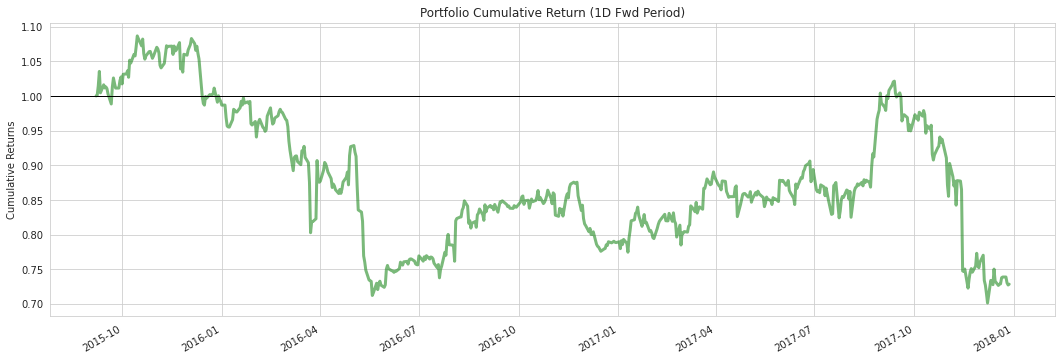

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


1D
IC Mean          -0.001
IC Std.           0.152
Risk-Adjusted IC -0.004
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

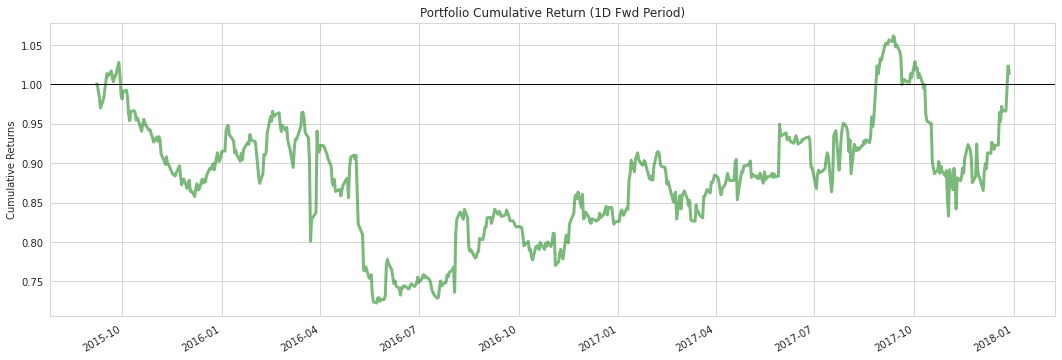

In [1386]:
for pca_comp in pca_components.columns:
    factor = pca_components[[pca_comp]].rename(columns = {pca_comp:'factor'})
    pca1_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
    InformationTable(pca1_factor_data)
    plotCumulativeReturns(pca1_factor_data[pca1_factor_data['factor_quantile'].isin([1, 5])])

In [216]:
train = pd.concat([momentum_data, target['label']], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

In [219]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.50      0.53      0.52     13563
         1.0       0.50      0.46      0.48     13421

    accuracy                           0.50     26984
   macro avg       0.50      0.50      0.50     26984
weighted avg       0.50      0.50      0.50     26984



In [220]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2015-09-03 ABG.JO                  3
           ACT.JO                  1
           ADH.JO                  3
           AFE.JO                  1
           AMS.JO                  3
...                              ...
2017-12-27 SYGJP.JO                3
           SYGUS.JO                1
           TON.JO                  1
           TRU.JO                  1
           TWR.JO                  1

[26984 rows x 1 columns]

In [221]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2015-09-03 ABG.JO    0.527716
           ACT.JO    0.455071
           ADH.JO    0.570938
           AFE.JO    0.486756
           AMS.JO    0.540905
...                       ...
2017-12-27 SYGJP.JO  0.506443
           SYGUS.JO  0.497912
           TON.JO    0.494389
           TRU.JO    0.495086
           TWR.JO    0.494173

[26984 rows x 1 columns]

In [222]:
# factor = pd.concat([factor, factor_quantile], axis = 1)

In [223]:
pca_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
pca_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                      
2015-09-03 ABG.JO -0.040944  0.527716                3
2015-09-07 ABG.JO  0.017015  0.511571                3
2015-09-09 ABG.JO  0.018992  0.498417                2
2015-09-17 ABG.JO -0.008769  0.485622                1
2015-09-22 ABG.JO  0.000291  0.500535                2
...                     ...       ...              ...
2017-11-24 L2D.JO -0.006098  0.496586                2
2017-11-28 L2D.JO  0.000000  0.495866                2
2017-11-29 L2D.JO  0.012500  0.495866                2
2017-12-19 L2D.JO -0.023419  0.500831                4
2017-12-21 L2D.JO -0.023810  0.496894                3

[34597 rows x 3 columns]

In [224]:
InformationTable(pca_factor_data)

Information Analysis


1D
IC Mean           0.009
IC Std.           0.150
Risk-Adjusted IC  0.063
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

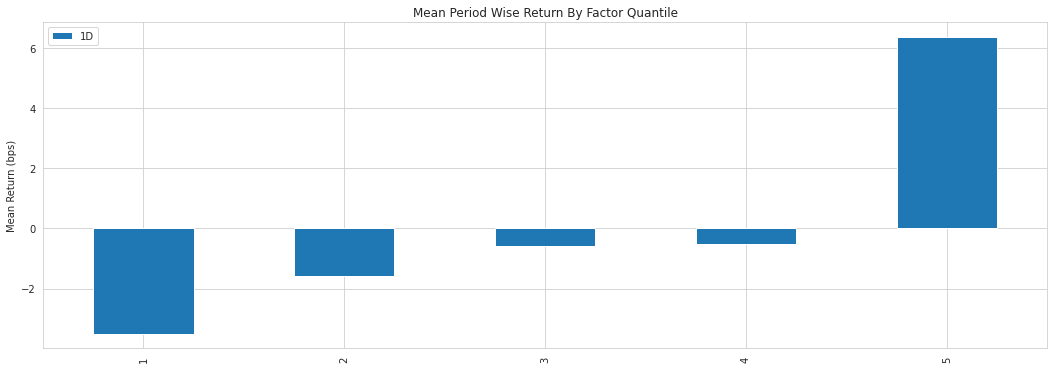

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

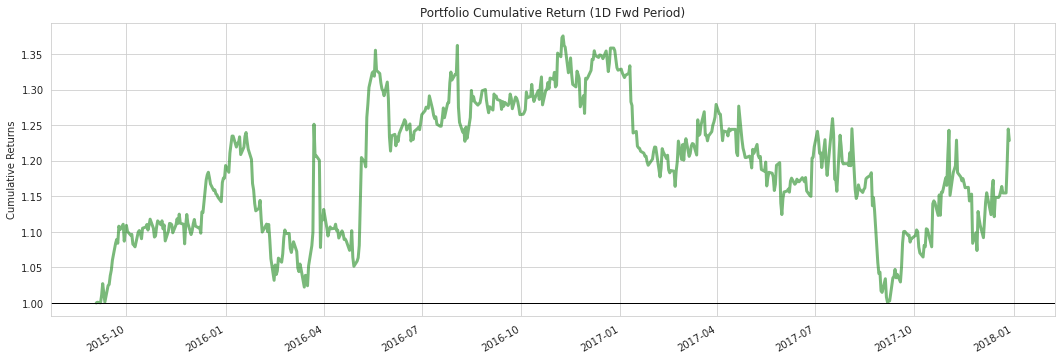

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

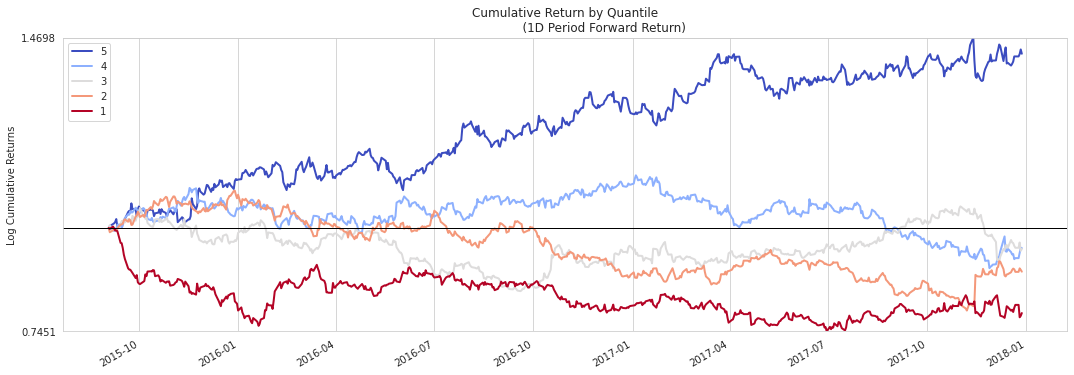

In [225]:
plotFactorQuantileBars(pca_factor_data)

plotCumulativeReturns(pca_factor_data[pca_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(pca_factor_data)

In [226]:
clf_preds = clf_factor_data2['factor']
clf_preds.name = 'clf_preds'

pca_preds = pca_factor_data['factor']
pca_preds.name = 'pca_preds'
train = pd.concat([clf_preds, pca_preds, target['label']], axis = 1).dropna()
X = train.iloc[:, :-1]
y = train['label']

In [227]:
clf = LogisticRegression(random_state=42)
# clf = LGBMClassifier(random_state=42) #
predictions, probabilities = modelFit(clf, X, y, cv = 20)

In [228]:
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

        -1.0       0.50      0.61      0.55      8095
         1.0       0.49      0.38      0.43      8047

    accuracy                           0.49     16142
   macro avg       0.49      0.49      0.49     16142
weighted avg       0.49      0.49      0.49     16142



In [229]:
factor_quantile = pd.DataFrame(predictions['predictions'].map({-1:1, 0:2, 1:3}))
factor_quantile.columns = ['factor_quantile']
factor_quantile.index.set_names(['date', 'asset'], inplace = True)
factor_quantile

factor_quantile
date       asset                    
2016-06-22 ABG.JO                  1
           ACL.JO                  3
           ACT.JO                  1
           AFE.JO                  3
           AFT.JO                  3
...                              ...
2017-12-27 SYGJP.JO                1
           SYGUS.JO                3
           TON.JO                  1
           TRU.JO                  1
           TWR.JO                  1

[16142 rows x 1 columns]

In [230]:
probs = probabilities.loc[:, 1] 
probs.name = 'factor'
factor = pd.DataFrame(probs) 
factor.index.set_names(['date', 'symbol'], inplace = True)
factor

factor
date       symbol            
2016-06-22 ABG.JO    0.493454
           ACL.JO    0.512908
           ACT.JO    0.476368
           AFE.JO    0.510730
           AFT.JO    0.506936
...                       ...
2017-12-27 SYGJP.JO  0.496221
           SYGUS.JO  0.502288
           TON.JO    0.497261
           TRU.JO    0.497852
           TWR.JO    0.497349

[16142 rows x 1 columns]

In [234]:
pca_clf_factor_data = getCleanFactor(factor, forward_returns, quantiles = 5)
pca_clf_factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  factor_quantile
date       asset                                      
2016-06-22 ABG.JO -0.055915  0.493454                3
2016-06-24 ABG.JO  0.008380  0.476057                1
2016-06-27 ABG.JO  0.014543  0.478664                1
2016-06-28 ABG.JO -0.029215  0.513496                4
2016-07-01 ABG.JO -0.047086  0.487781                1
...                     ...       ...              ...
2017-12-12 HMN.JO  0.011170  0.497570                3
2017-12-14 HMN.JO -0.015604  0.496841                2
2017-12-18 HMN.JO  0.005274  0.497358                3
2017-12-20 HMN.JO -0.001992  0.498220                4
2017-12-27 HMN.JO -0.005587  0.498145                4

[17831 rows x 3 columns]

In [235]:
InformationTable(pca_clf_factor_data)

Information Analysis


1D
IC Mean          -0.009
IC Std.           0.167
Risk-Adjusted IC -0.054
t-stat(IC)          NaN
p-value(IC)         NaN
IC Skew             NaN
IC Kurtosis         NaN

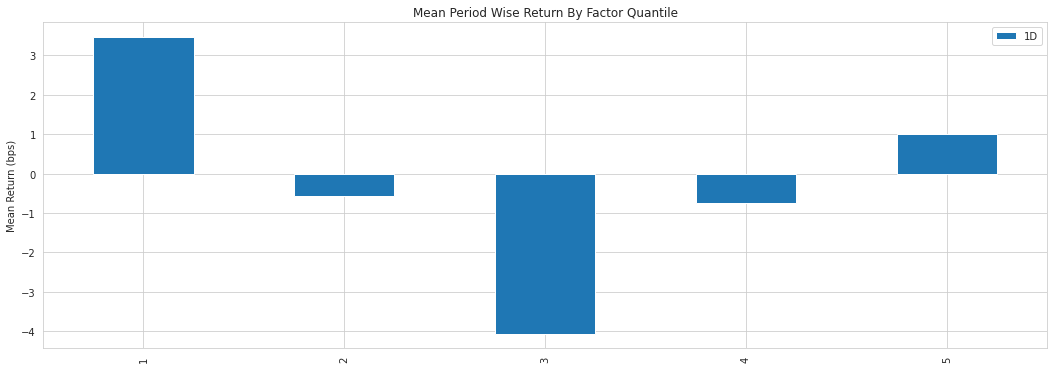

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

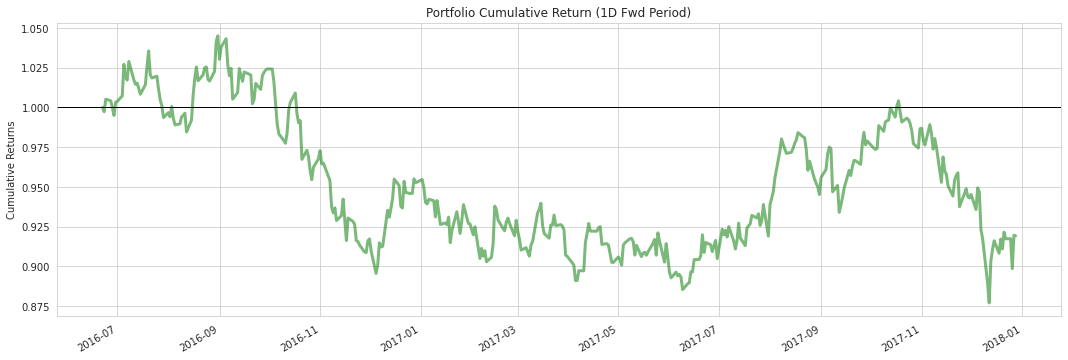

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


<Figure size 1152x576 with 0 Axes>

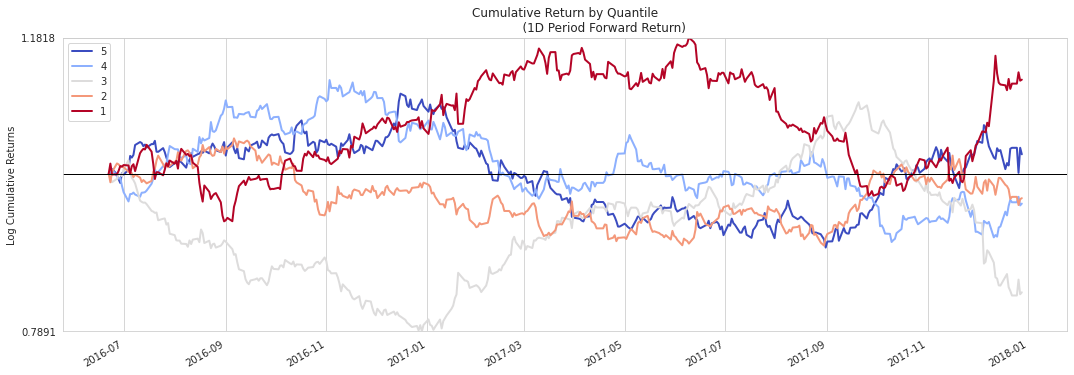

In [236]:
plotFactorQuantileBars(pca_clf_factor_data)

plotCumulativeReturns(pca_clf_factor_data[pca_clf_factor_data['factor_quantile'].isin([1, 5])])

plotQuantileCumelativeReturns(pca_clf_factor_data)

### Mini backtests

In [1180]:
clf_factor_data.sort_index(level = 'date', inplace = True)
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(clf_factor_data.loc['2017-01-02':], '1D', 10000, quantiles = [1, 5]) #

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


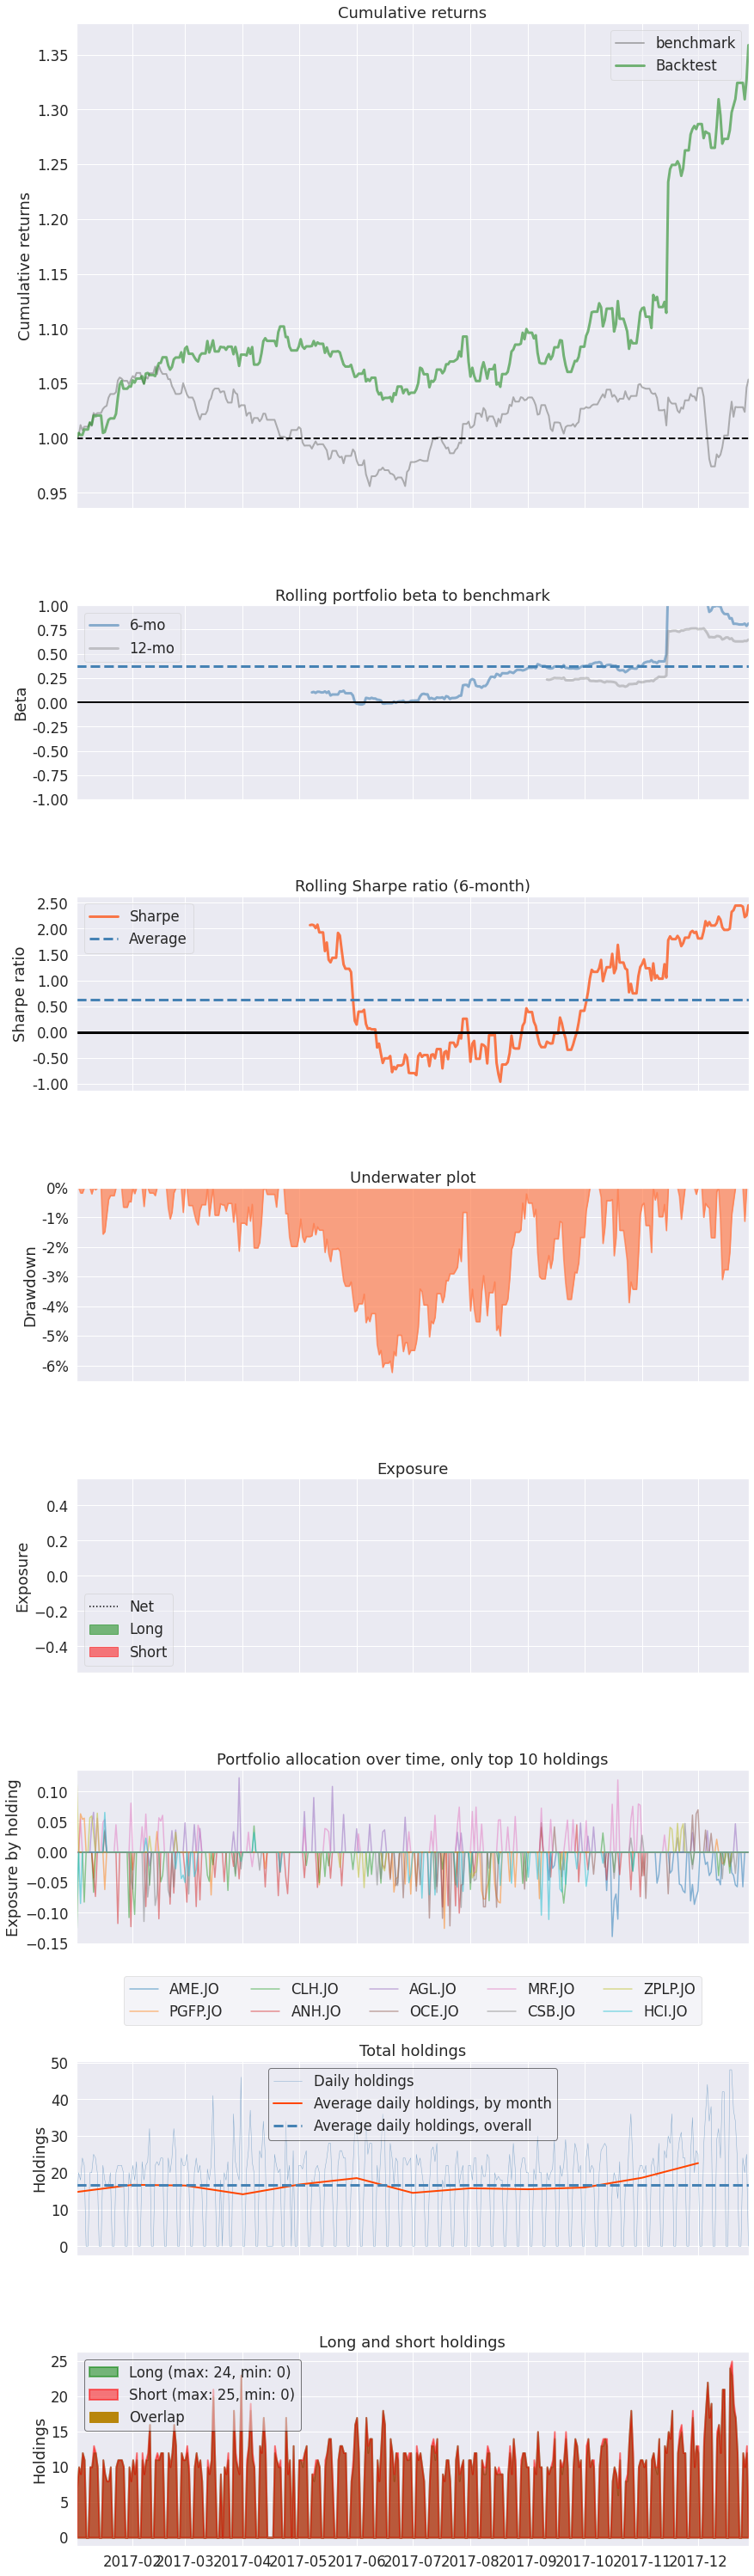

In [1181]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

In [1182]:
so_clf_factor_data.sort_index(level = 'date', inplace = True)
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(so_clf_factor_data.loc['2017-01-02':], '1D', 10000, quantiles = [1, 5]) #.loc['2016-01-01':]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


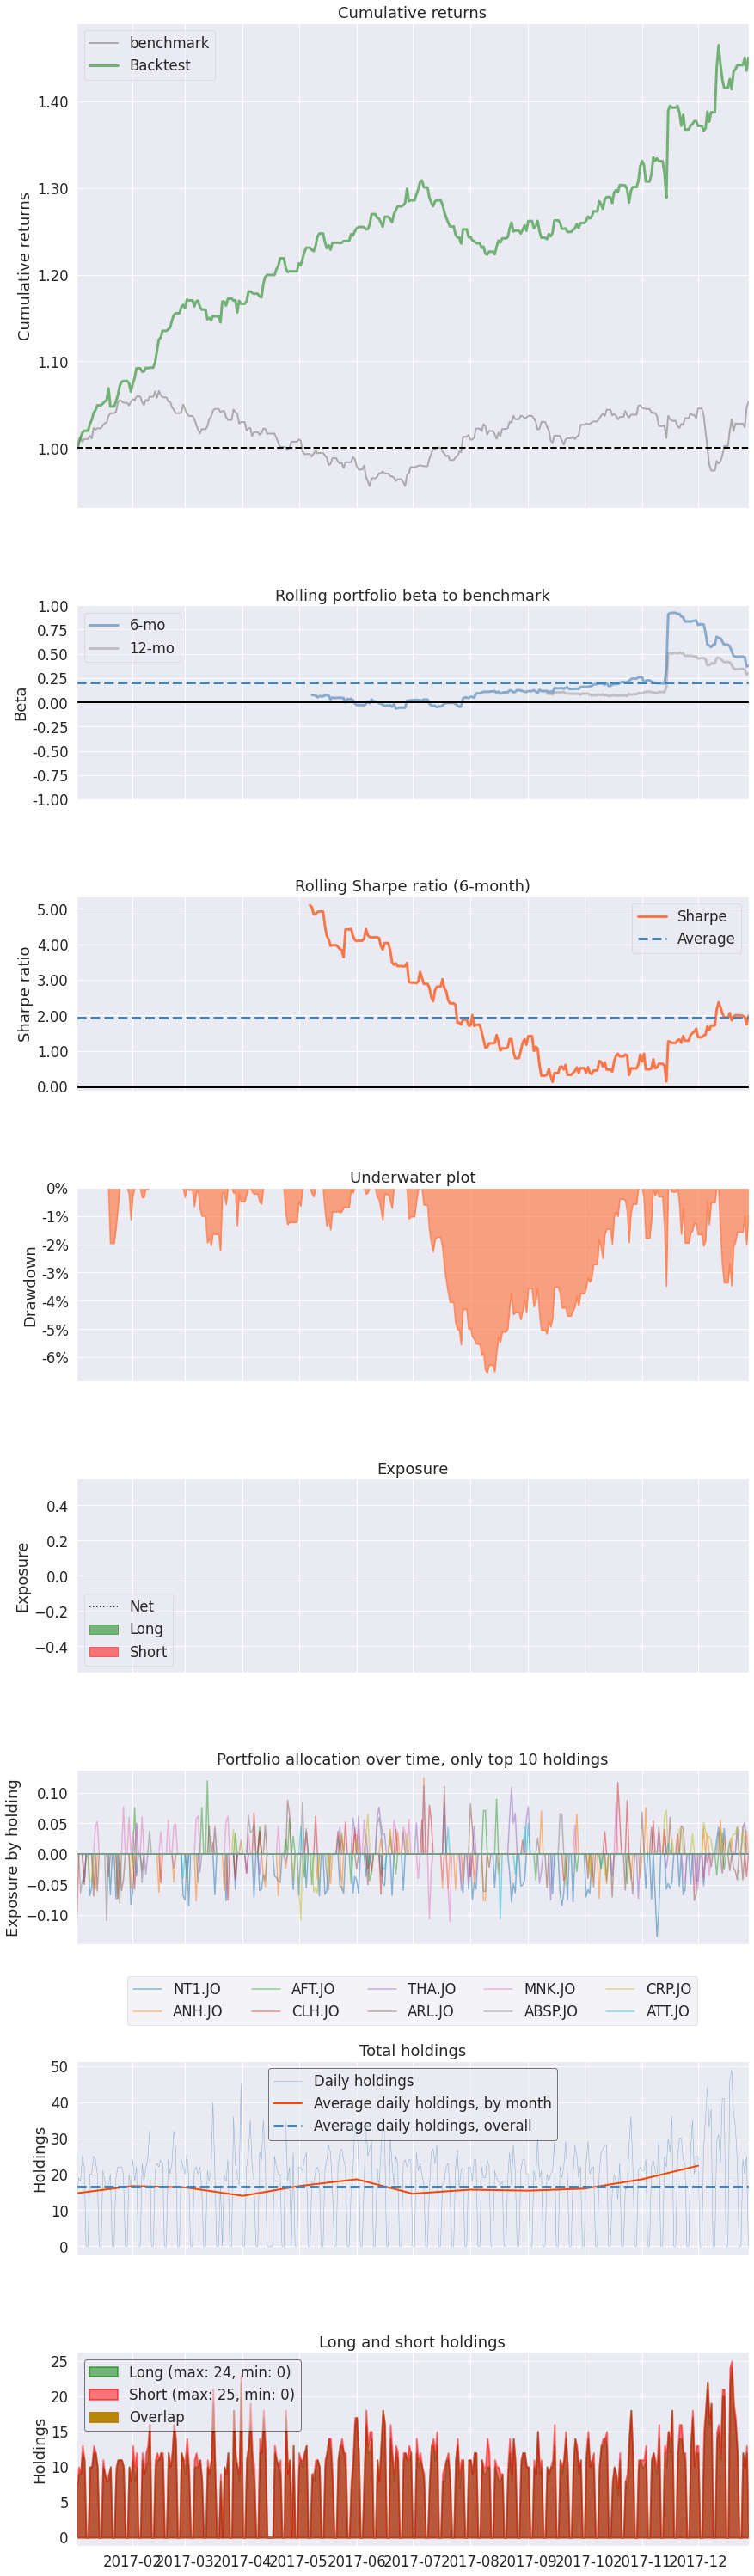

In [1183]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

In [1184]:
roc_clf_factor_data.sort_index(level = 'date', inplace = True)
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(roc_clf_factor_data.loc['2017-01-02':], '1D', 10000, quantiles = [1, 5]) #.loc['2016-01-01':]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


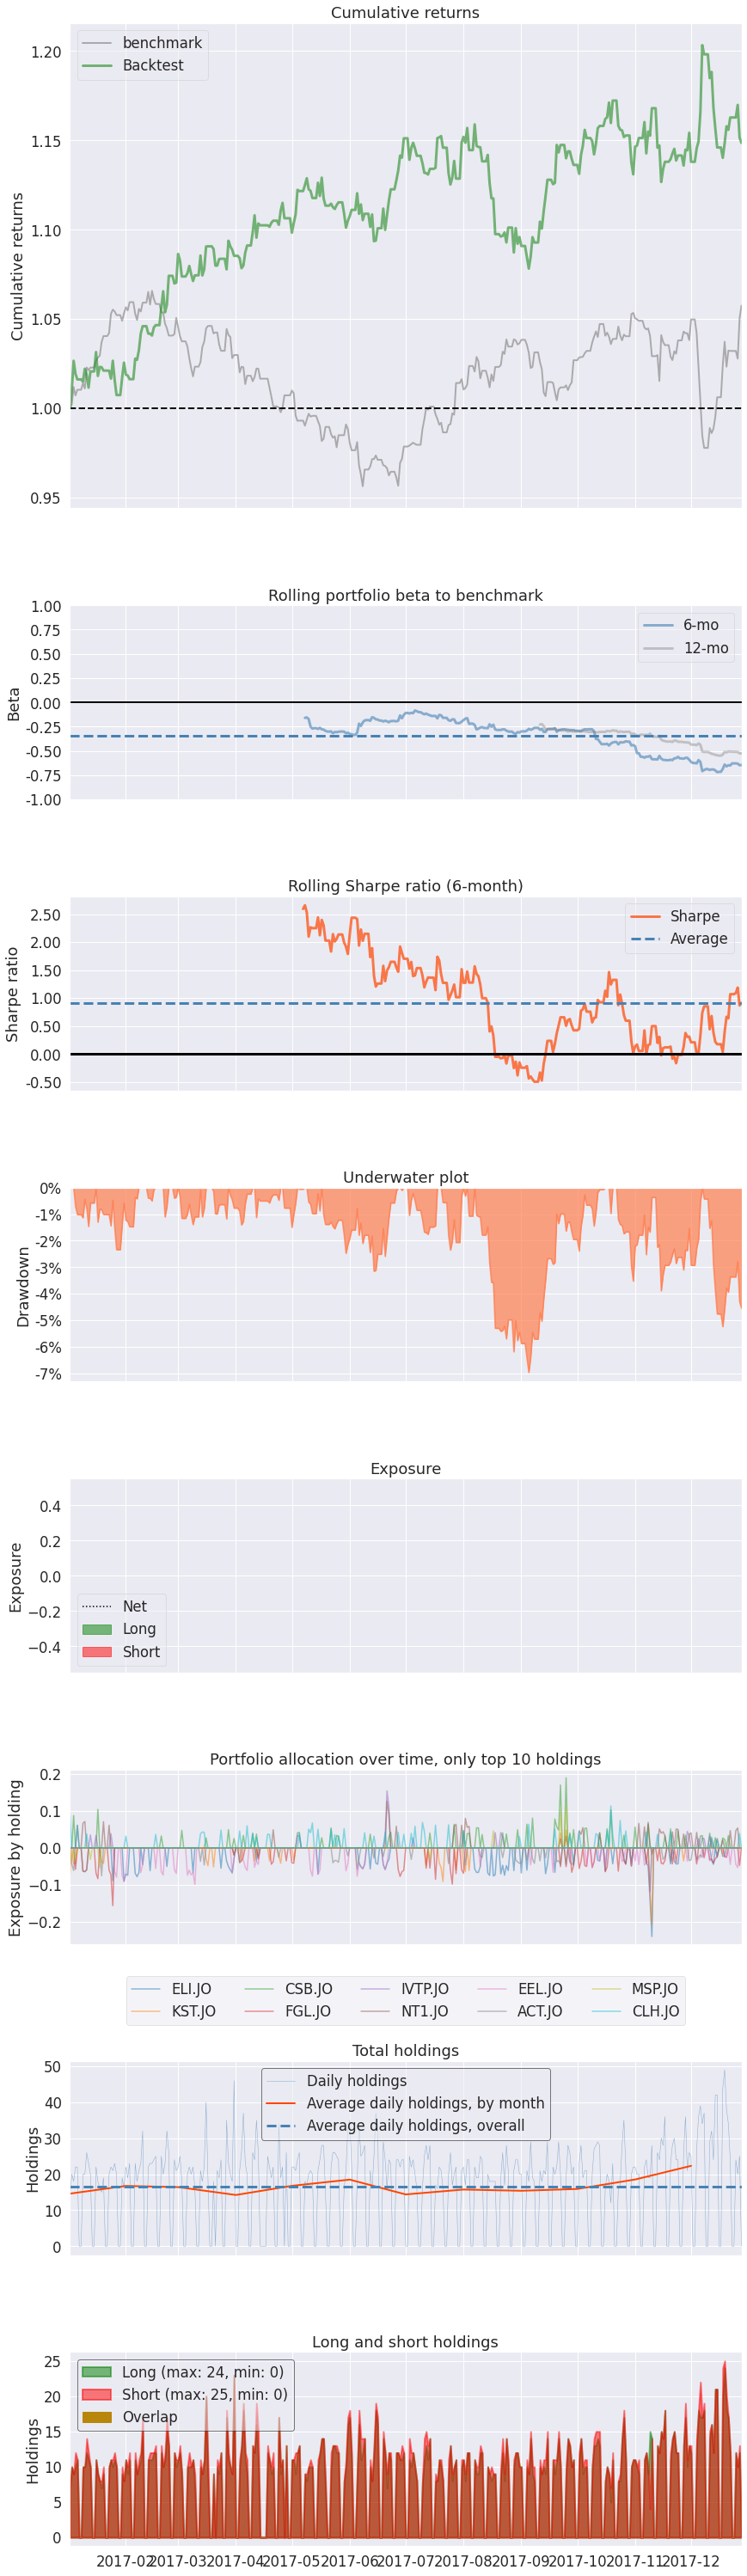

In [1185]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

In [1186]:
roc_factor_data.sort_index(level = 'date', inplace = True)
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(roc_factor_data.loc['2017-01-02':], '1D', 10000, quantiles = [1, 2, 9, 10])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


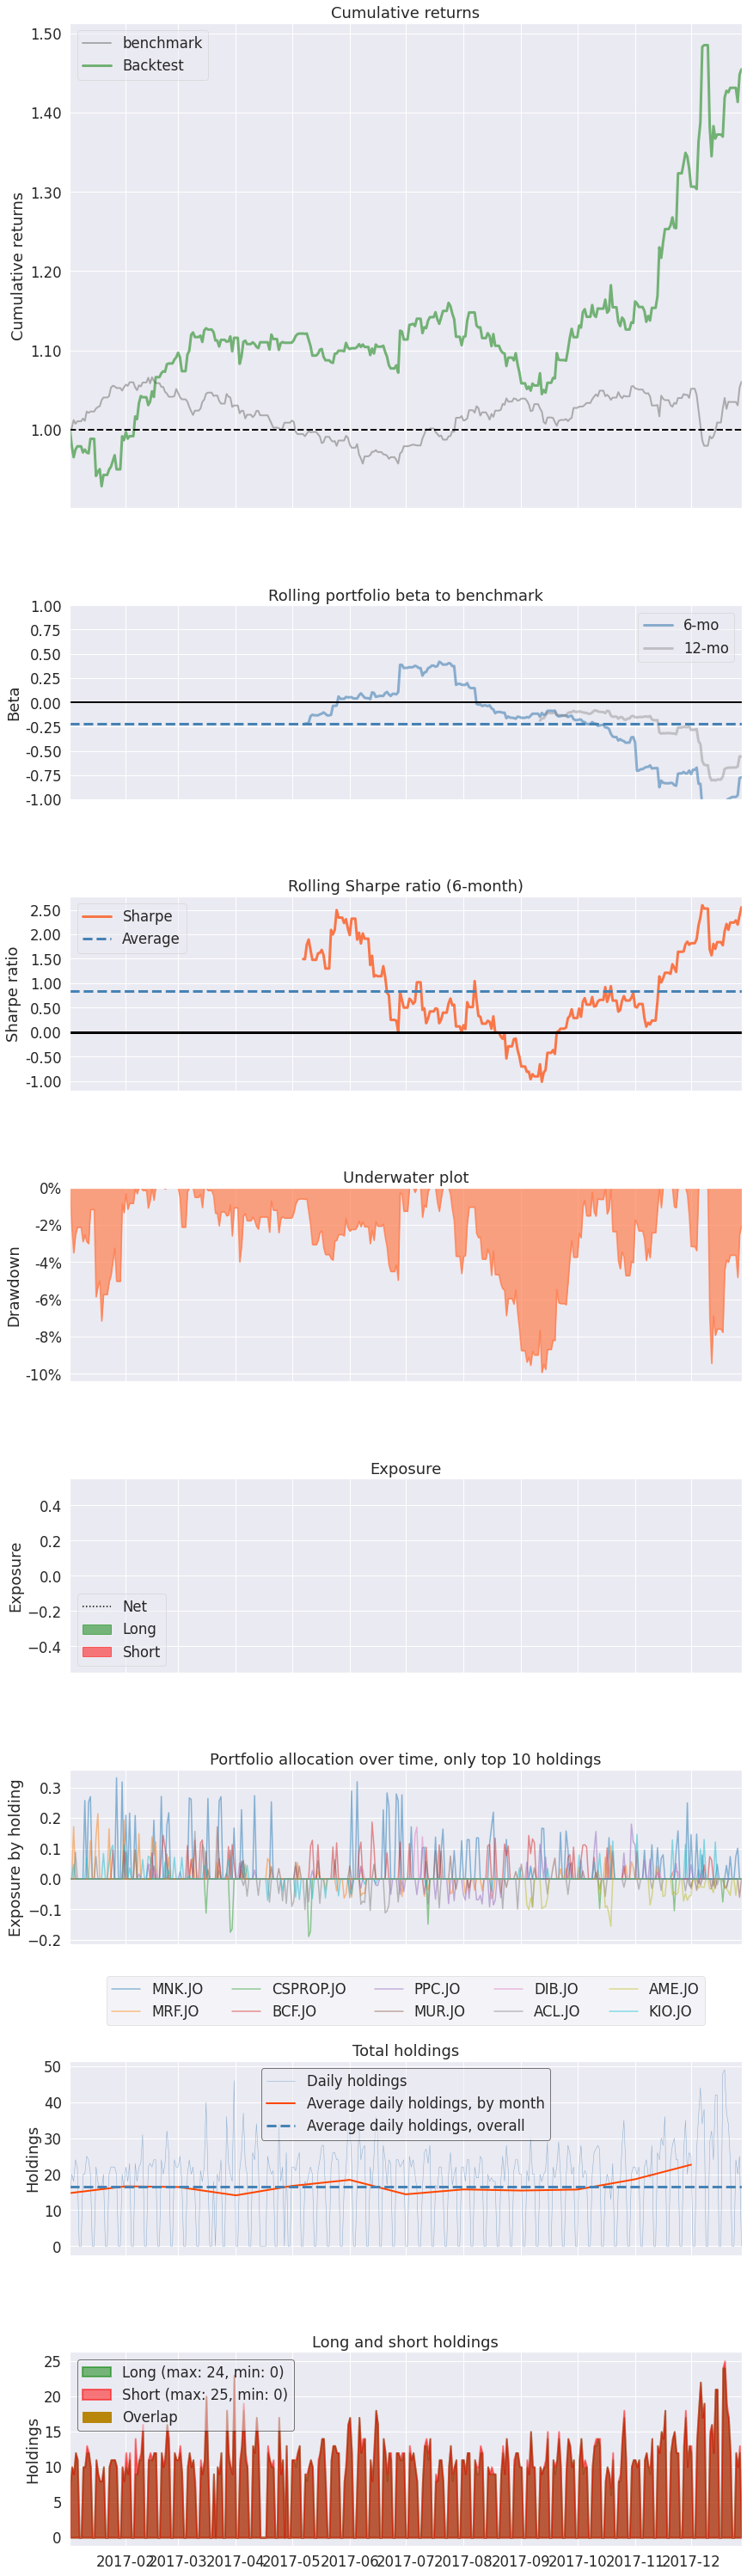

In [1187]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

In [1178]:
rsi_clf_factor_data.sort_index(level = 'date', inplace = True)
returns, positions, benchmark = \
    alphalens.performance.create_pyfolio_input(rsi_clf_factor_data.loc['2017-01-02':], '1D', 10000, quantiles = [1, 5]) #.loc['2016-01-01':]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:398: UserWarning: 'freq' not set, using business day calendar
  UserWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/alphalens/performance.py:545: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


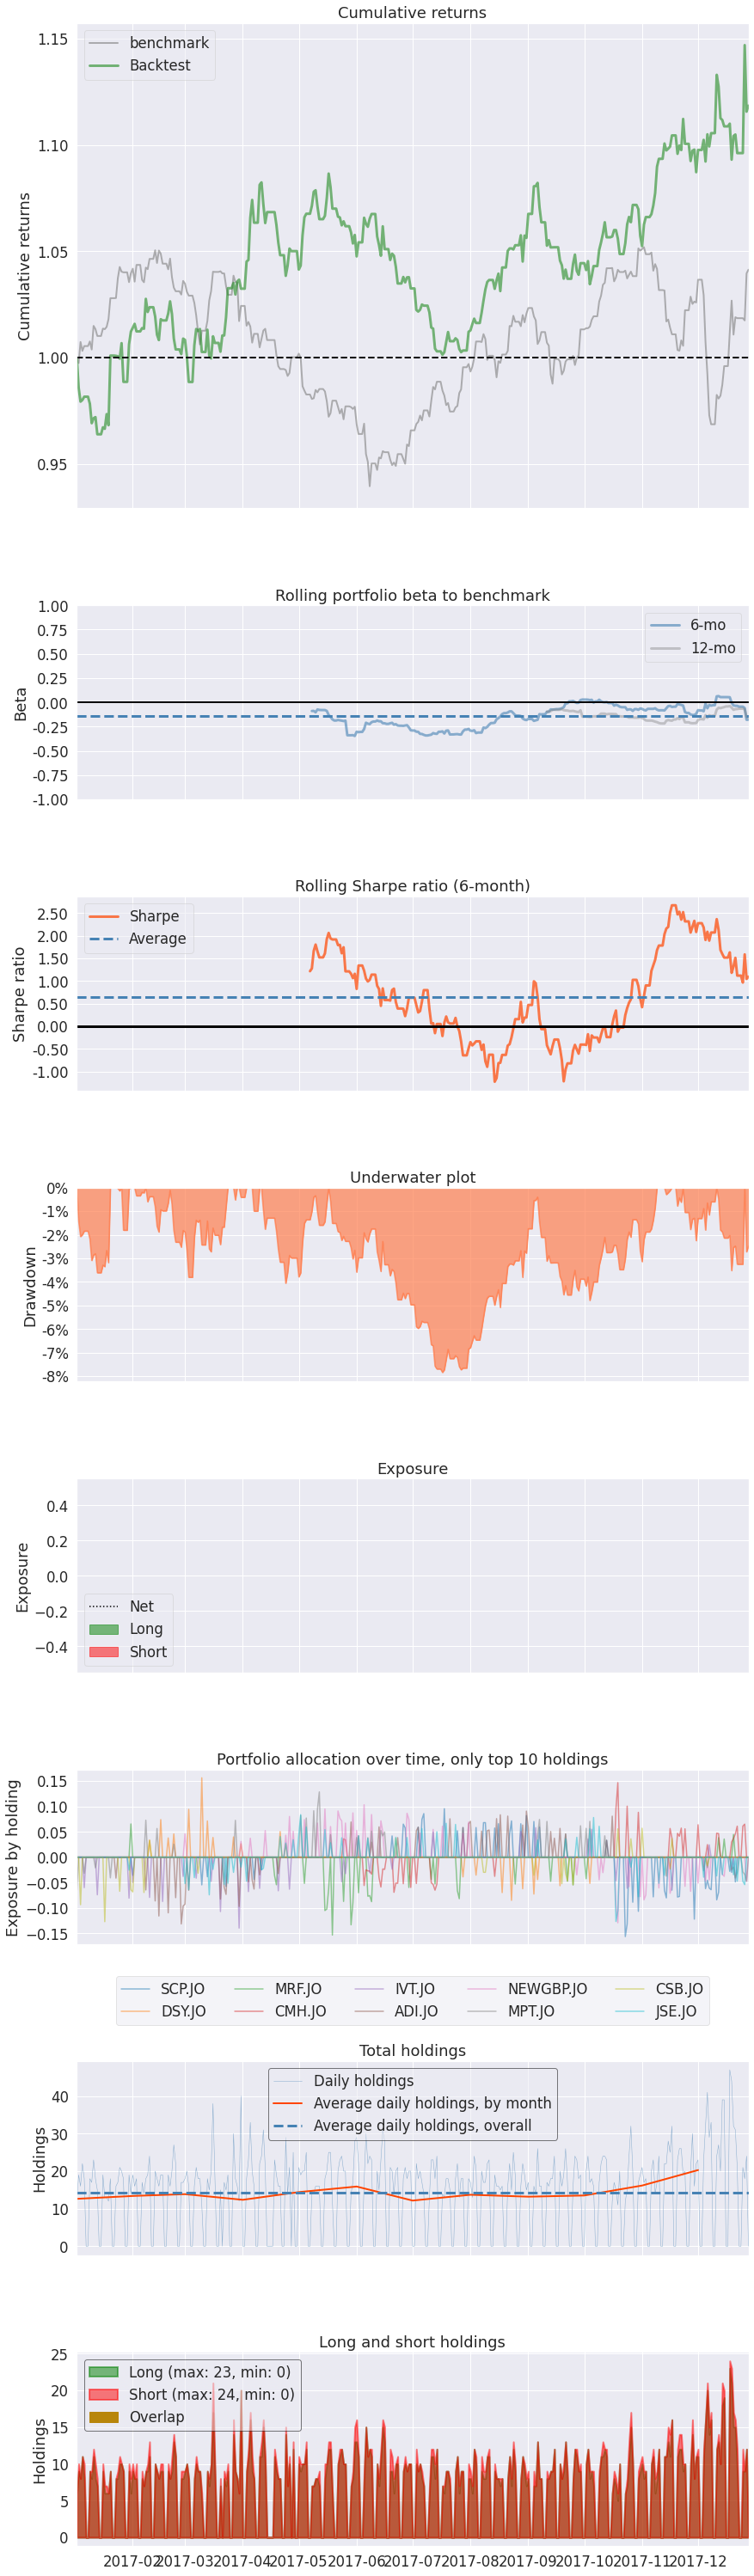

In [1179]:
pyfolio.create_simple_tear_sheet(returns, positions, benchmark_rets=benchmark)

## Alpha Combination

In [ ]:
# def convertToMultiClass(y):
#     classes = [-1, 0, 1]
#     transformed_y = pd.DataFrame(label_binarize(
#         y, 
#         classes = classes),
#         index = y.index,
#         columns = [-1, 0, 1])
#     return transformed_y

In [ ]:
# def plotROC(true_y, probabilities):
    # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     classes = [-1, 0.0, 1]
#     roc_auc = dict()
#     for i, label in enumerate(classes):
#         fpr[i], tpr[i], _ = roc_curve(true_y.iloc[:, i], probabilities.iloc[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     fig, axes = plt.subplots(1, 3, figsize = (18, 6))
#     for i, label in enumerate(classes):

#     #     print(i)
#         data = pd.DataFrame({'FPR':fpr[i], 'TPR':tpr[i], 'roc':roc_auc[i]})
#         line_data = pd.DataFrame({'x':[0, 1], 'y':[0, 1]})

#         g = sns.lineplot(data = line_data, x = 'x', y = 'y',ax = axes[i], legend = None, color = 'black')
#         g = data.plot(x = 'FPR', y = 'TPR', ax = axes[i], kind = 'line', legend = None)

#         g.lines[0].set_linestyle("--")
#         g.set_ylabel('TPR')
#         if label == 1:
#             g.set_title(f"Long \n \n AUC = {round(roc_auc[i], 2)}")
#         elif label == -1:
#             g.set_title(f"Short \n \n AUC = {round(roc_auc[i], 2)}")
#         elif label == 0:
#             g.set_title(f"Neutral \n \n AUC = {round(roc_auc[i], 2)}")
#     plt.show()

## Predictive Modeling and Perfomance Evaluation

### Machine Learning

### Neural Networks and Deep Learning

### Model Perfomance and Selection

## WalkForward Analysis

# Backtesting and Trading Simulation

# Summary and Conclusions